In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-02 15:28.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]


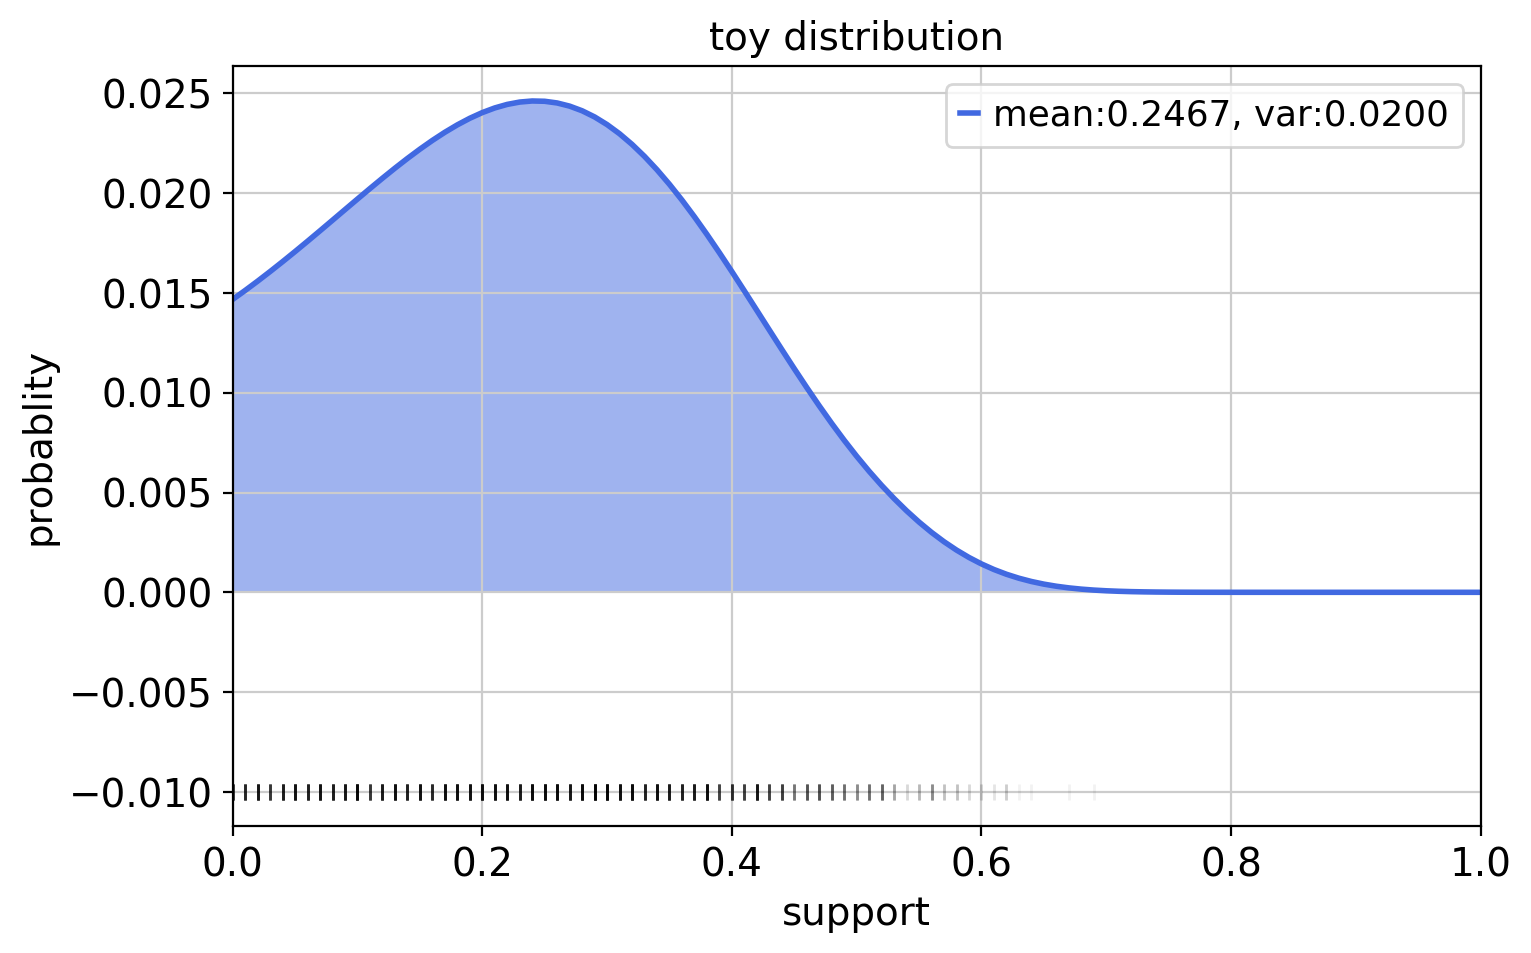

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

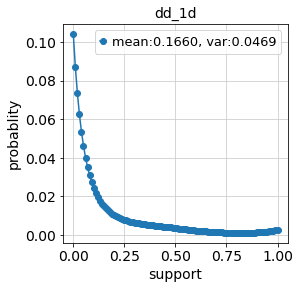

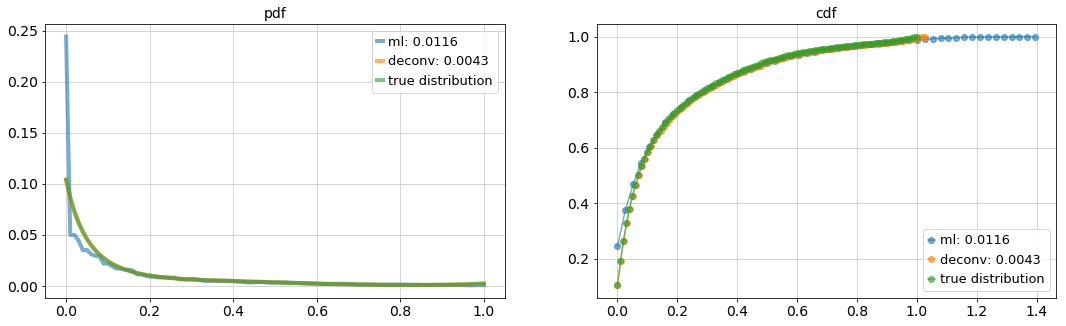

In [87]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

... writing an h5 cache file to speedup reading next time
Memory usage: current 0.24 GB, difference +0.24 GB
CPU times: user 51.9 s, sys: 607 ms, total: 52.5 s
Wall time: 52.7 s


CST3
Average counts per cell = 7.001789762558167


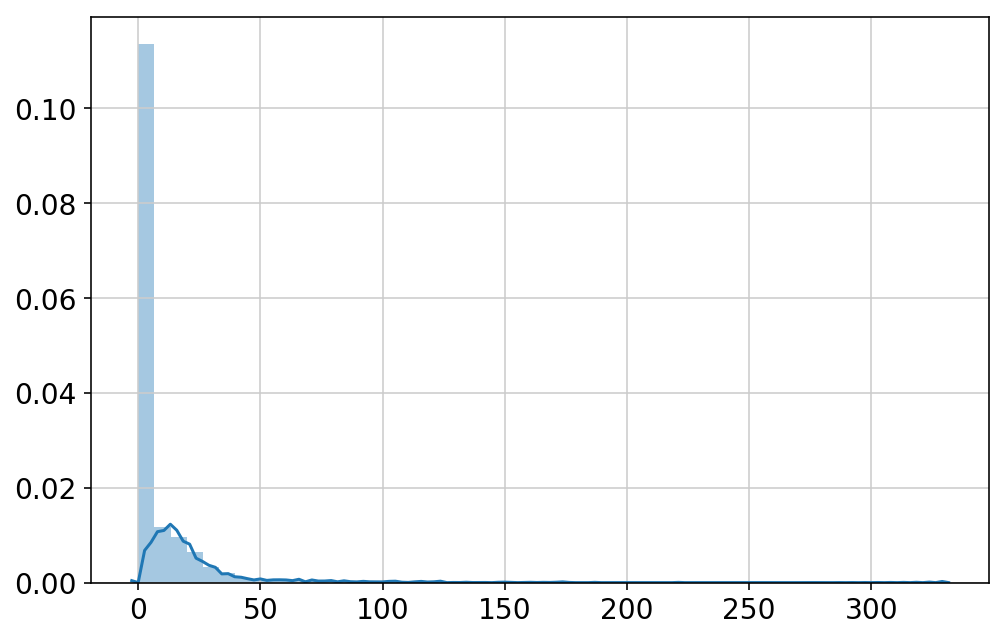

gamma:85.20000000000073
n_degree:7
alpha_hat:  [ 1.56167349  2.58360497  1.98404079 -2.84053763 -1.88812314 -1.37217922
 -0.96131647]
-l:2.482942863422569, reg:0.002749092478195506


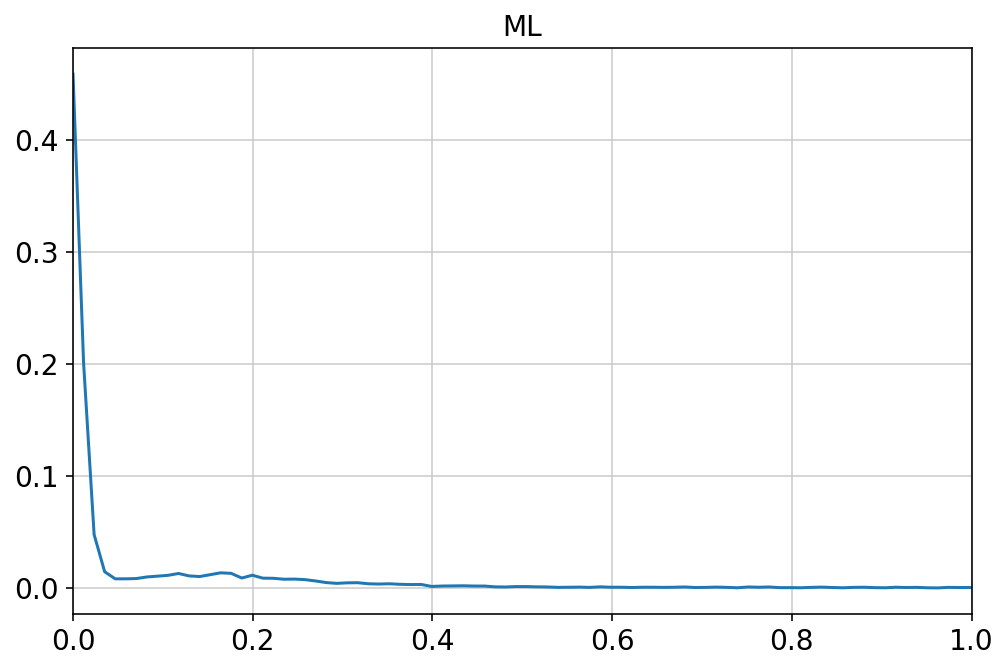

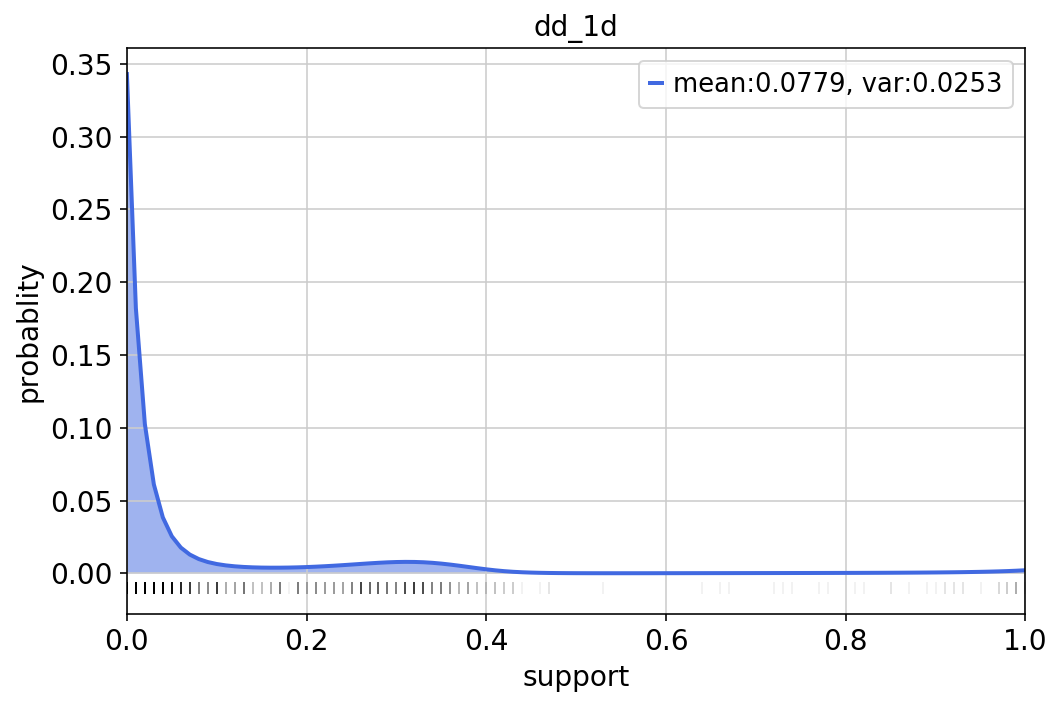

estimated gamma: 85.20000000000073


In [29]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
print("estimated gamma:",dd_info['gamma'])

FTL
Average counts per cell = 27.60064431452094


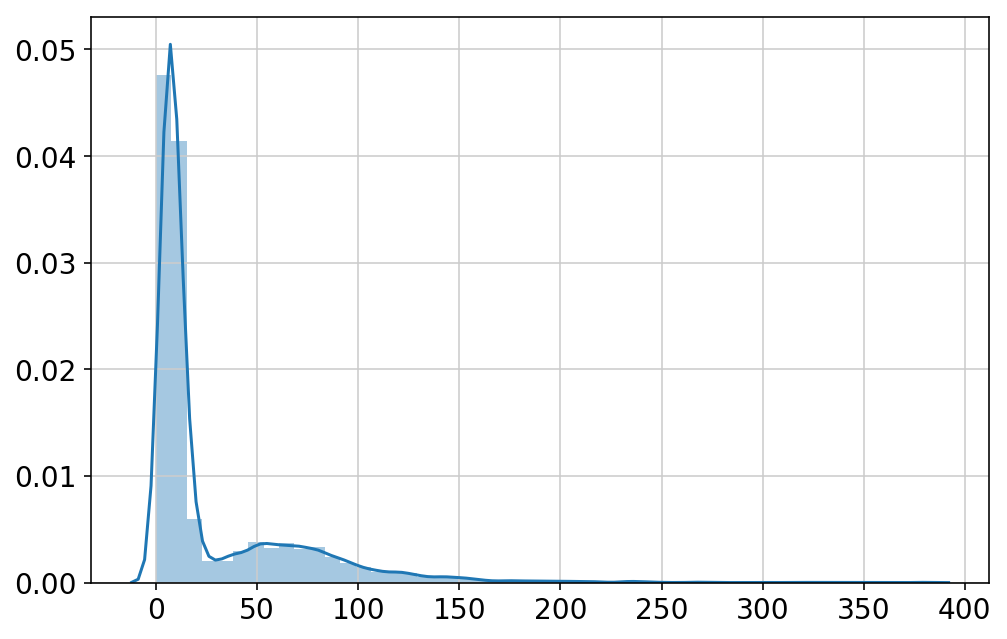

gamma:172.20000000000073
n_degree:7
alpha_hat:  [ 0.8786989  -0.42636798 -0.3339534   2.16942717 -0.75818746 -1.57031033
 -1.2151105 ]
-l:4.274893089615774, reg:0.001028905677844378


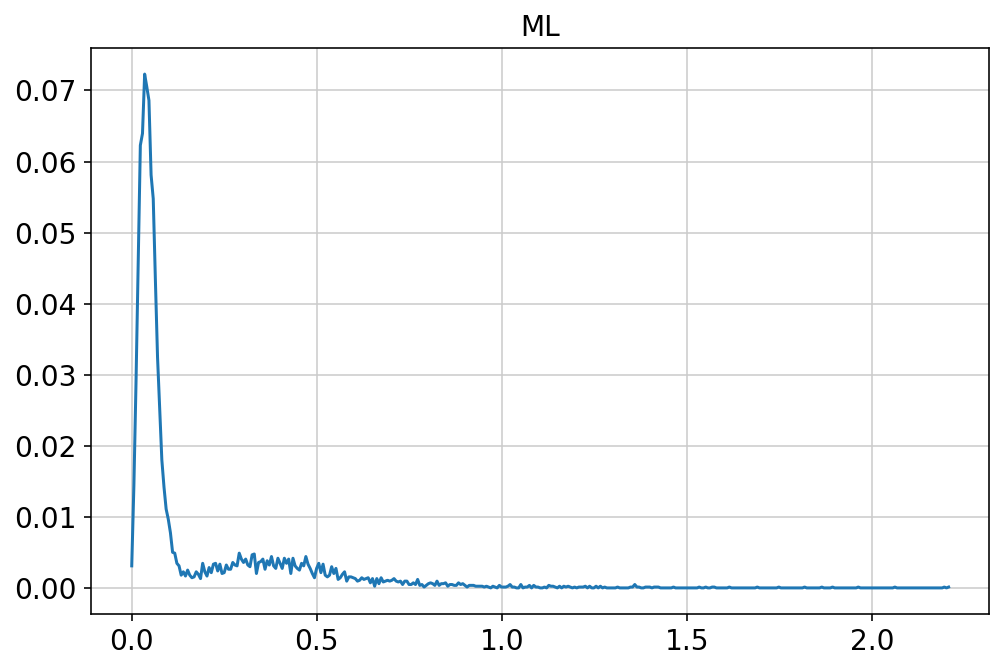

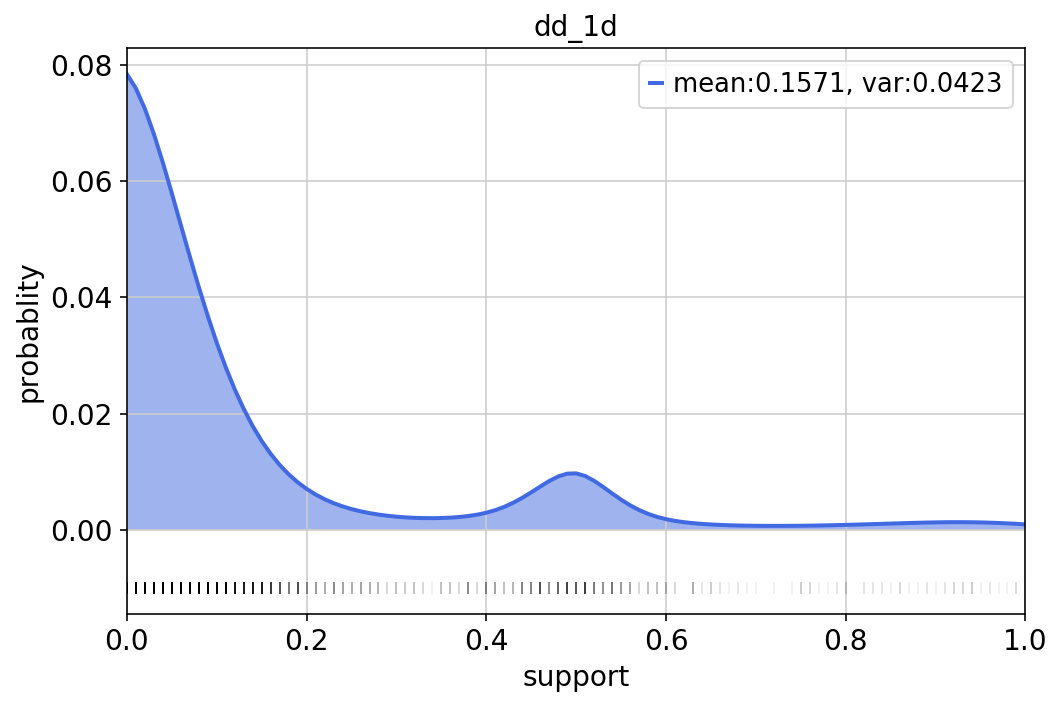

estimated gamma: 172.20000000000073


In [30]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

In [21]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


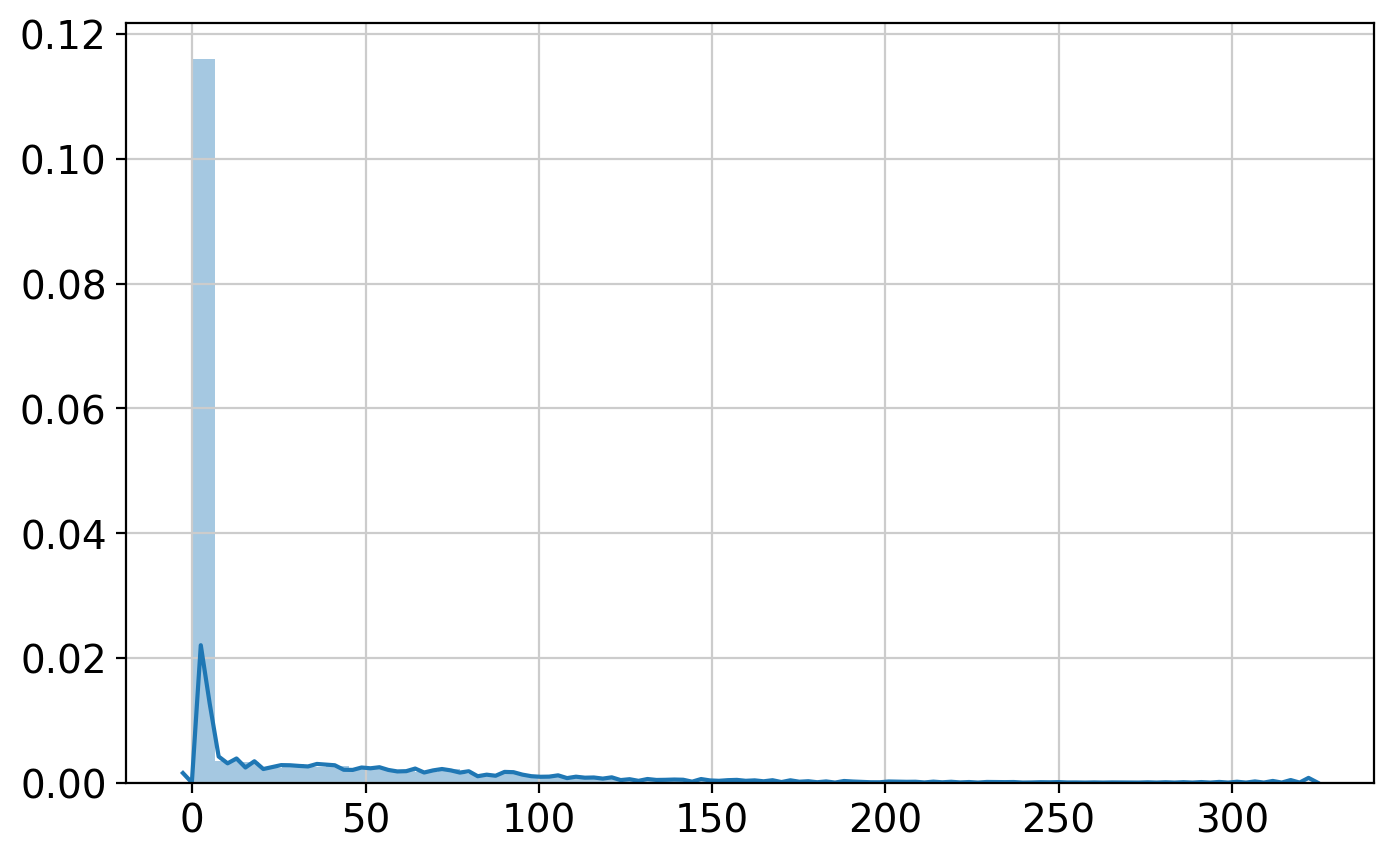

Nr:163.20000000000073
n_degree:7
[-0.16767985  0.89301203  1.26514846 -1.18916157  0.81775974 -0.27326147
 -2.22865091]


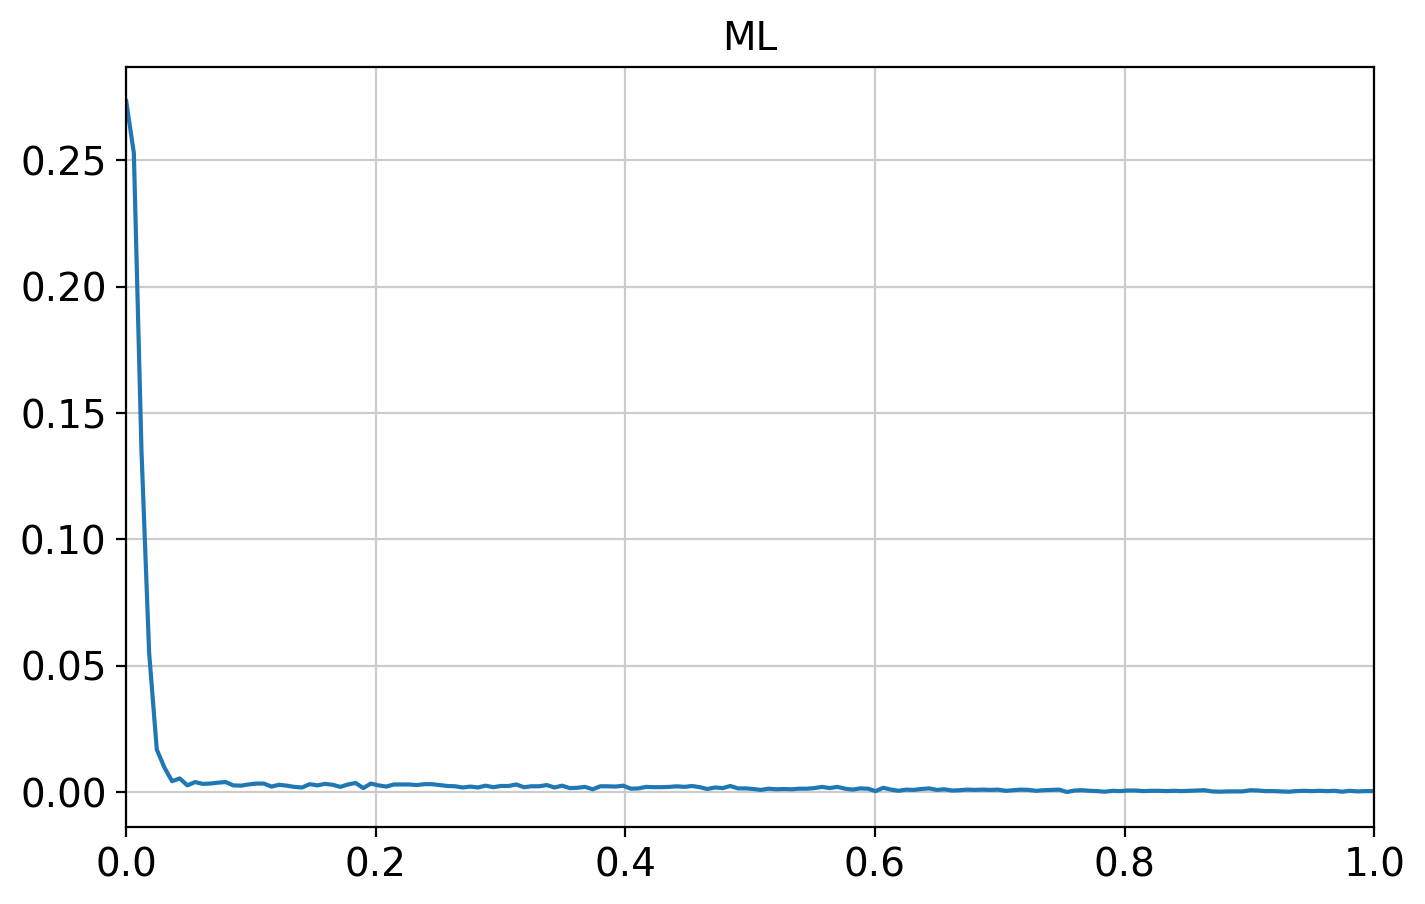

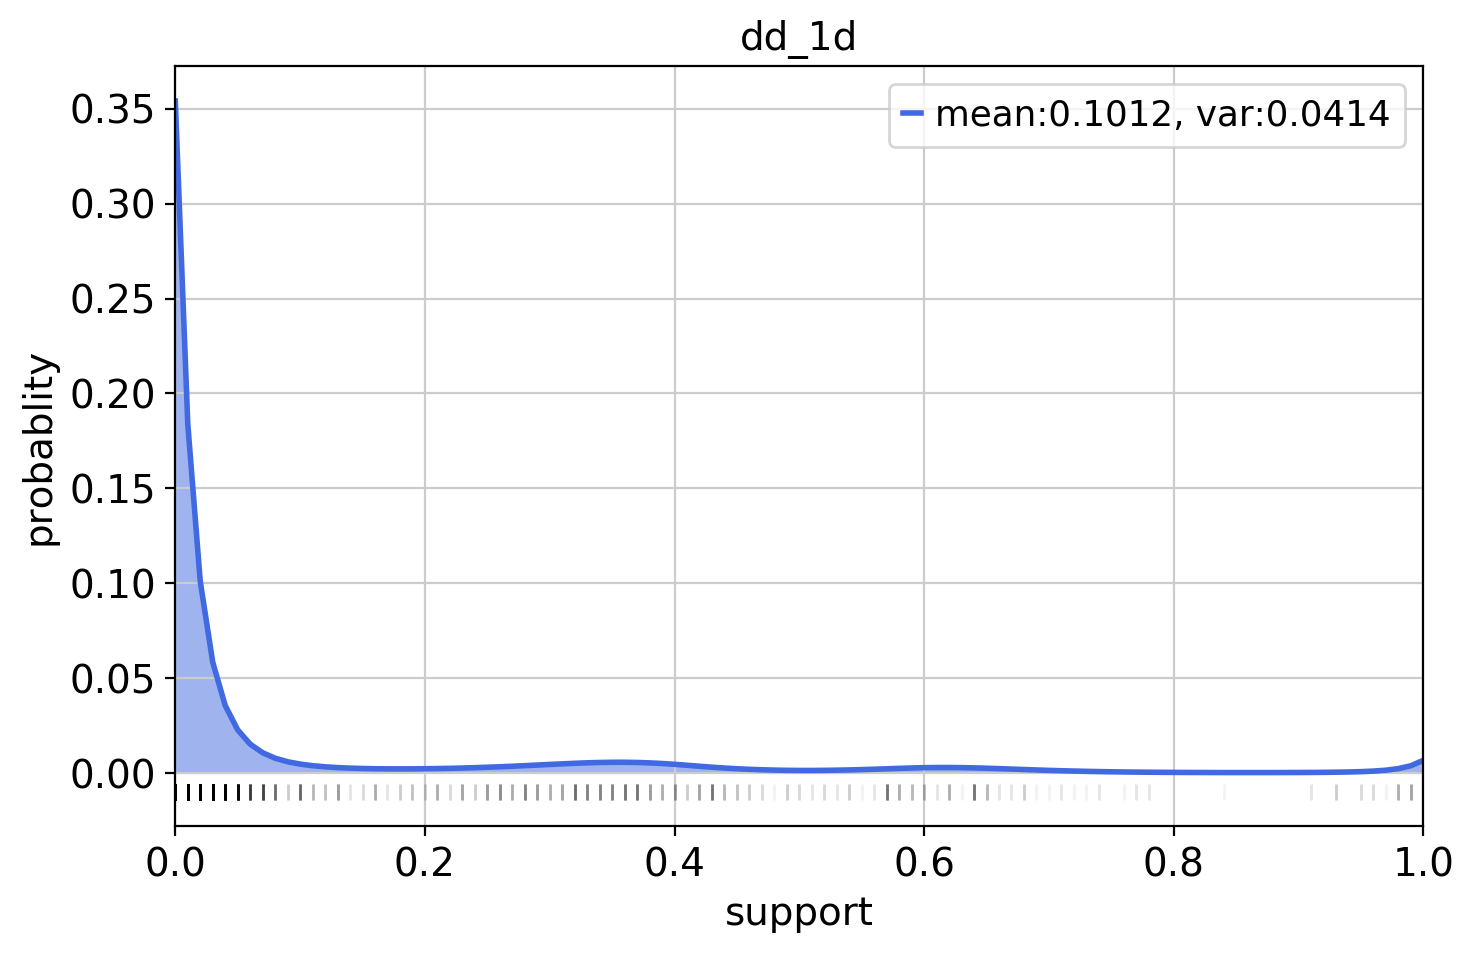

estimated Nr: 163.20000000000073
-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


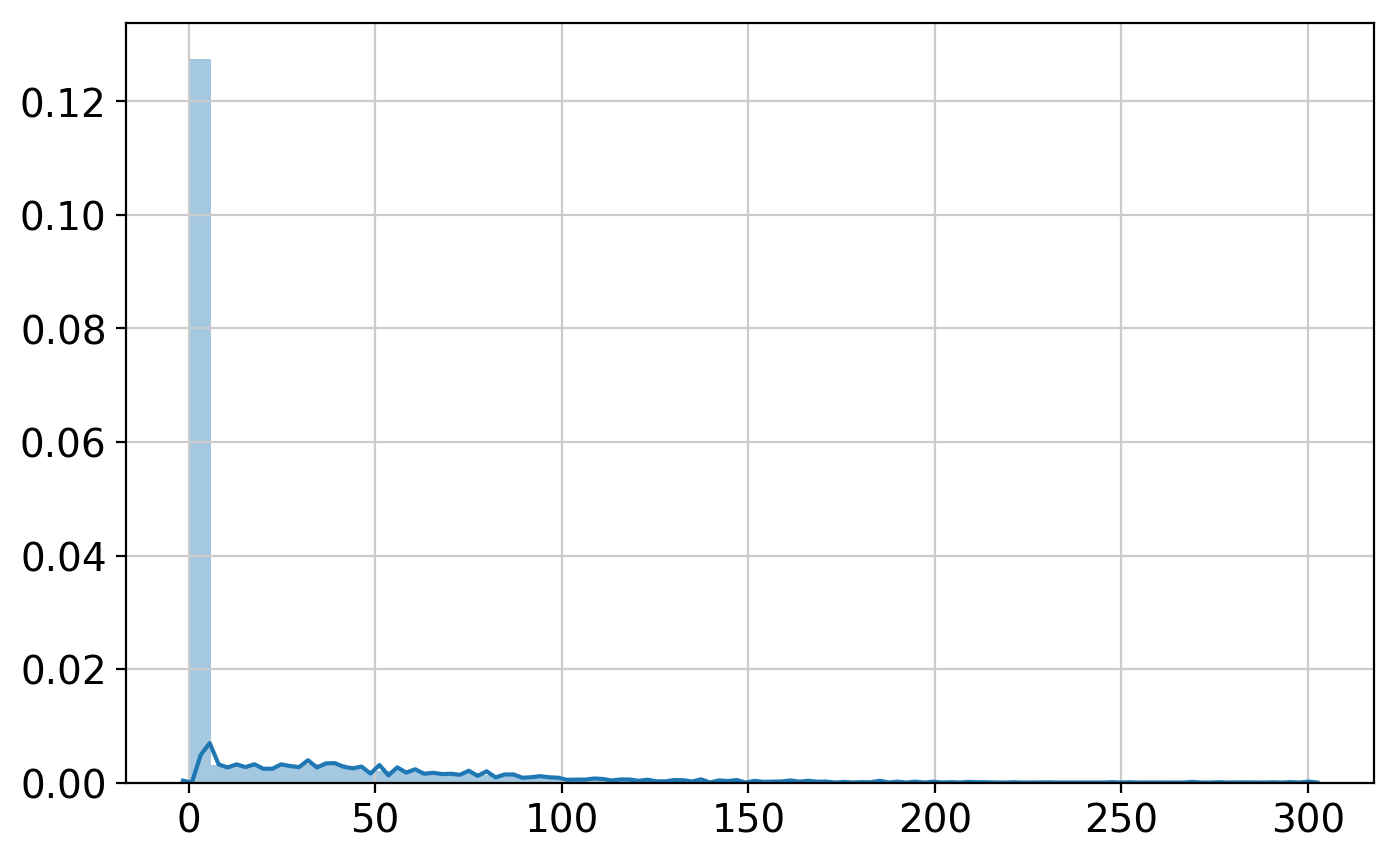

Nr:145.0
n_degree:7
[-0.07049627  1.29046772  1.46629635 -2.19597603  1.29412867 -0.07744444
 -2.96697104]


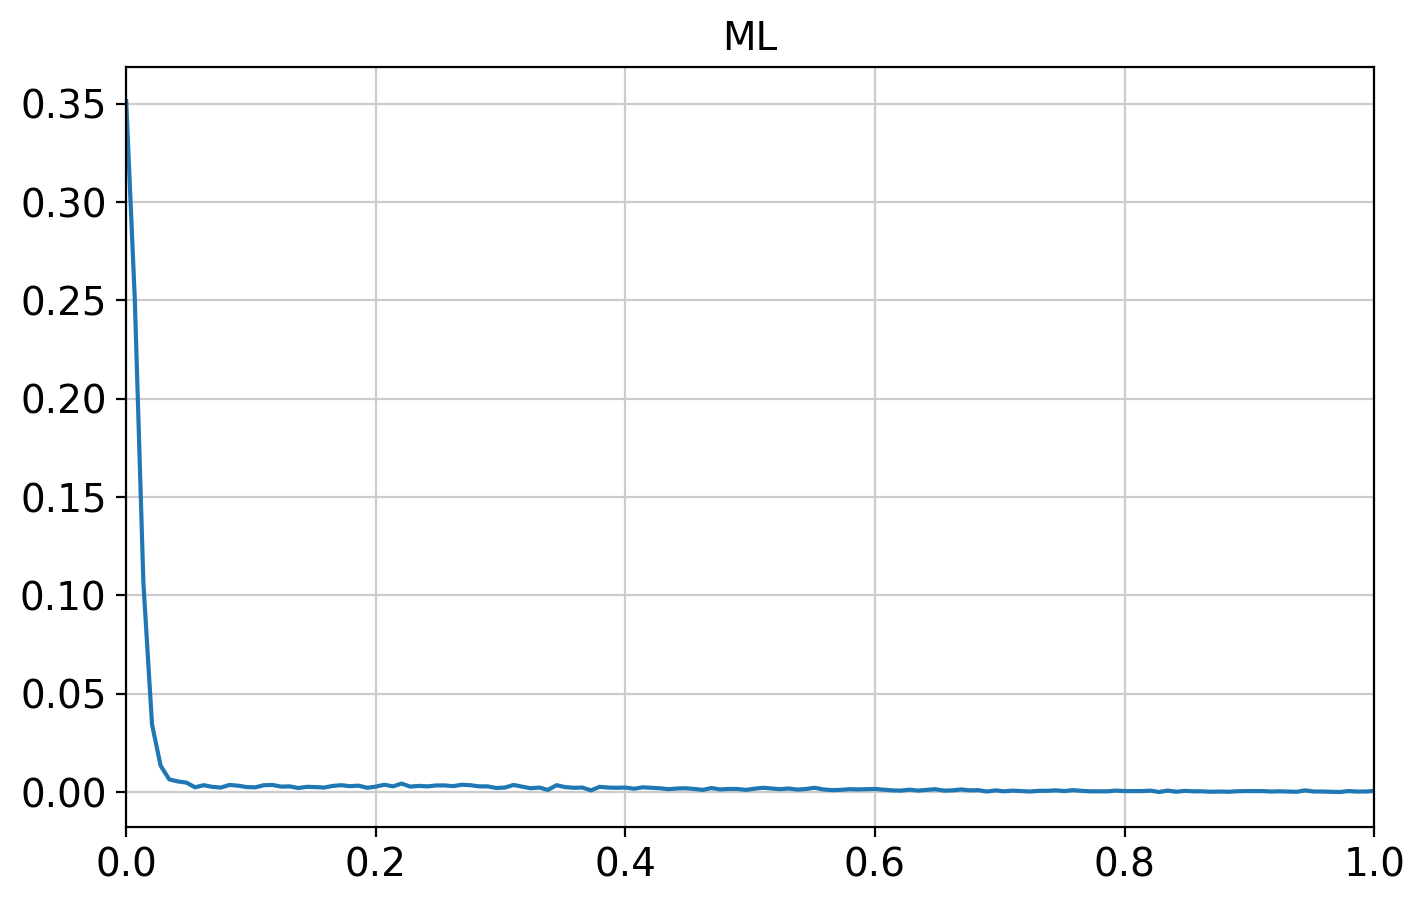

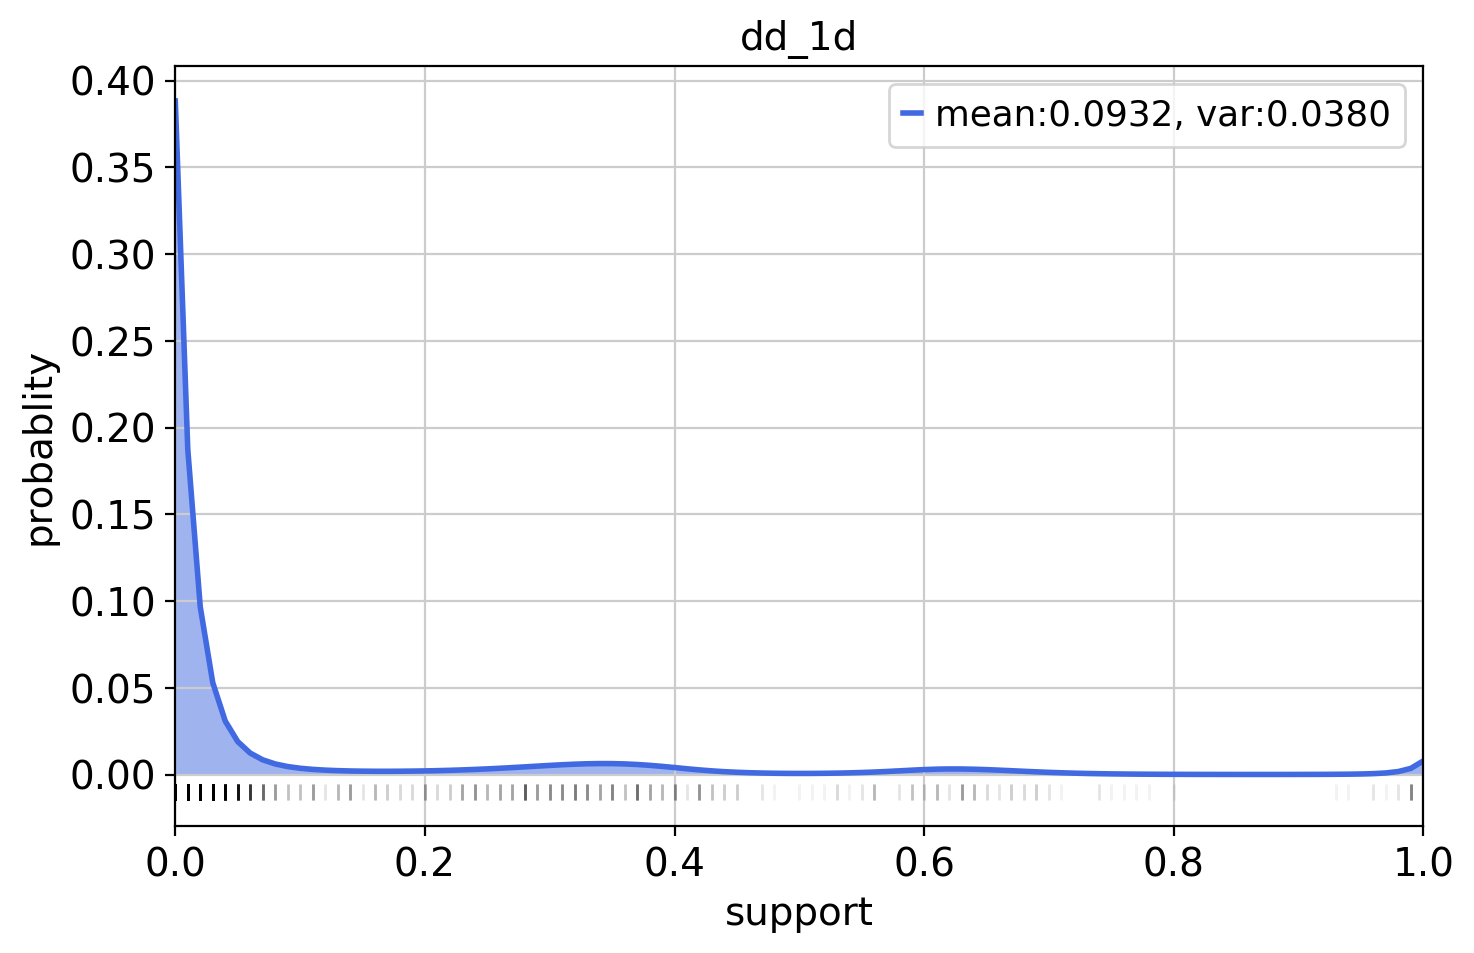

estimated Nr: 145.0
-------------------------------------------------------------------------
S100A4
Average counts per cell = 10.855745137811716


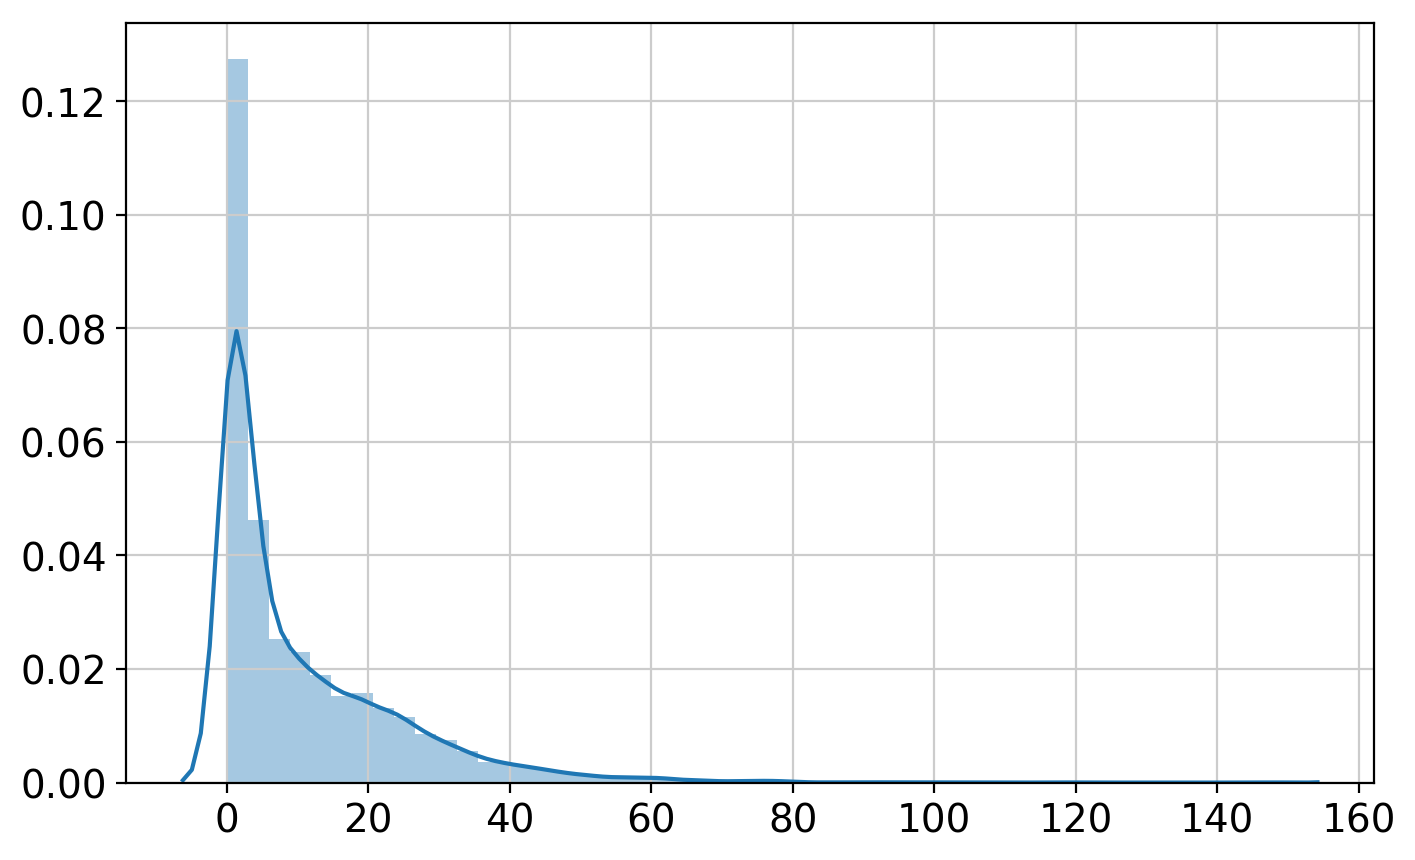

Nr:59.0
n_degree:7
[ 1.00168175  0.90099198  0.78867595  0.18602648  0.14258158 -1.15807632
 -2.47719791]


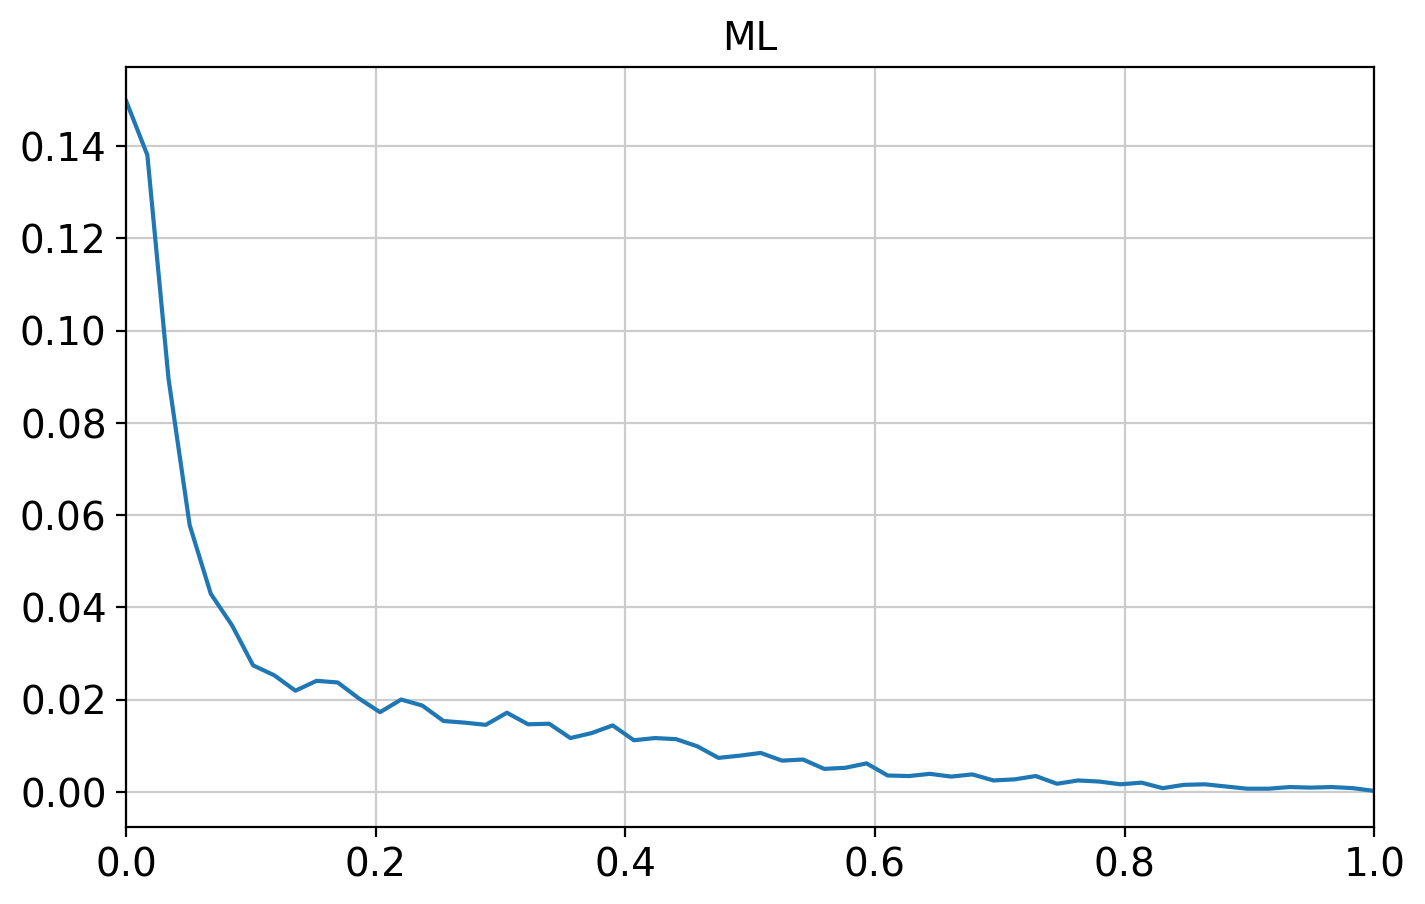

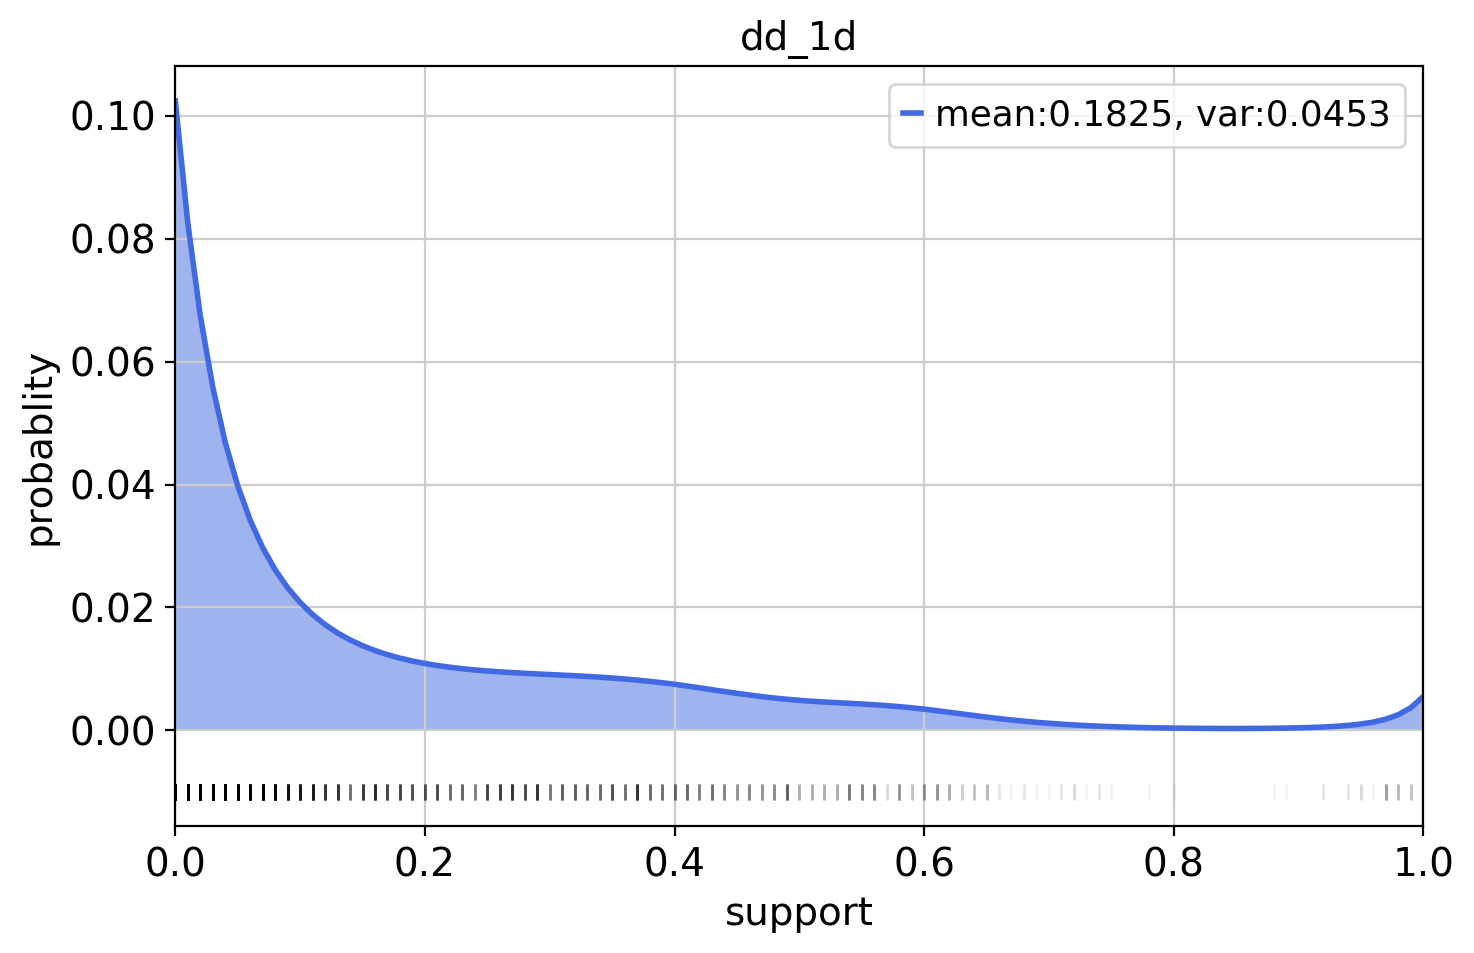

estimated Nr: 59.0
-------------------------------------------------------------------------
LGALS2
Average counts per cell = 1.2554587758024103


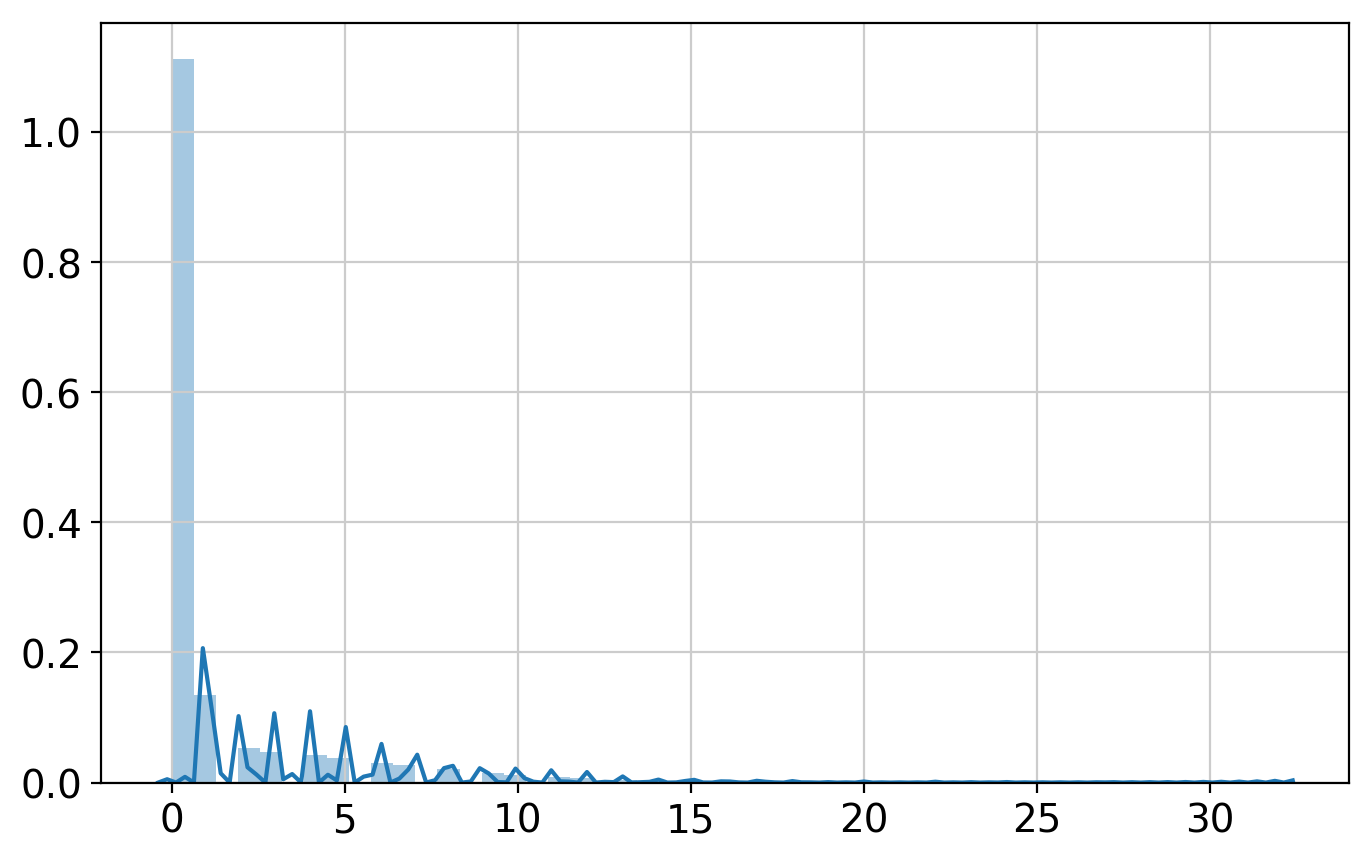

Nr:13.0
n_degree:7
[  1.91074699   3.68892835   3.64162862  -1.55049591   6.06887851
  -1.94252773 -13.72557898]


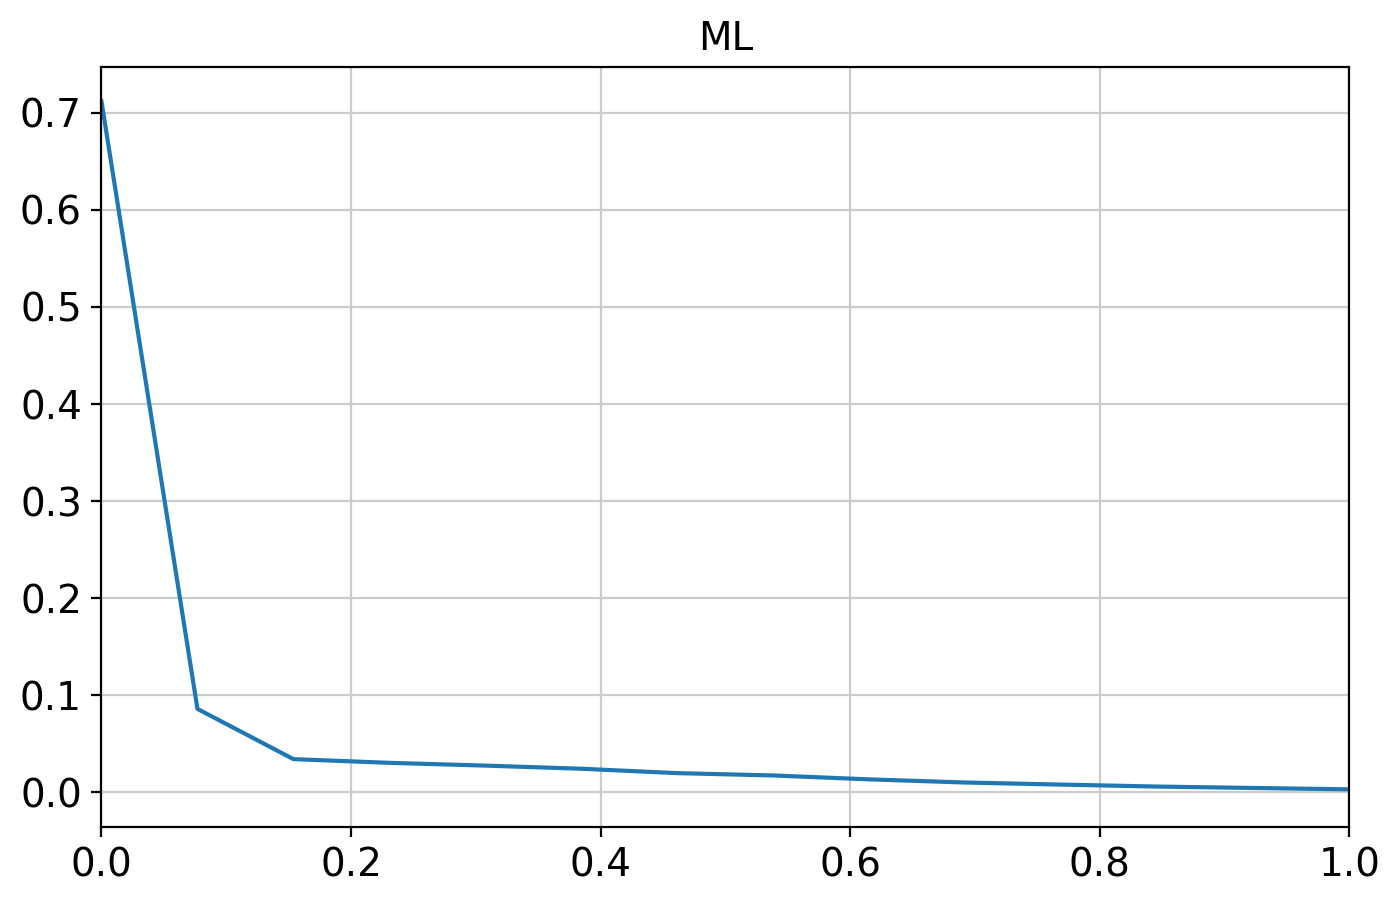

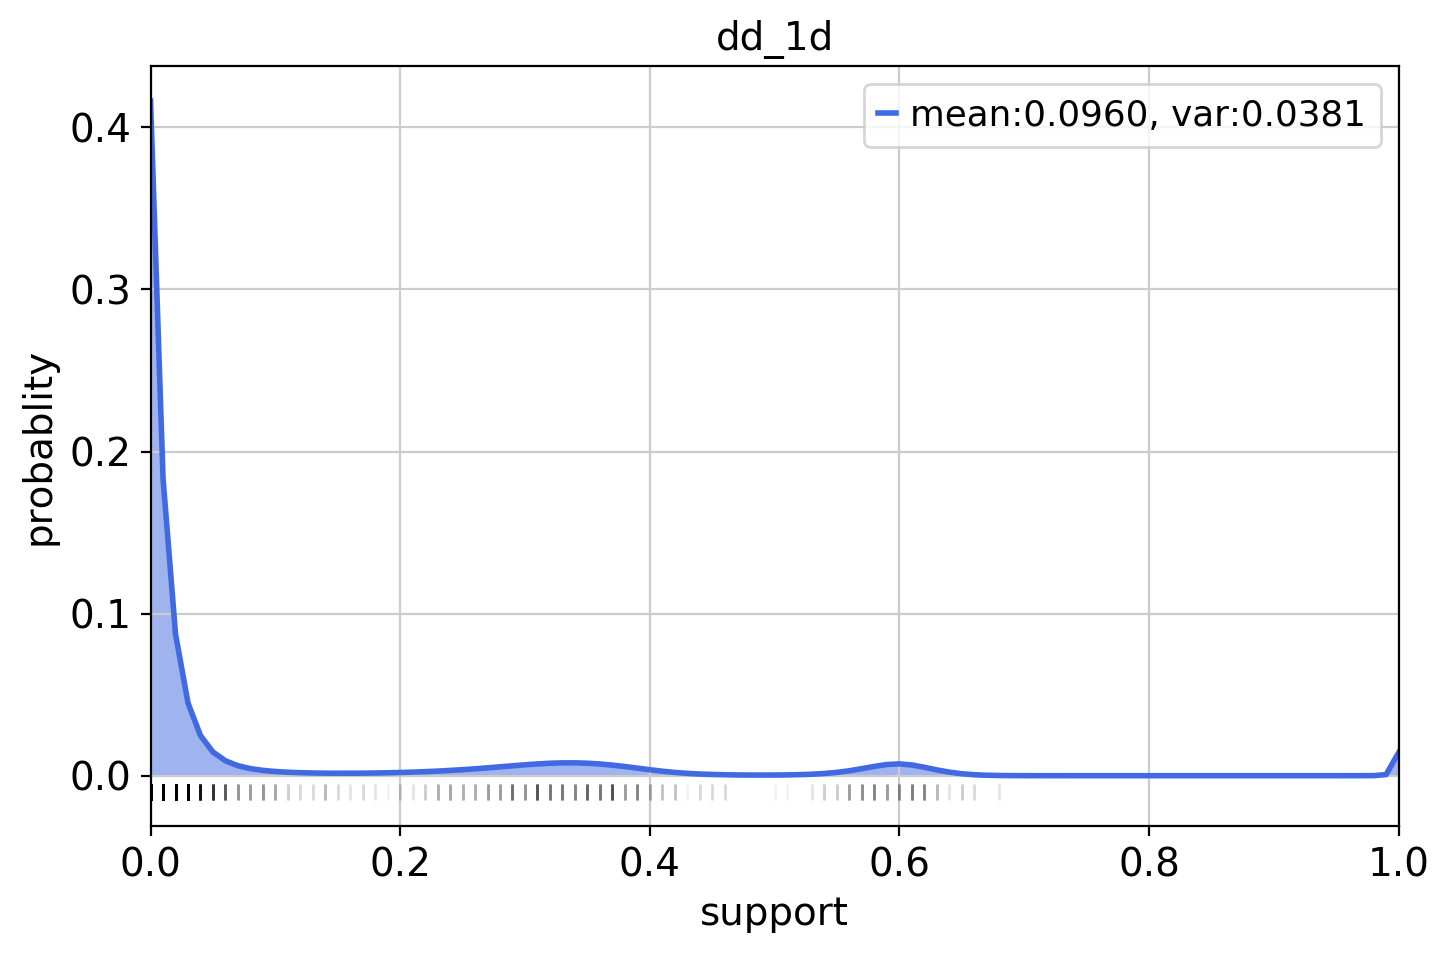

estimated Nr: 13.0
-------------------------------------------------------------------------
FCN1
Average counts per cell = 2.1746808256771266


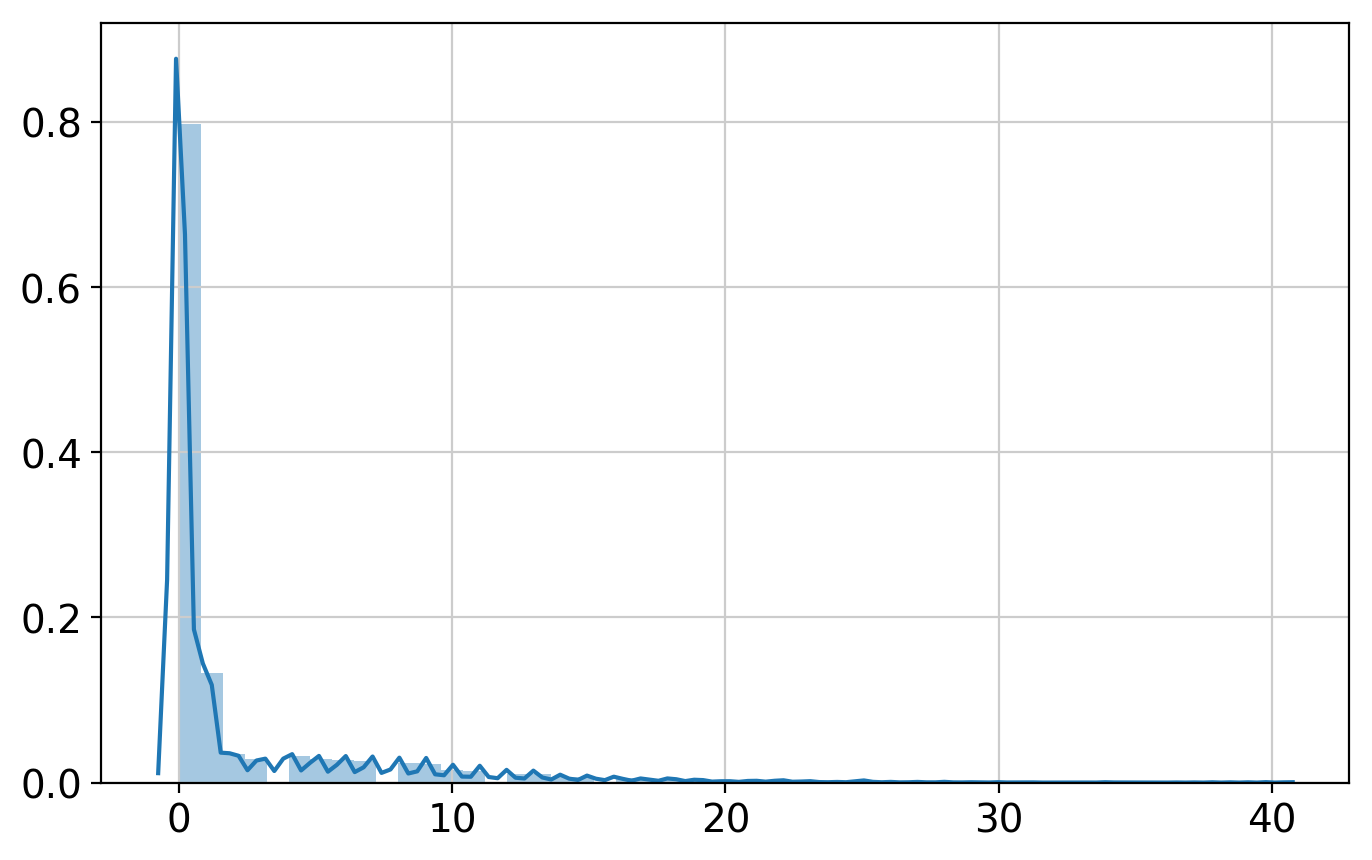

Nr:20.0
n_degree:7
[  1.86261973   3.61591404   3.40008517  -2.11899888   5.48974626
  -1.23057644 -11.60933134]


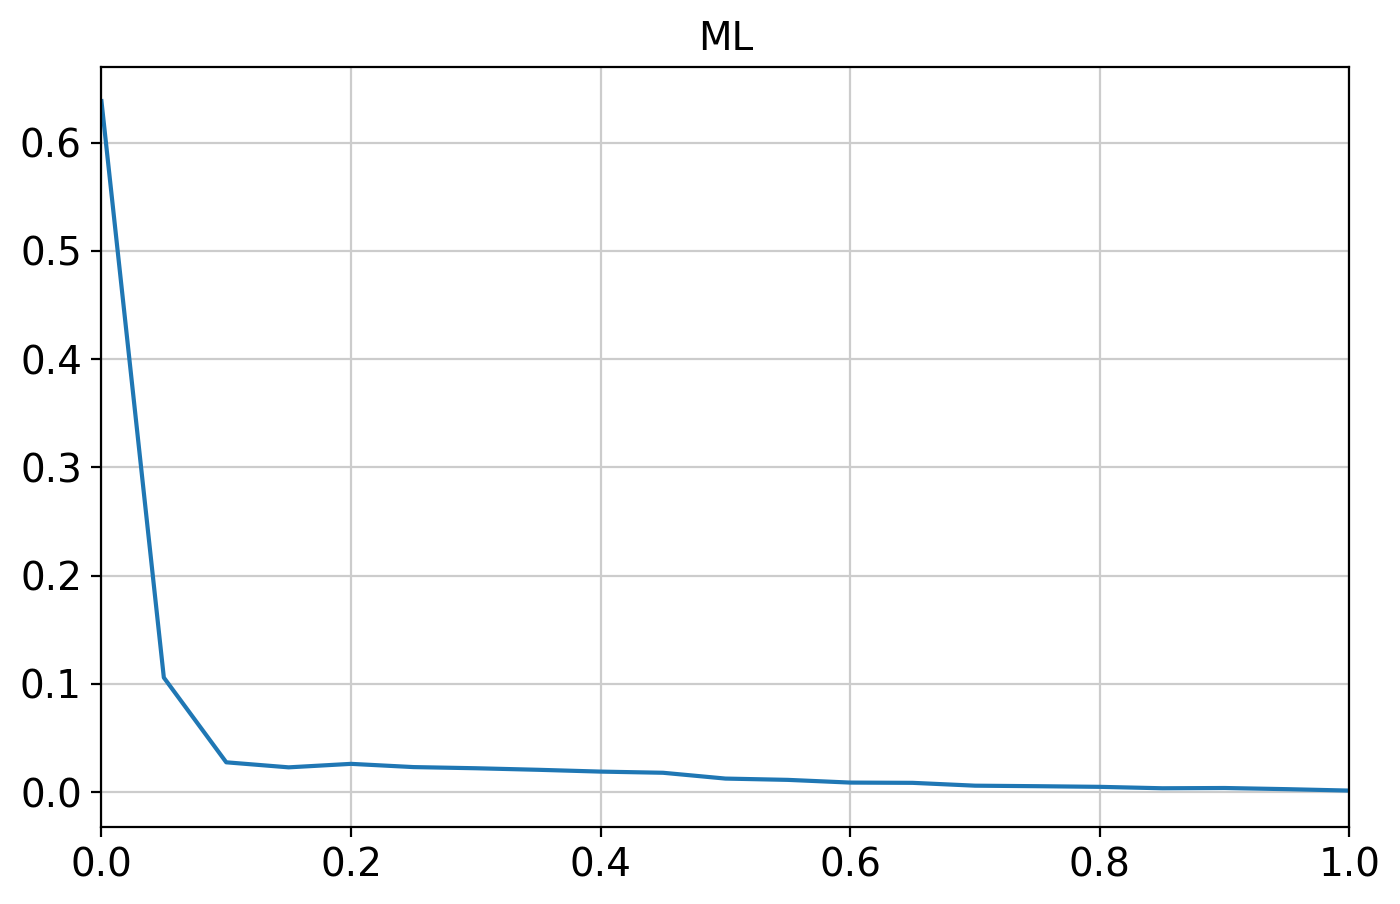

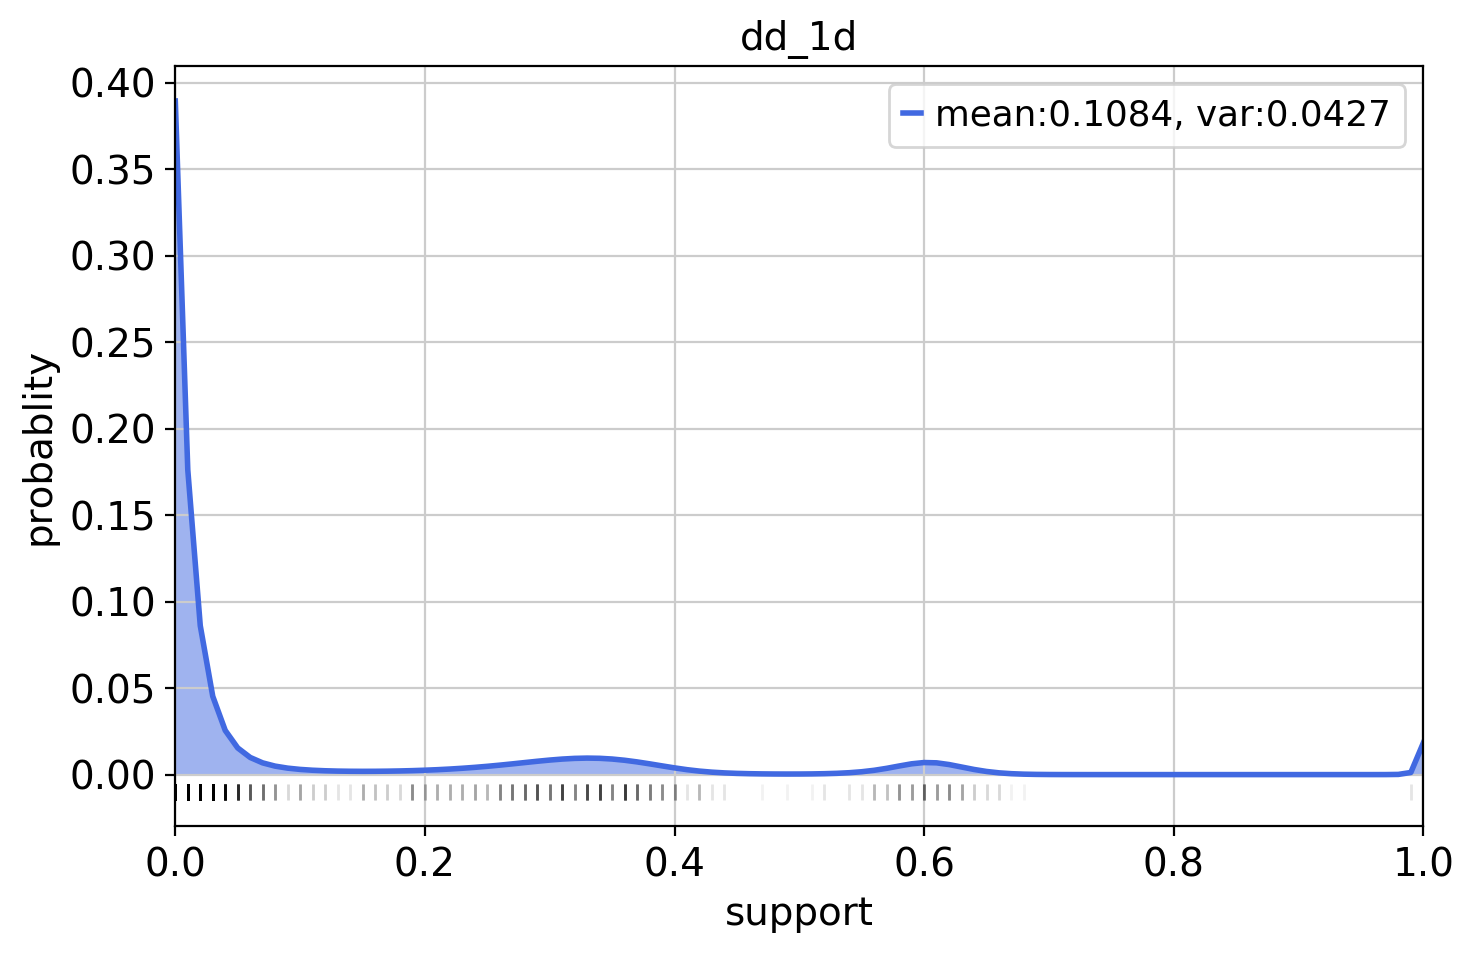

estimated Nr: 20.0
-------------------------------------------------------------------------
CD14
Average counts per cell = 0.6564849063357595


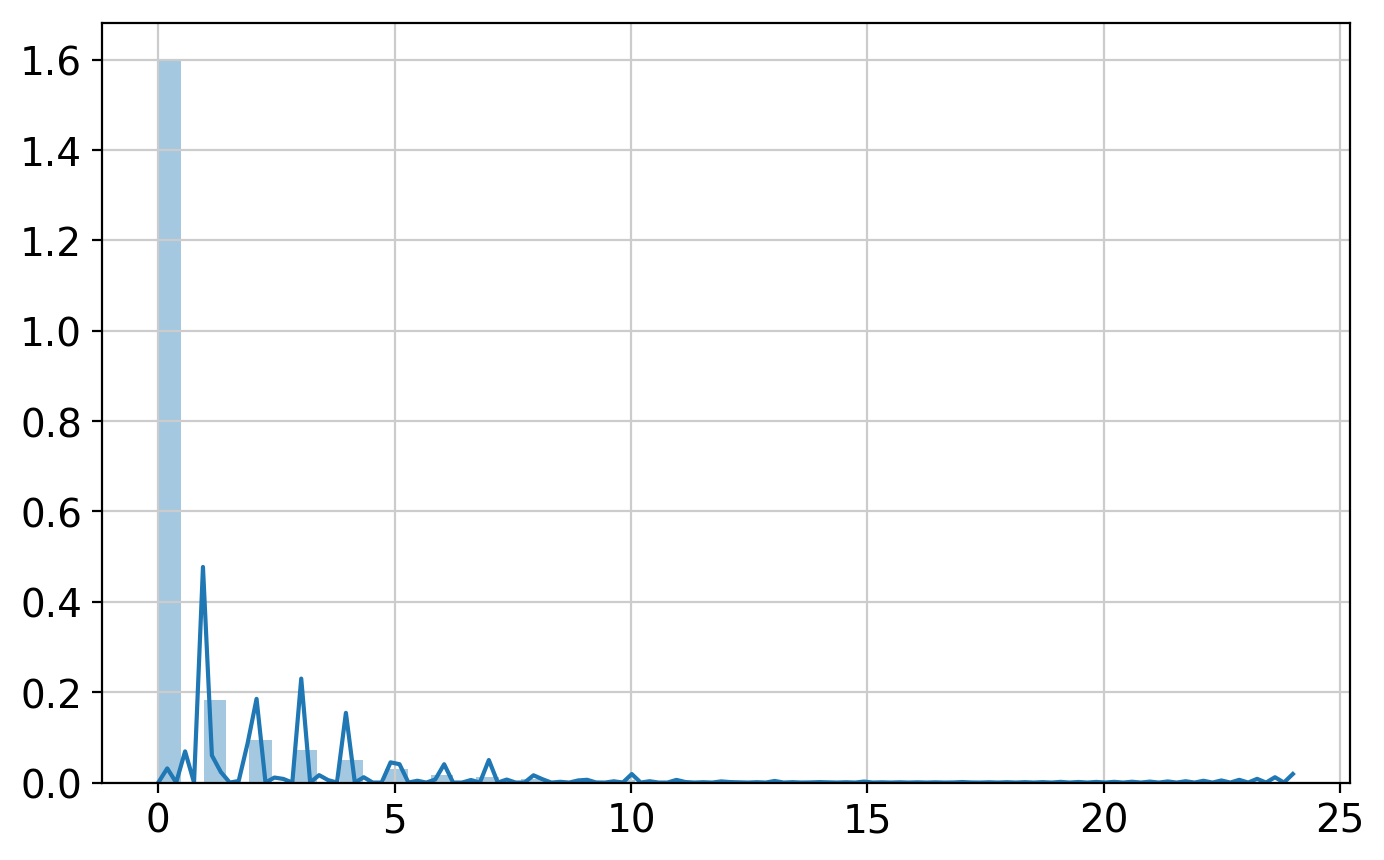

Nr:8.0
n_degree:7
[ 2.12266118  3.84868203  4.43381537  1.03567466 -2.36686523 -4.84951219
 -5.39926463]


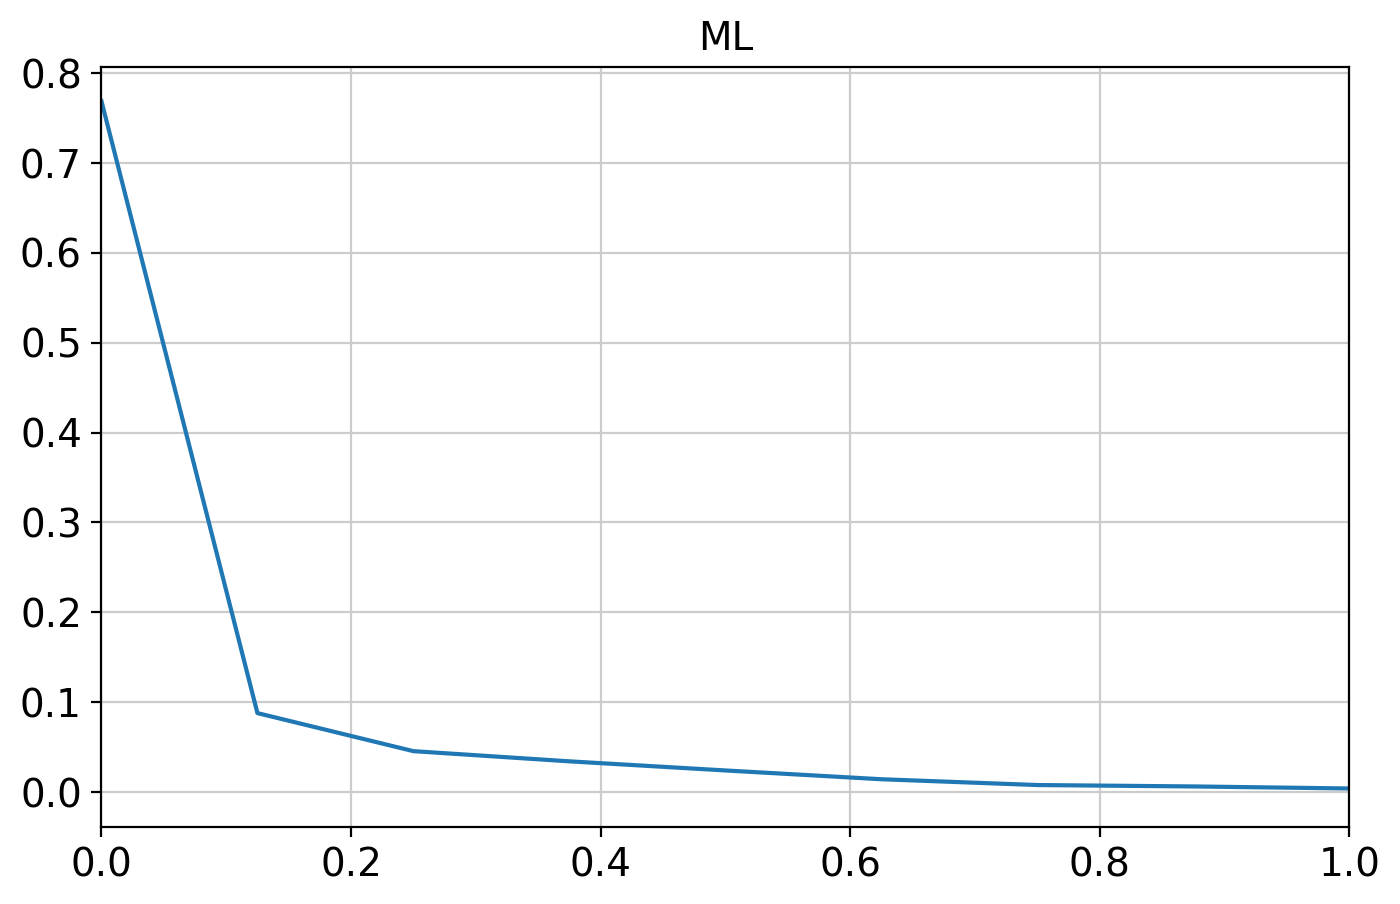

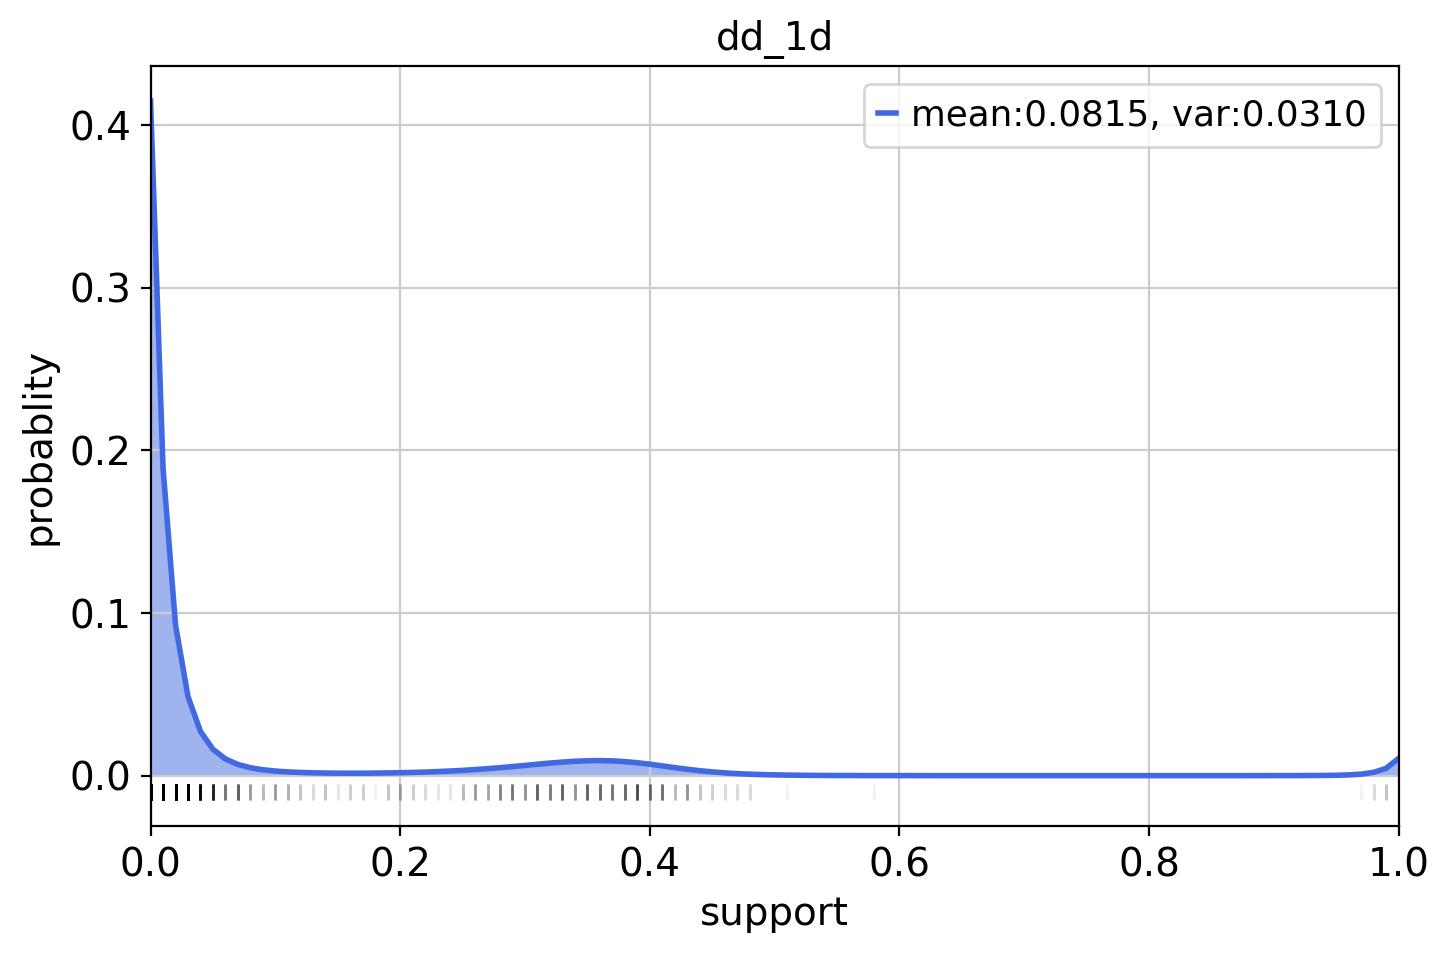

estimated Nr: 8.0
-------------------------------------------------------------------------
GZMB
Average counts per cell = 0.46116215248777


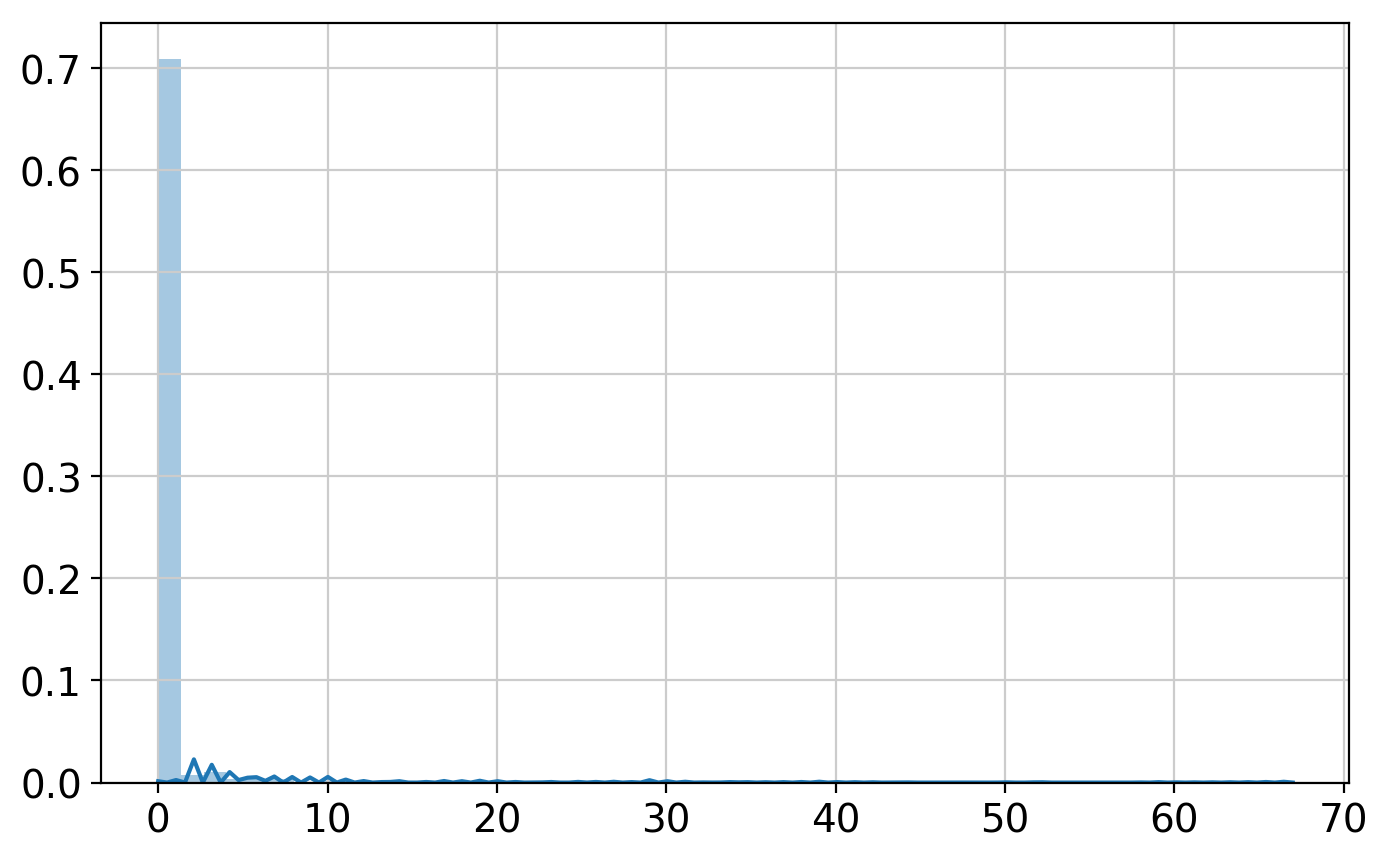

Nr:10.0
n_degree:7
[-2.18270619 -0.1922574   1.48062303 -0.28974997 -0.54625912  1.36761325
 -0.3703675 ]


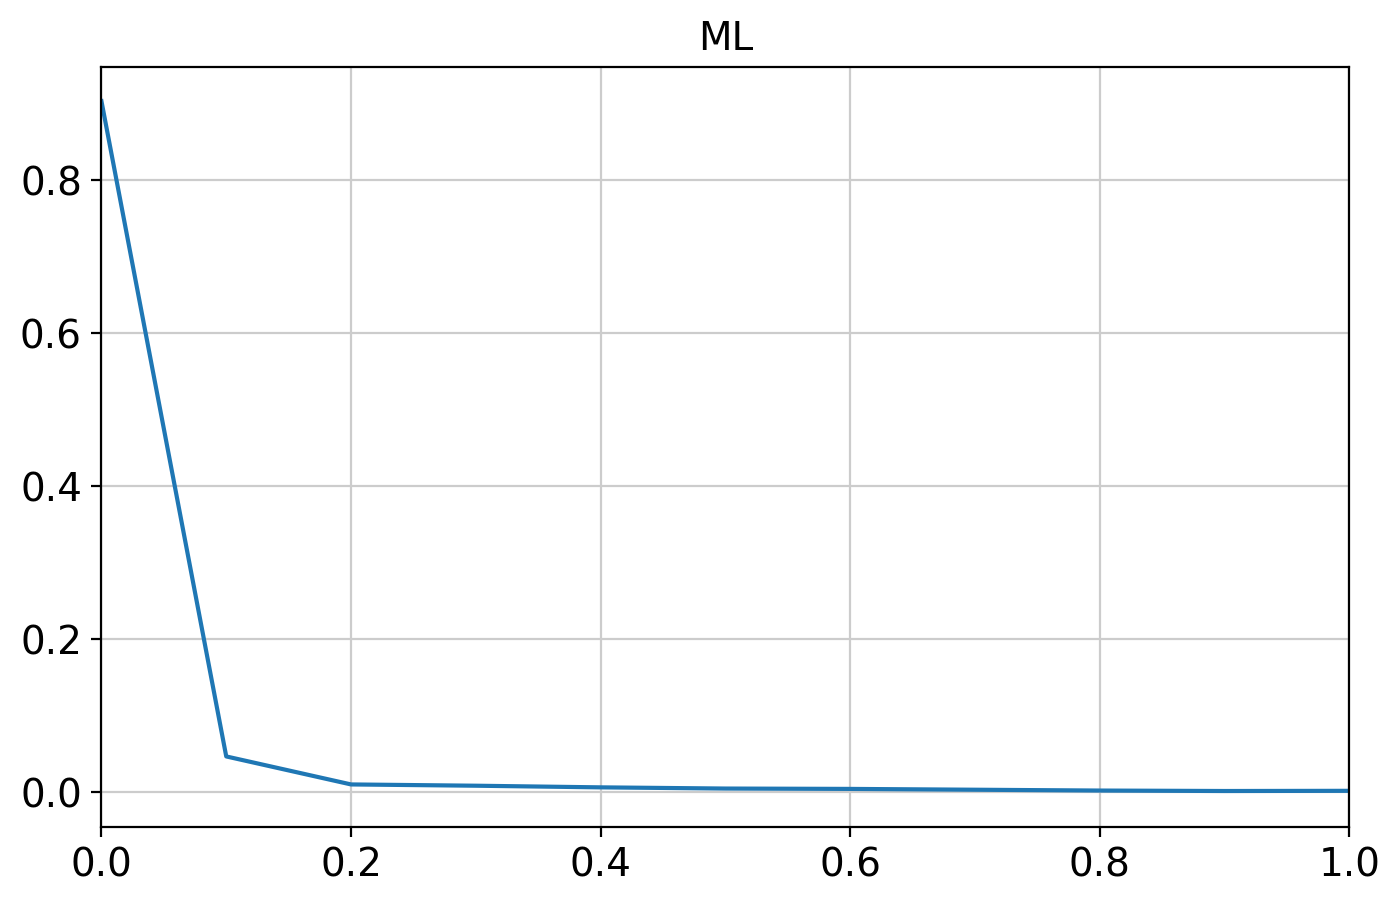

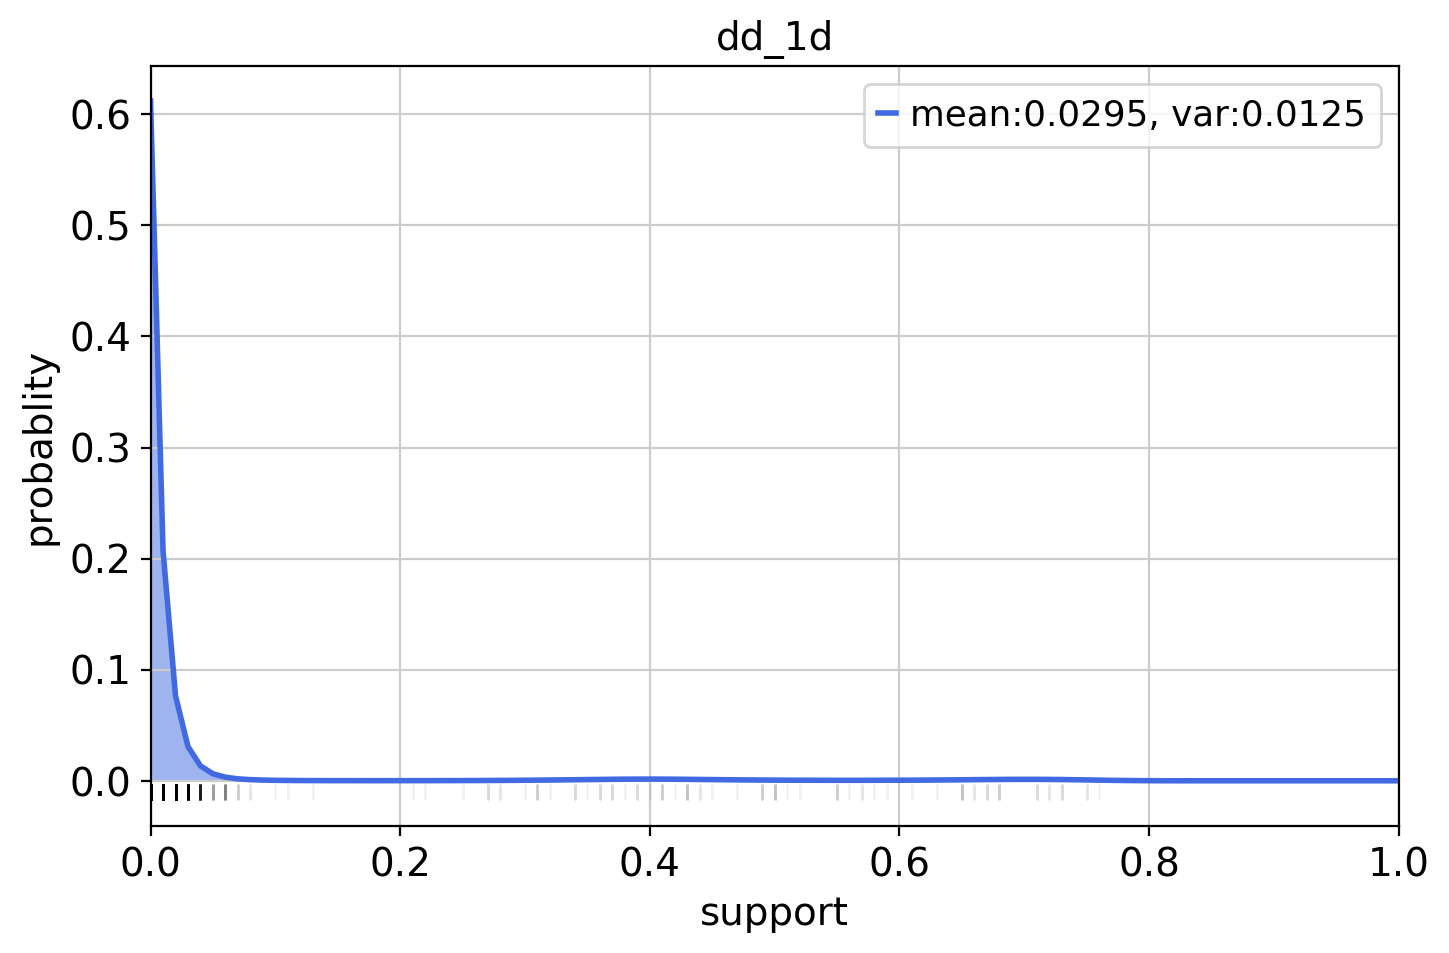

estimated Nr: 10.0
-------------------------------------------------------------------------
IGFBP7
Average counts per cell = 0.09760171817205585


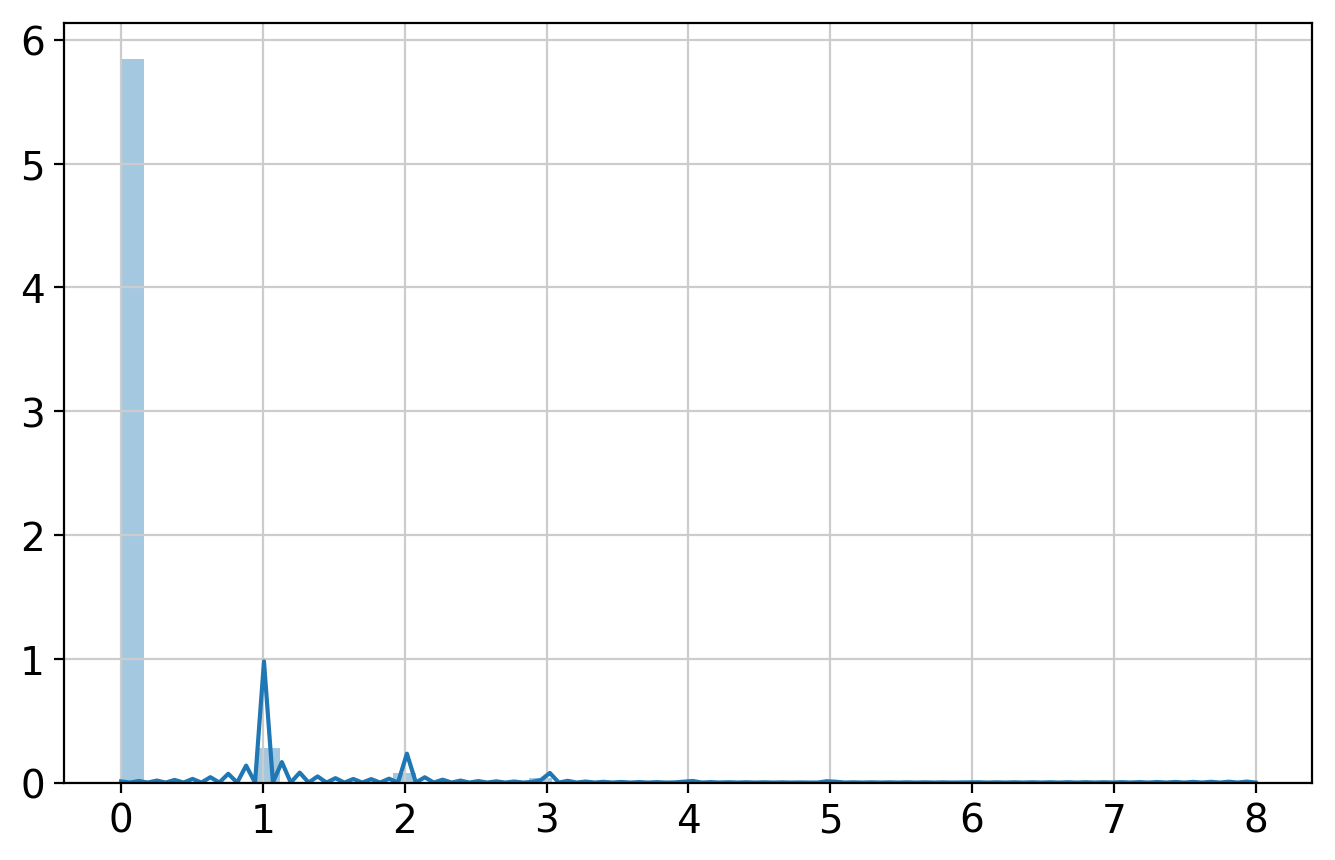

Nr:2.0
n_degree:7
[  5.22736654   5.98911562   7.30944652   7.67258986  -1.17000141
 -10.14569189 -14.8657201 ]


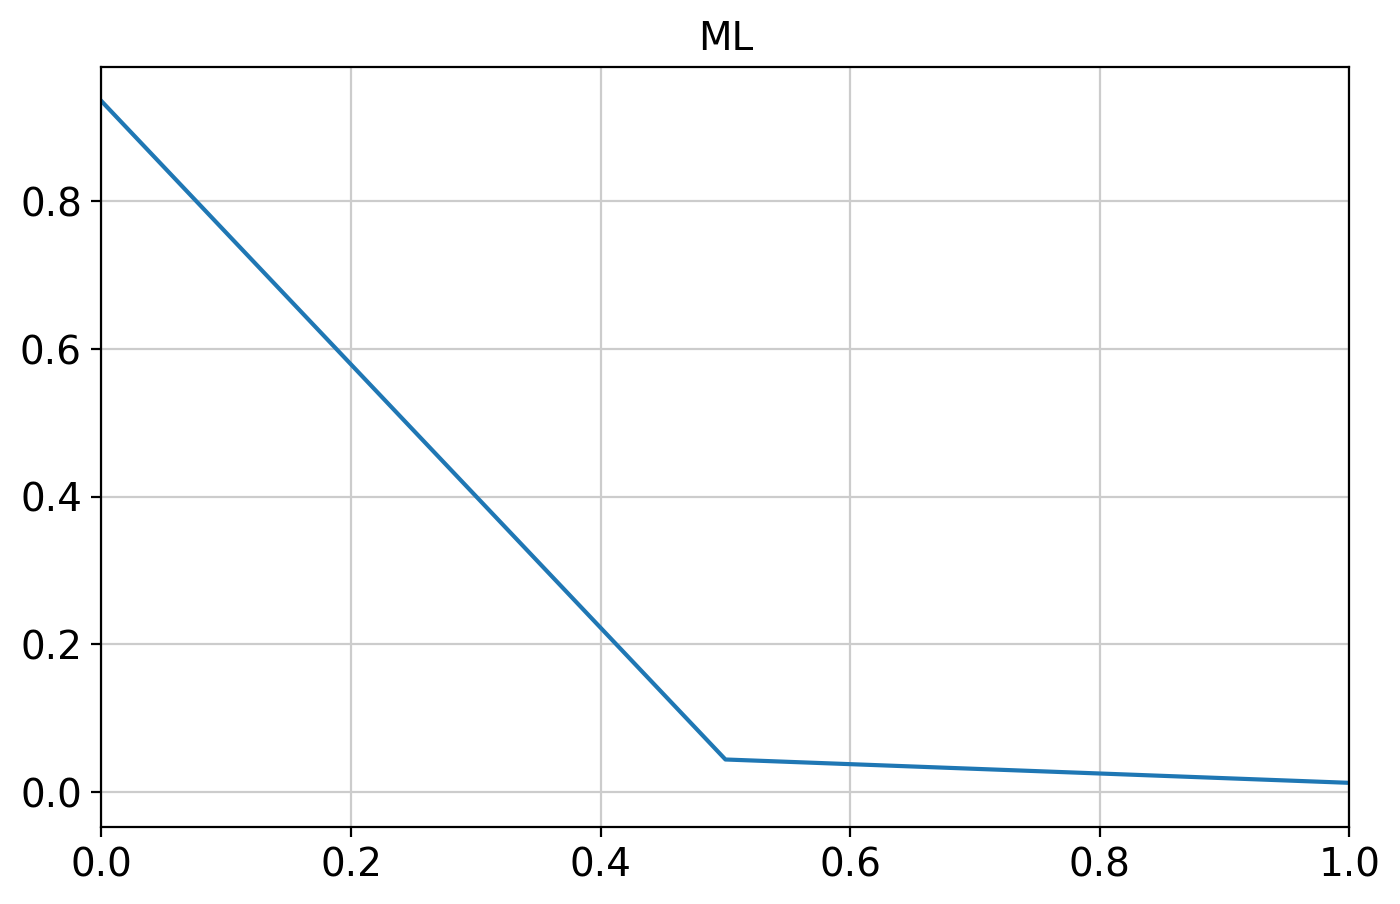

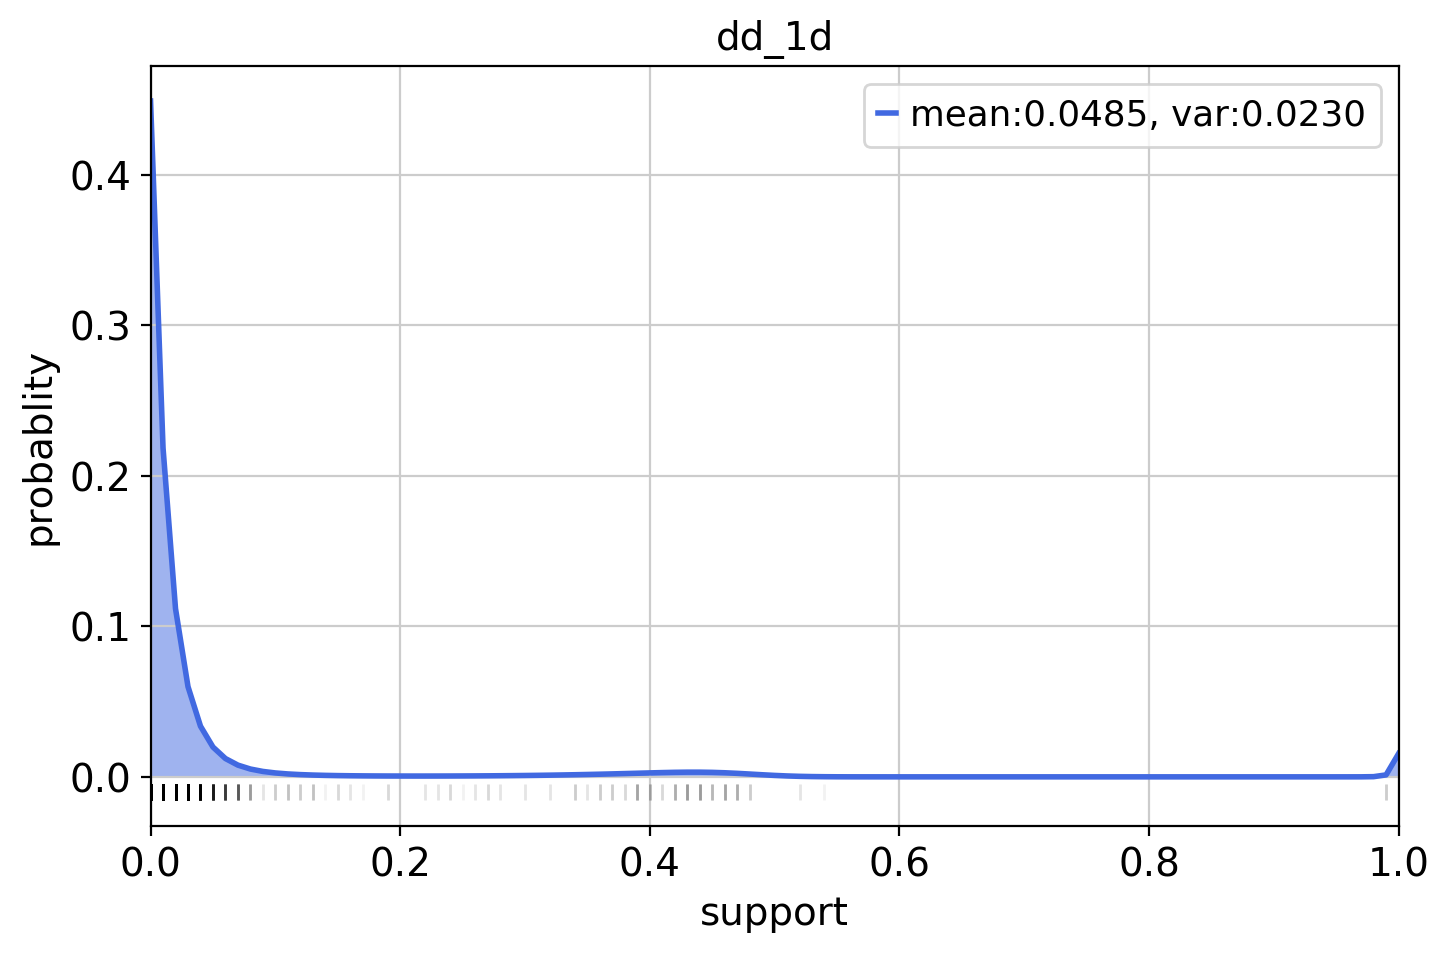

estimated Nr: 2.0
-------------------------------------------------------------------------
CD79A
Average counts per cell = 1.003937477627968


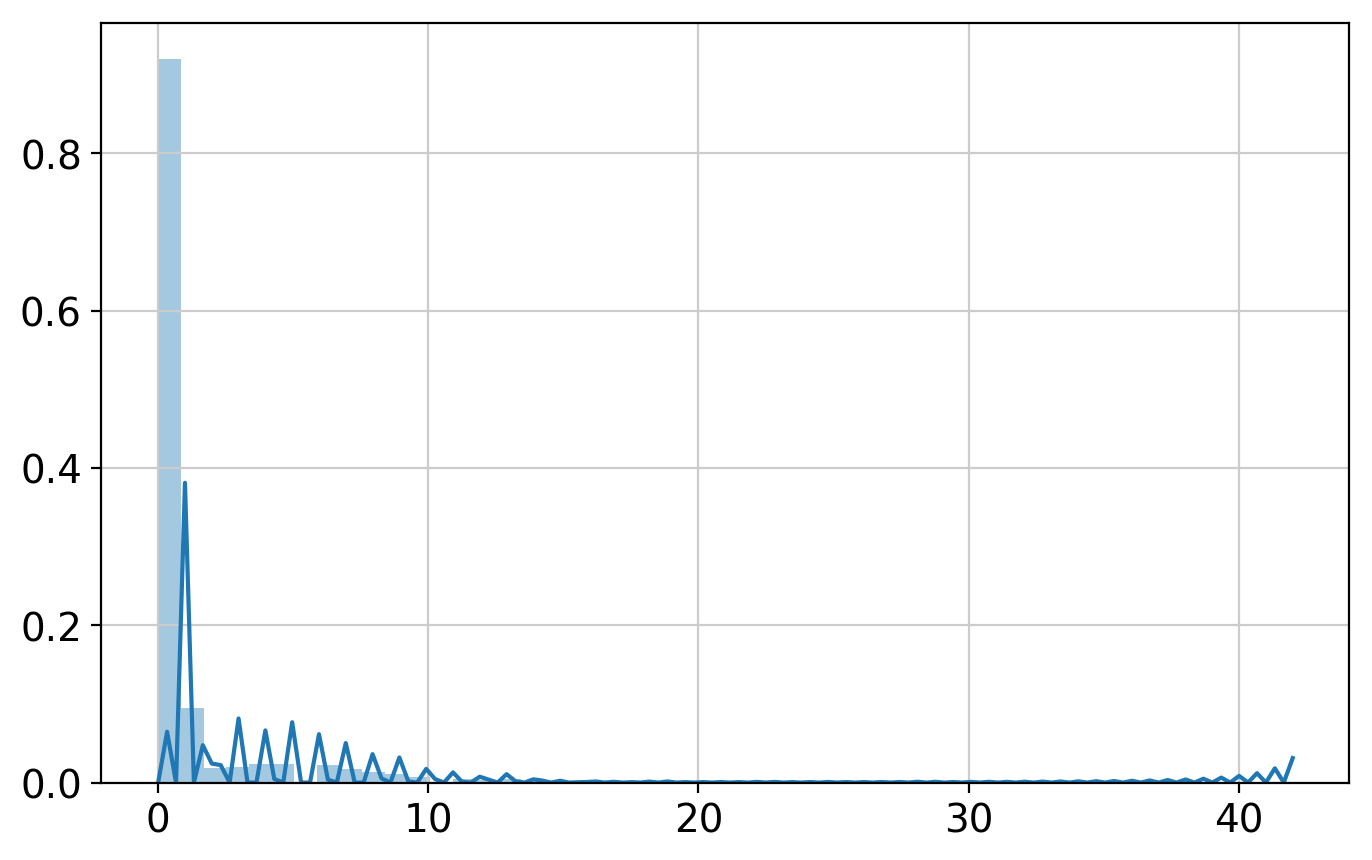

Nr:12.0
n_degree:7
[-1.00040835 -0.19265019  2.12112389  4.78328522 -0.16148922 -4.19612587
 -5.98318612]


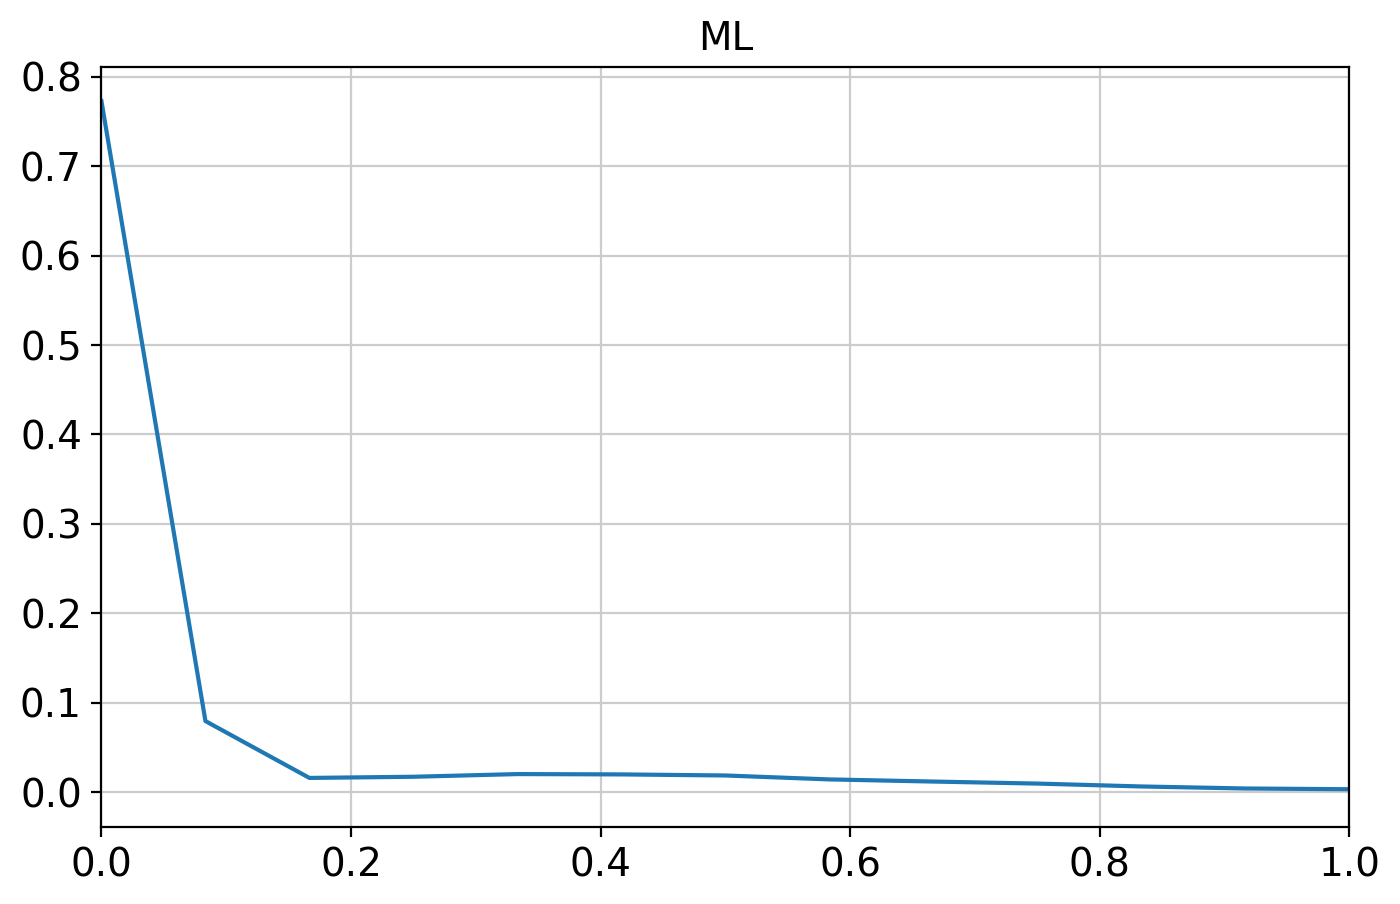

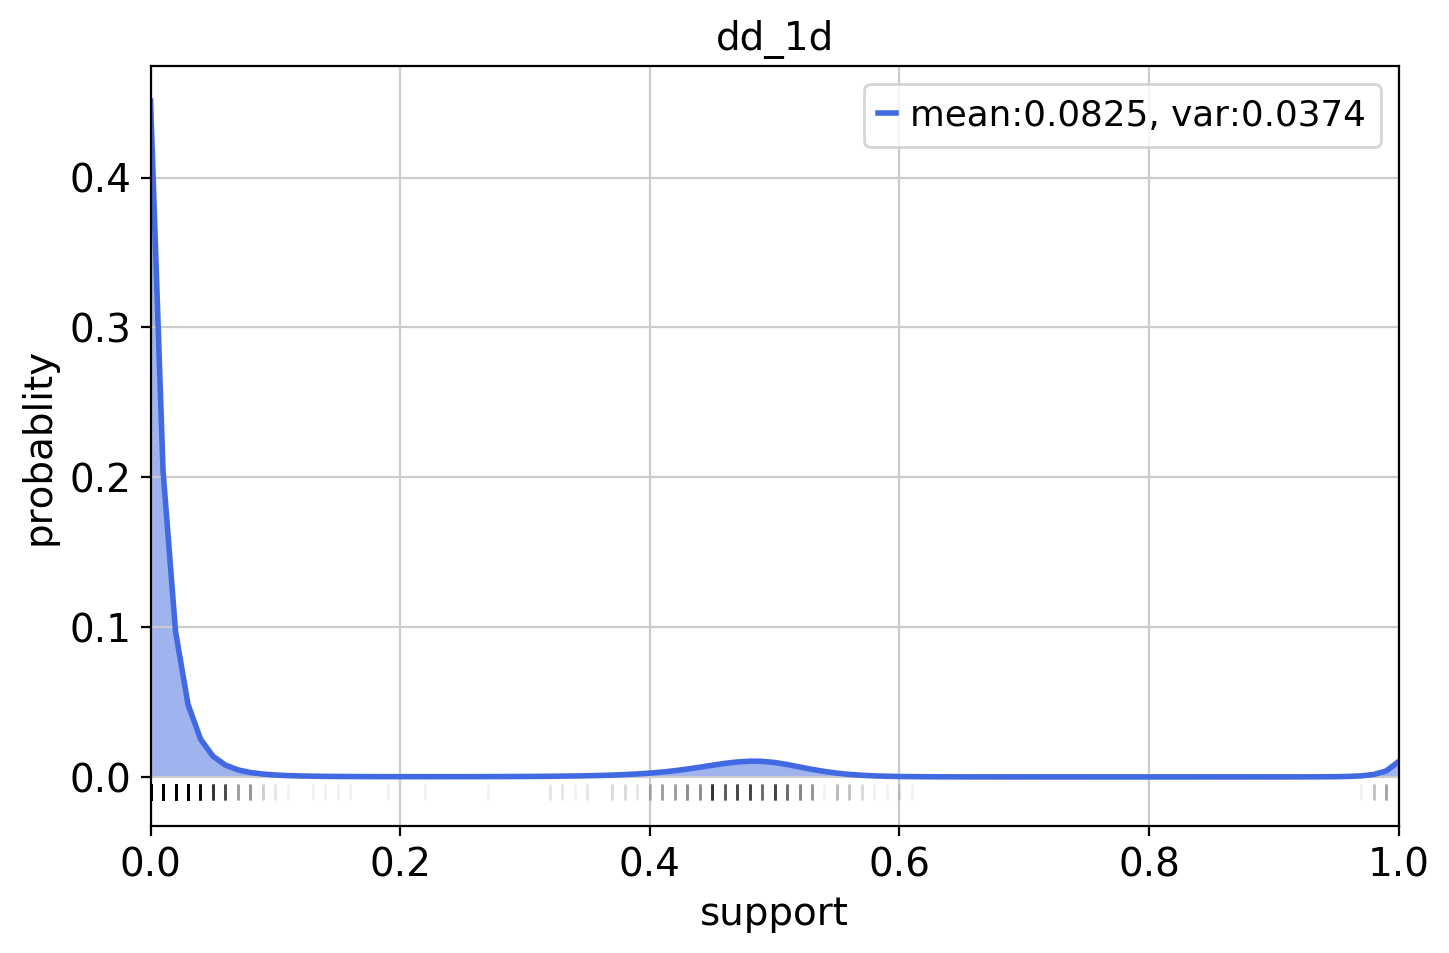

estimated Nr: 12.0
-------------------------------------------------------------------------
CD3E
Average counts per cell = 1.6037465696217634


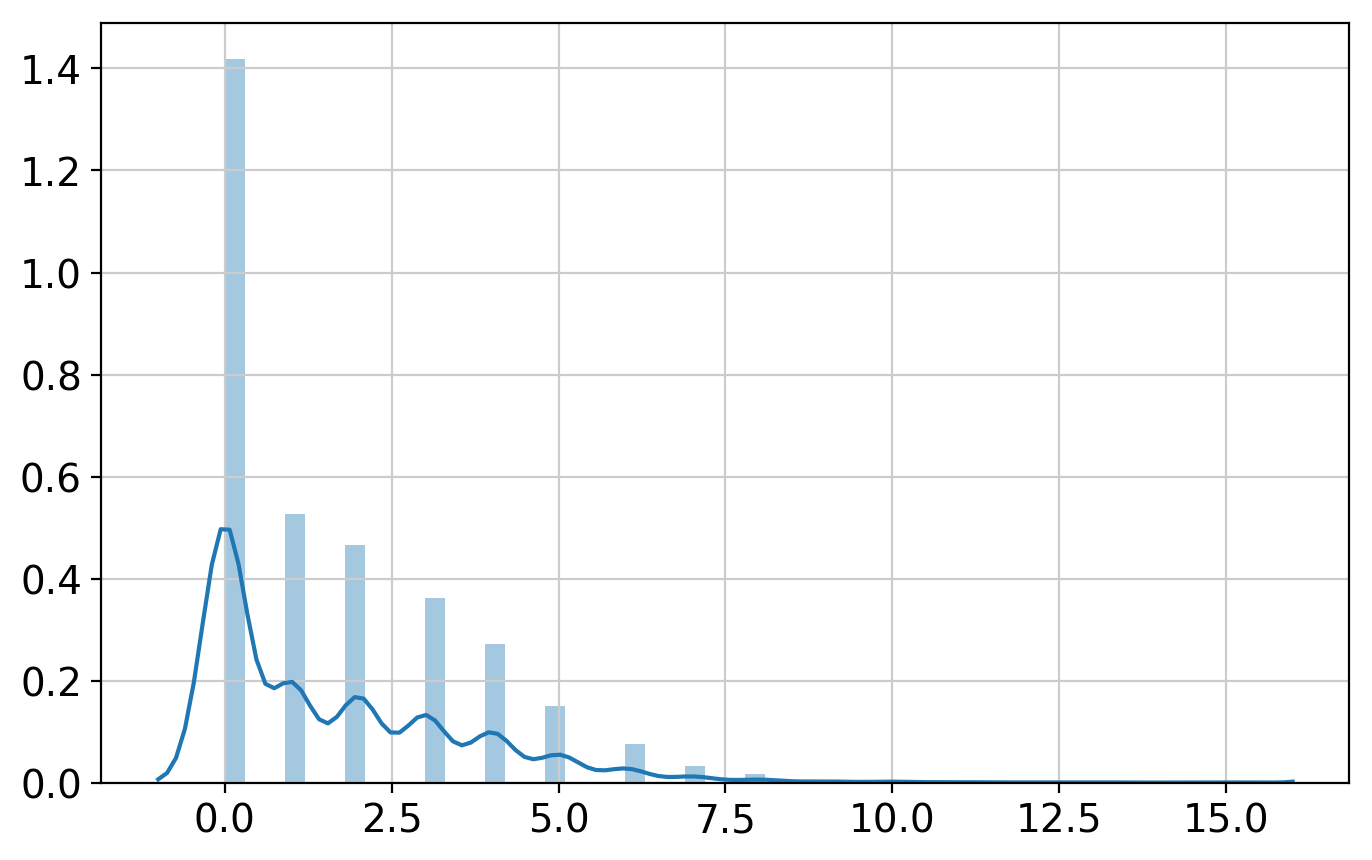

Nr:7.0
n_degree:7
[  46.34154524   47.16174048   49.36930704   52.6761969  -143.96063887
  -91.19929636   38.35976155]


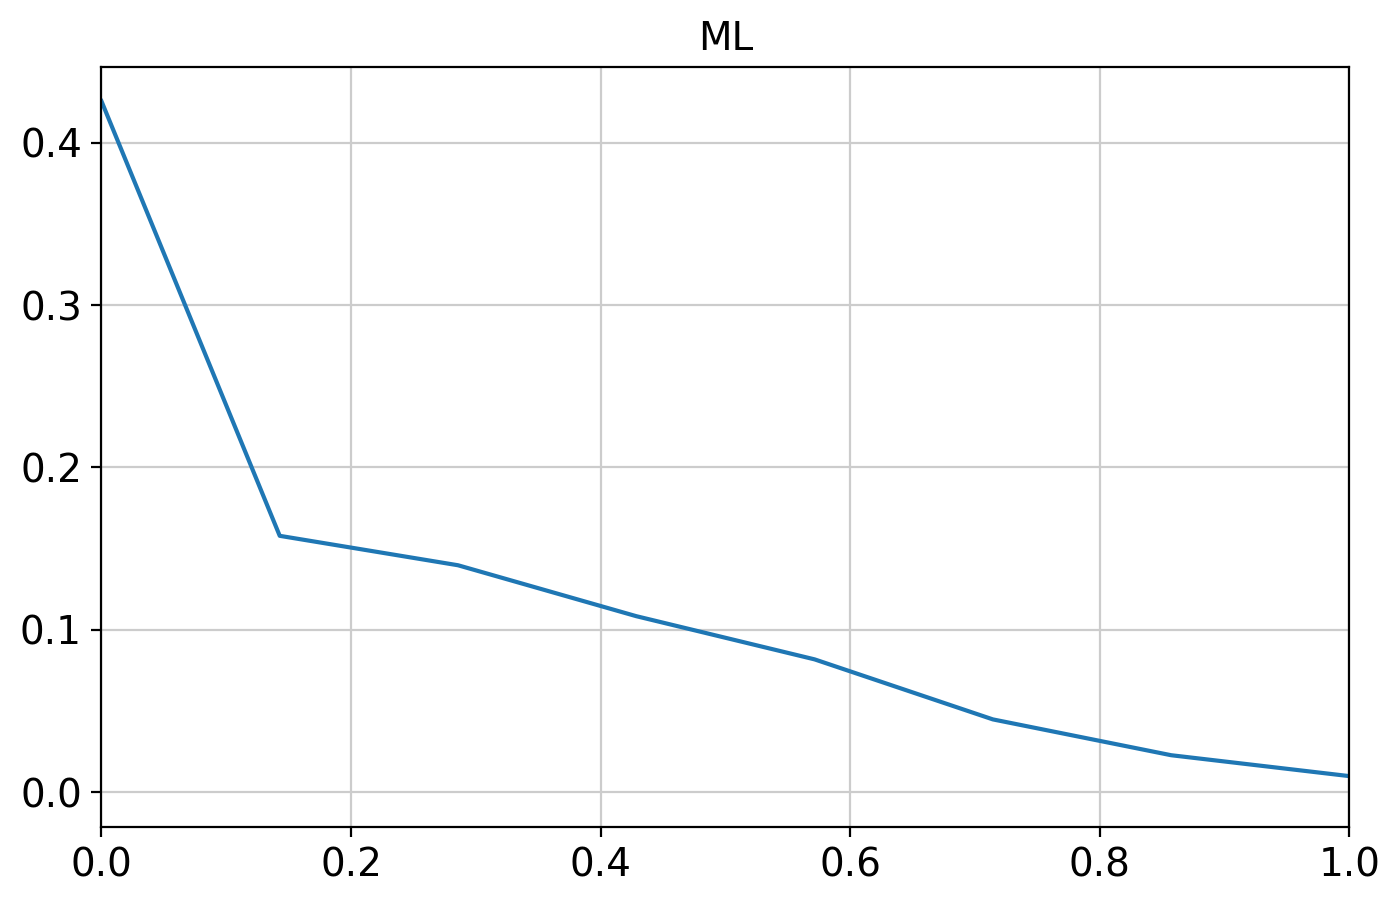

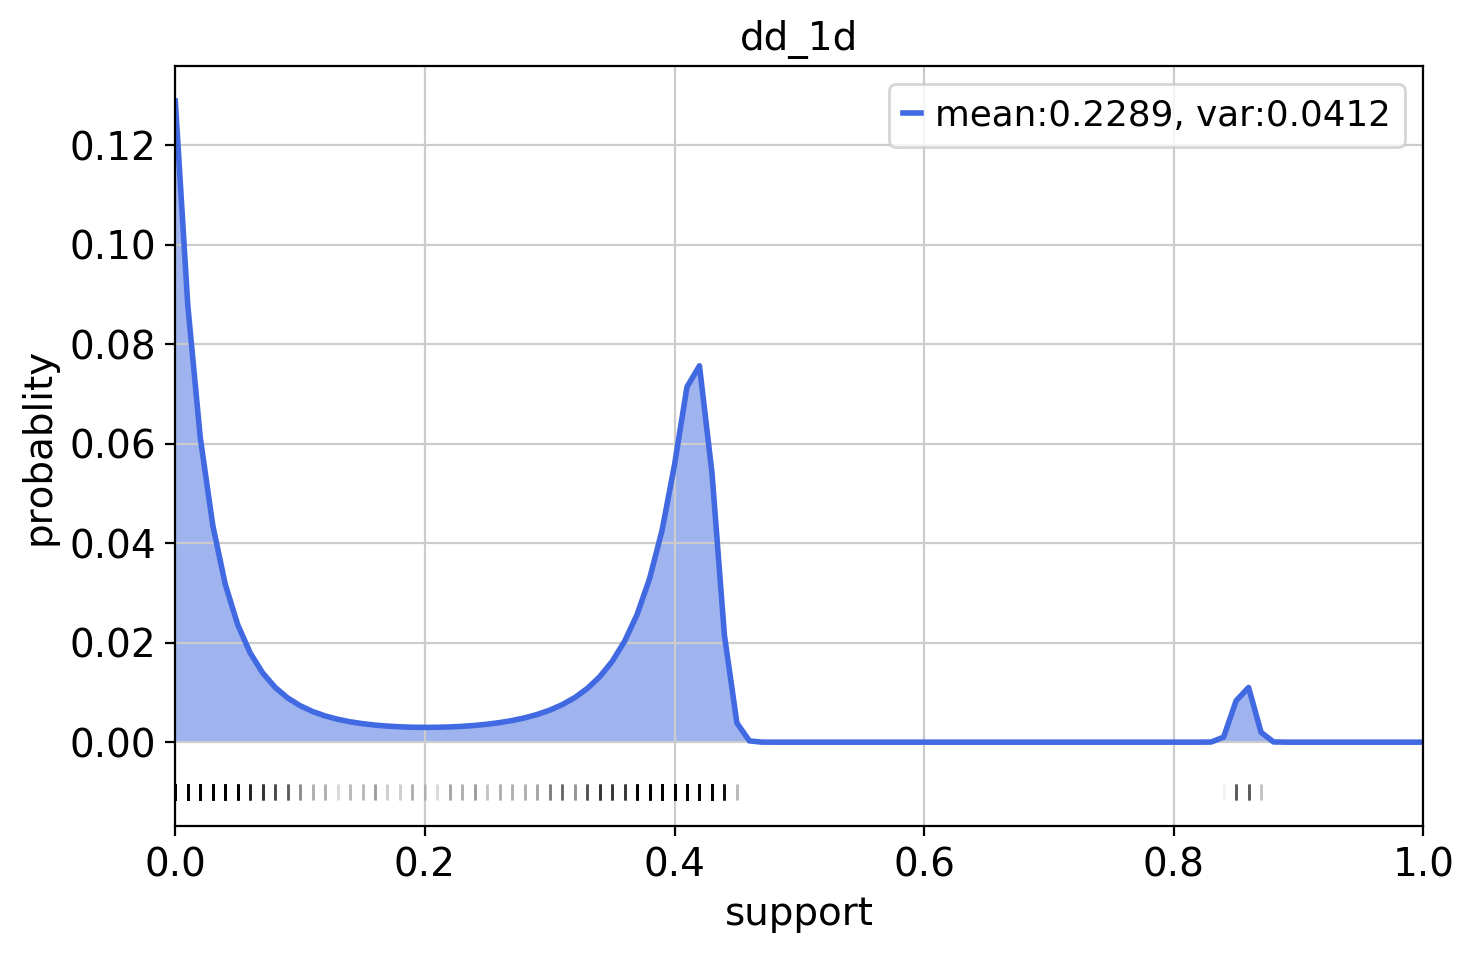

estimated Nr: 7.0
-------------------------------------------------------------------------
LYZ
Average counts per cell = 17.511156186612578


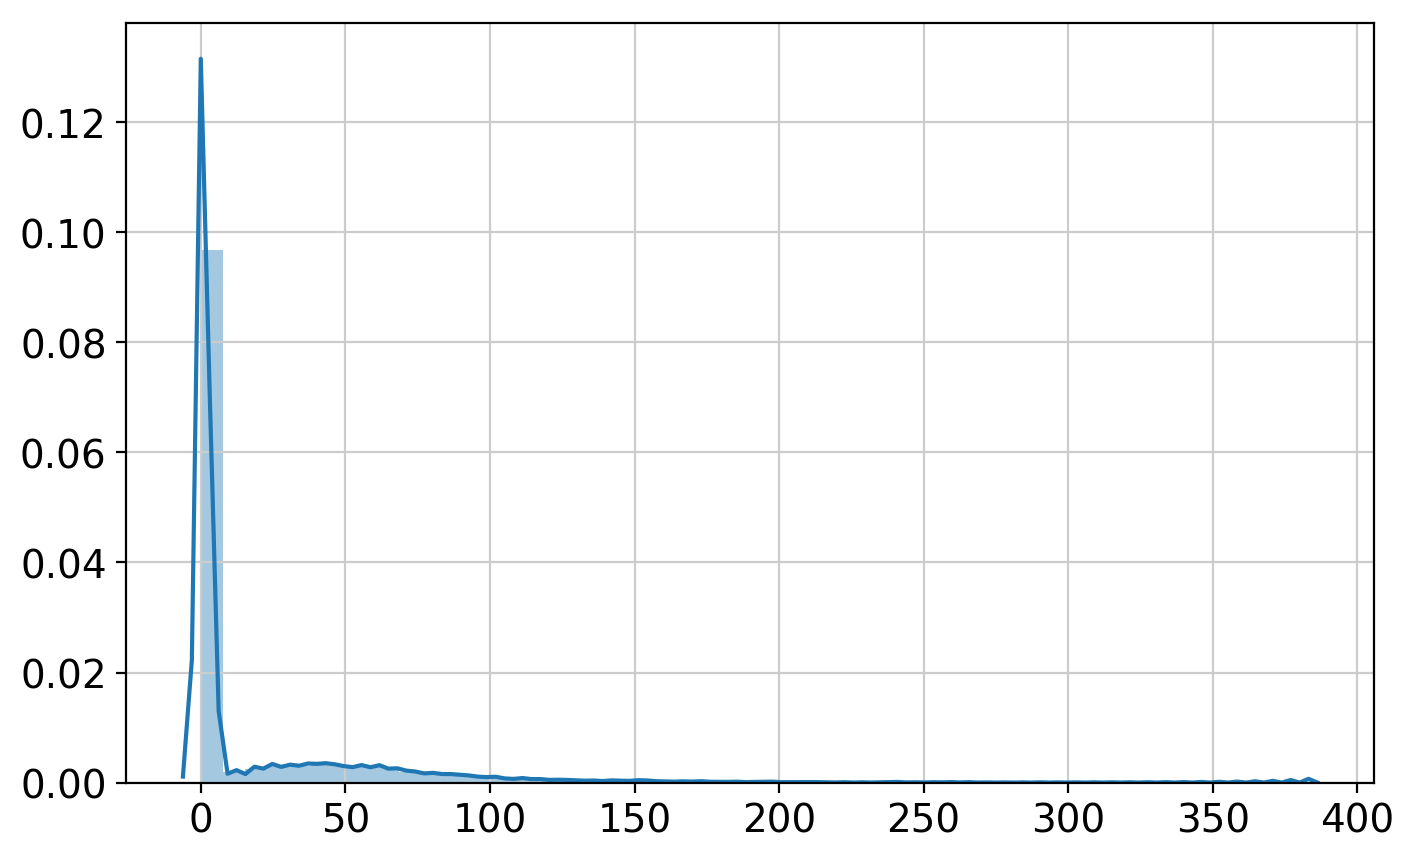

Nr:162.20000000000073
n_degree:7
[-0.19637644  1.30782263  1.6206621  -1.94534205  0.89217086 -0.3274787
 -2.77951251]


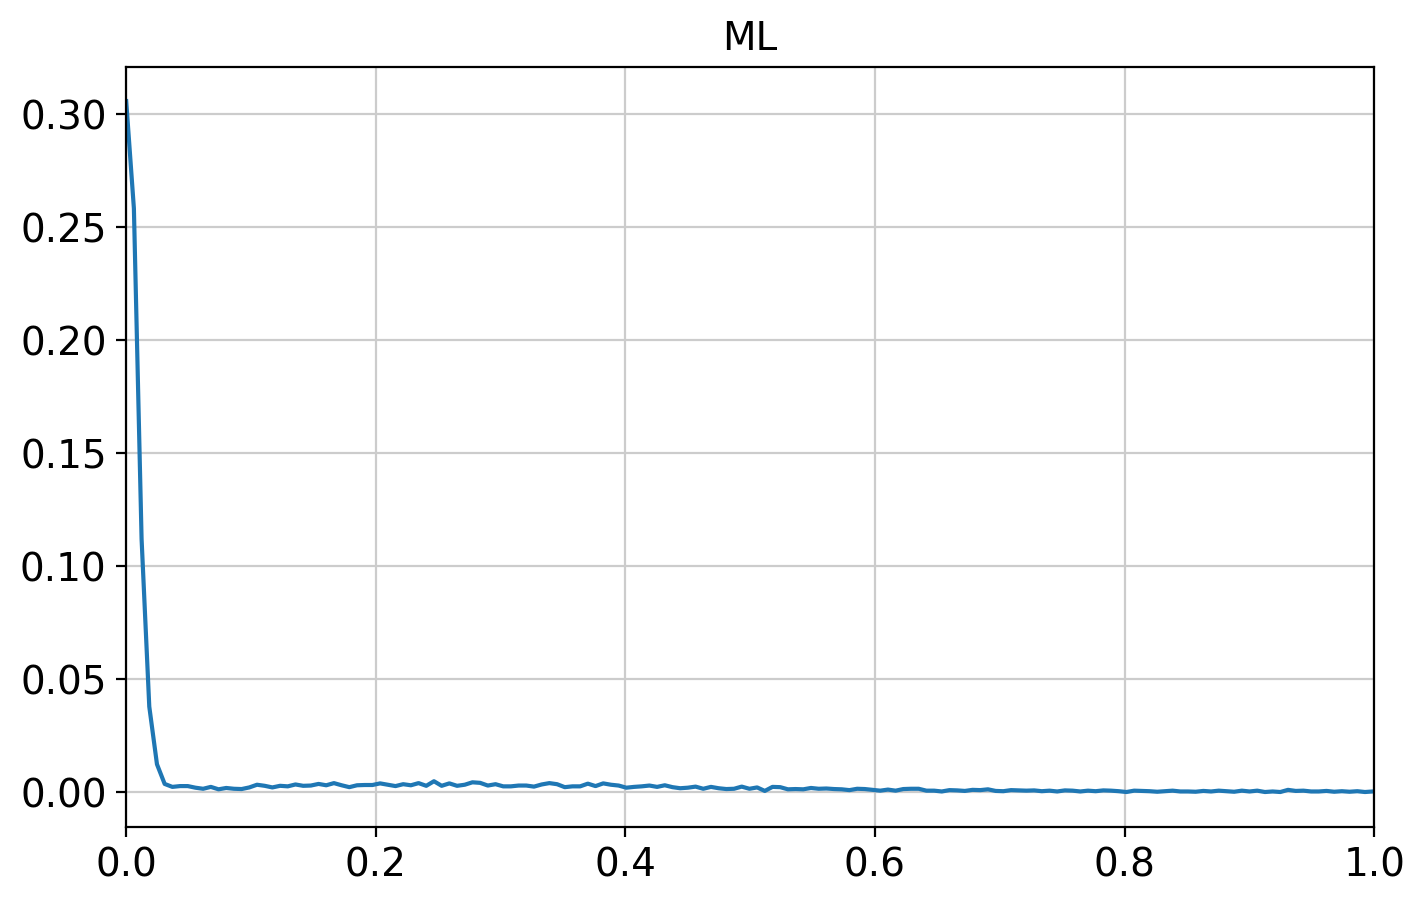

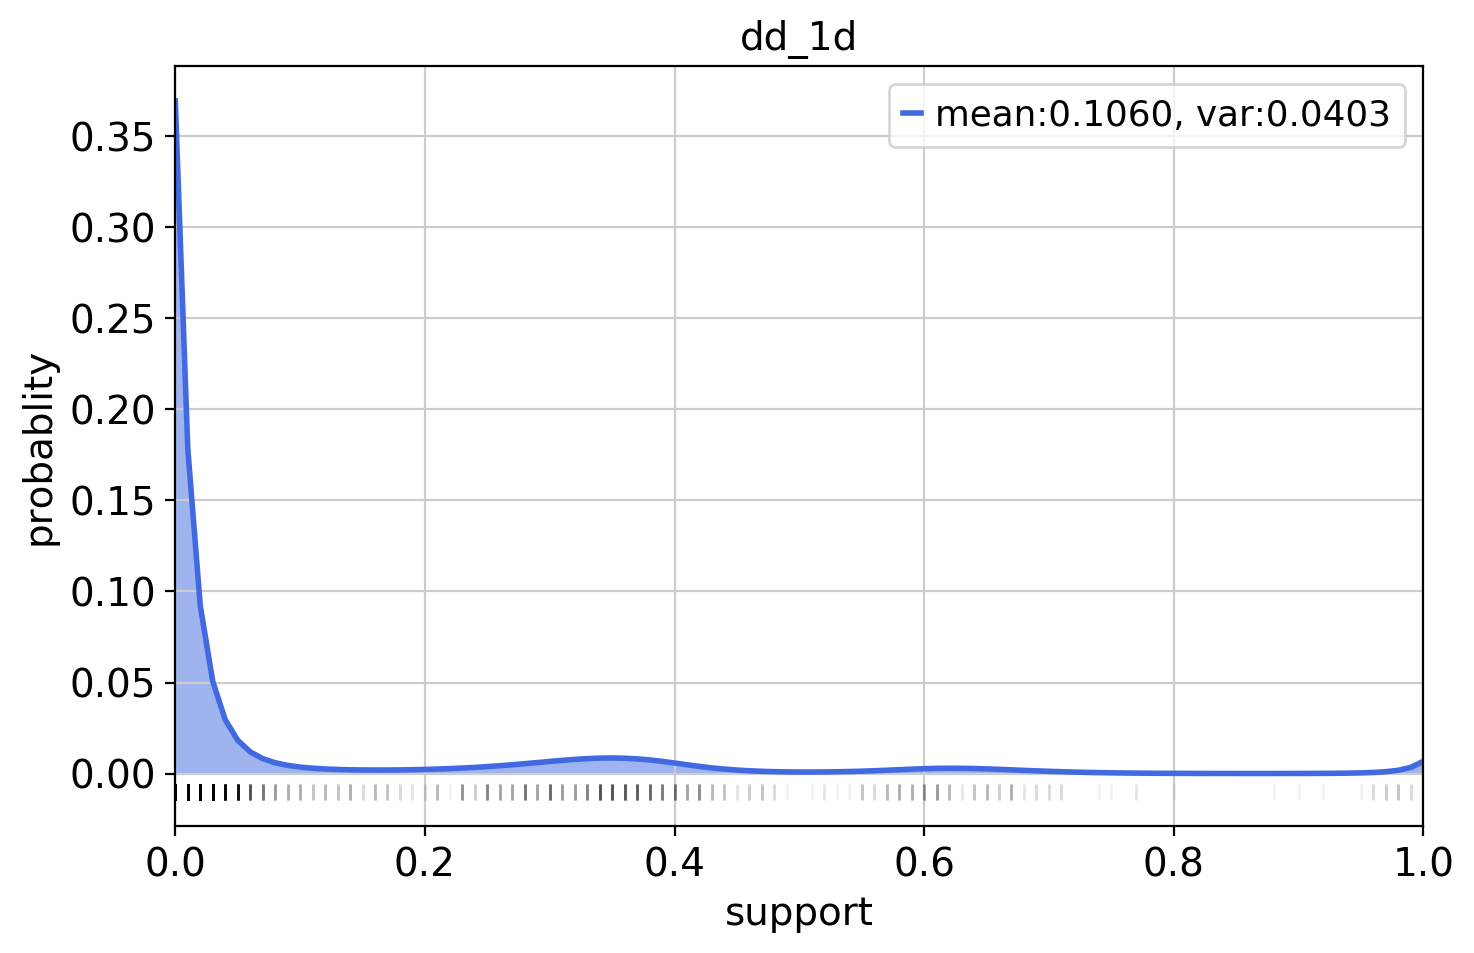

estimated Nr: 162.20000000000073
-------------------------------------------------------------------------
MS4A1
Average counts per cell = 0.65481446128147


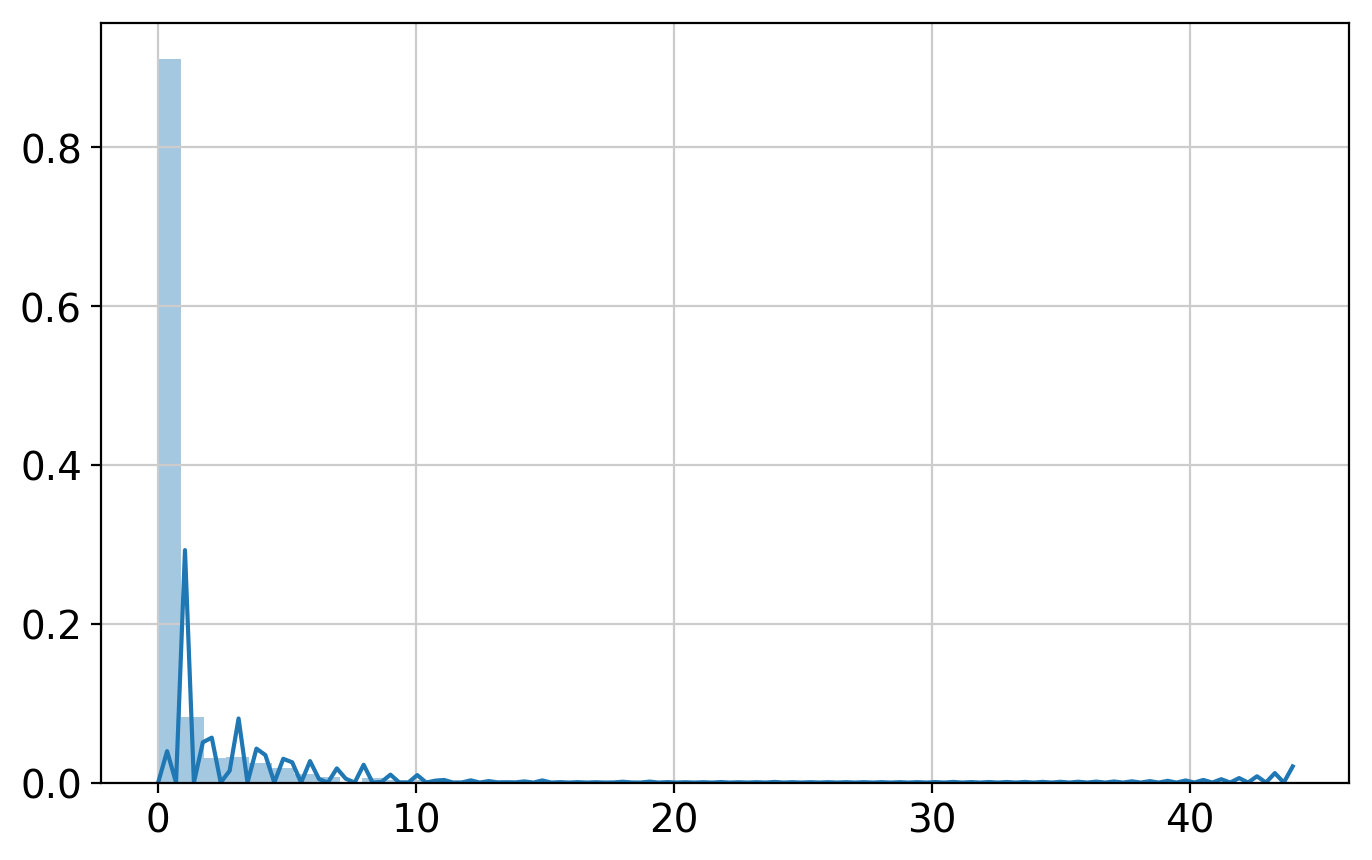

Nr:9.0
n_degree:7
[ 0.83895453  2.59870756  4.0323604   2.59137099 -2.16679417 -4.27952993
 -3.944795  ]


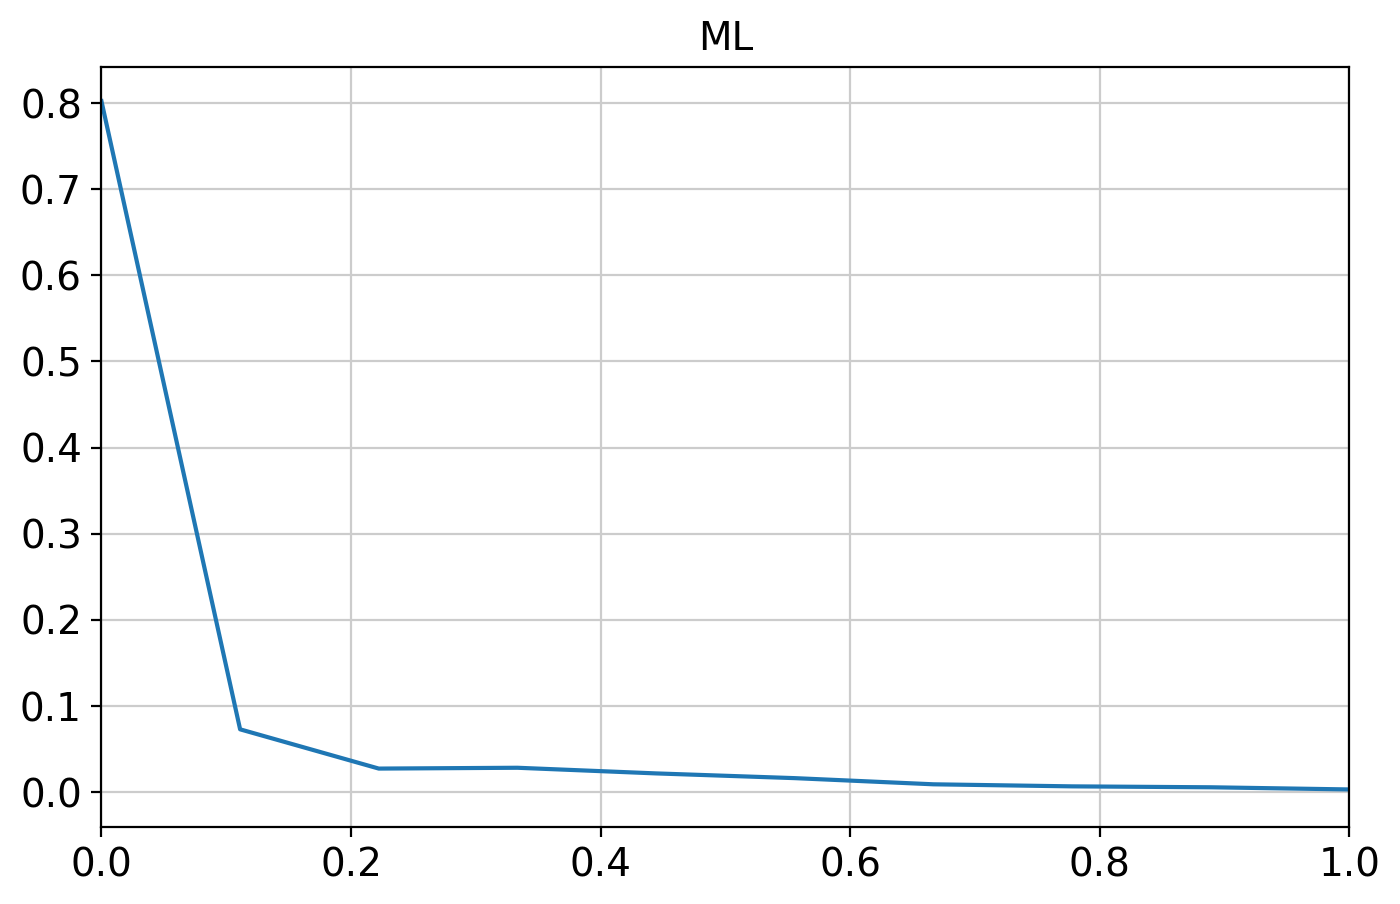

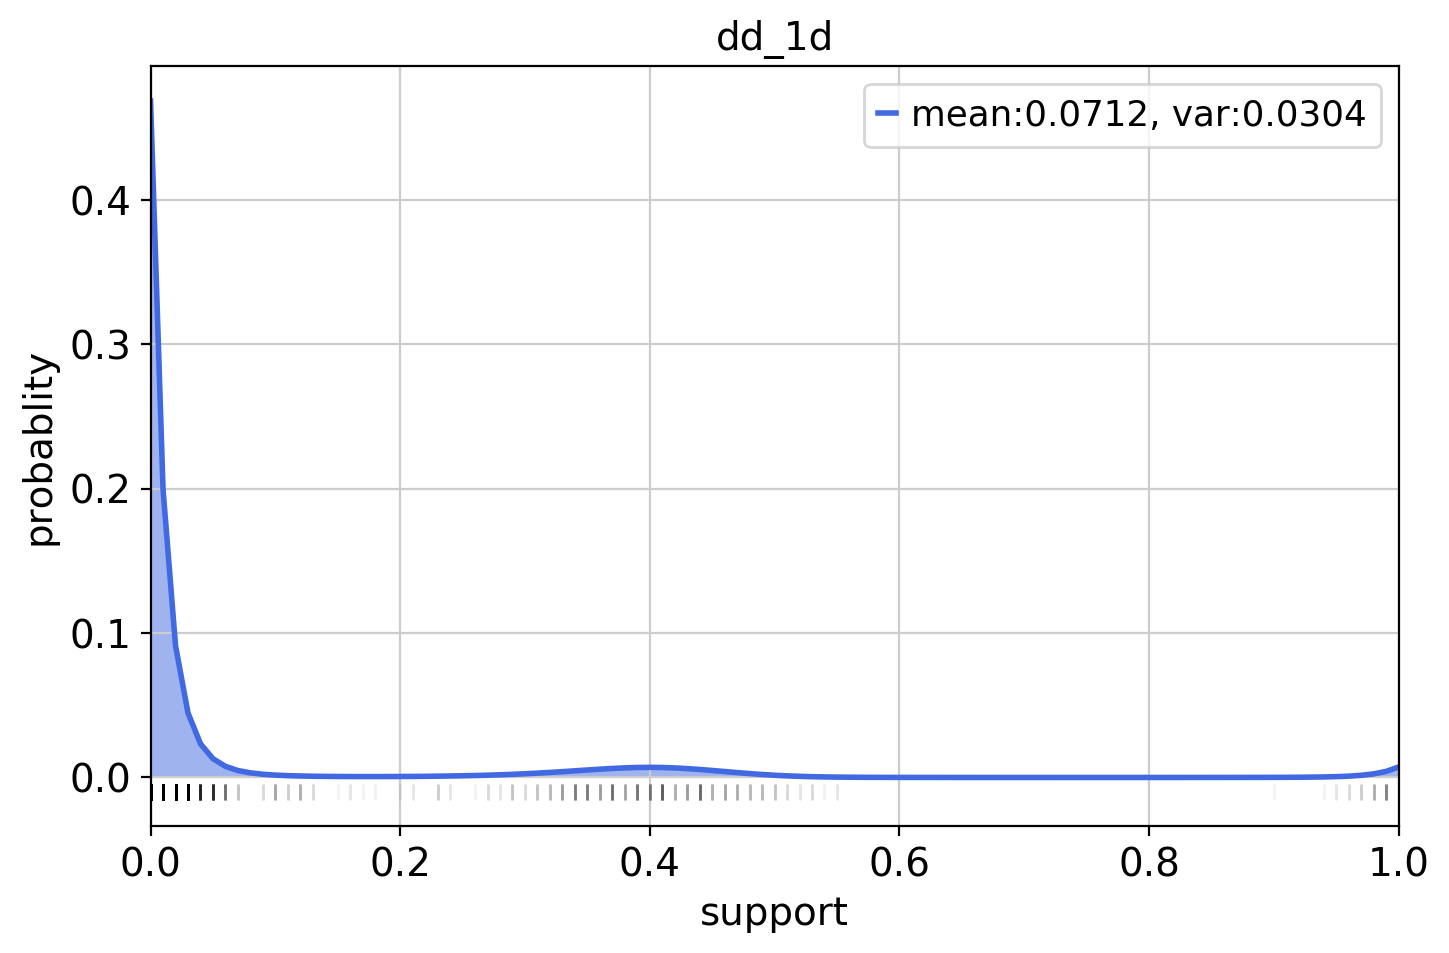

estimated Nr: 9.0
-------------------------------------------------------------------------
GNLY
Average counts per cell = 1.9725569741081017


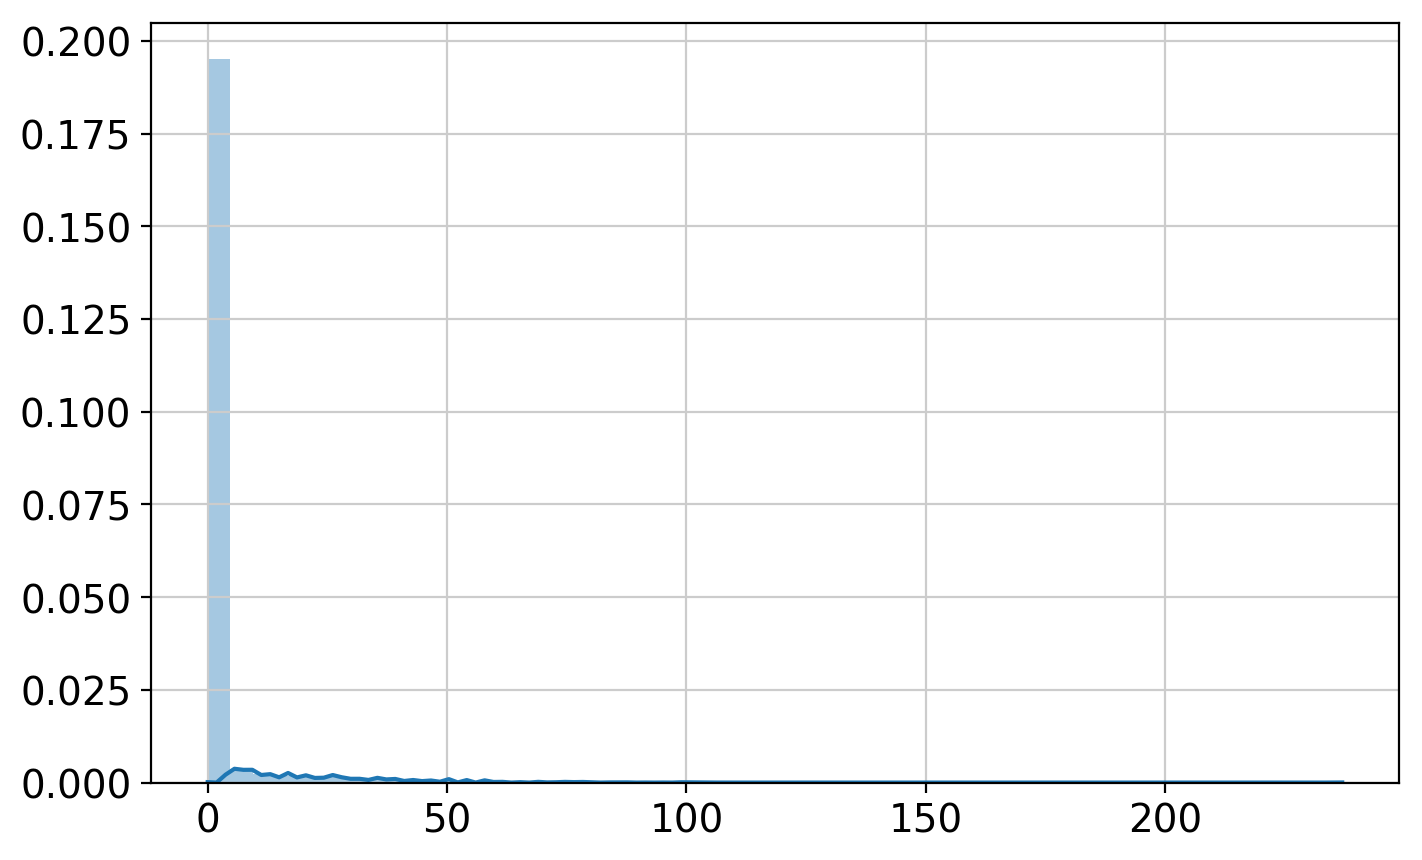

Nr:42.20000000000073
n_degree:7
[ -0.19166491   2.1040934    0.15279436 -11.62403728   3.36710986
   0.625238    -8.59845778]


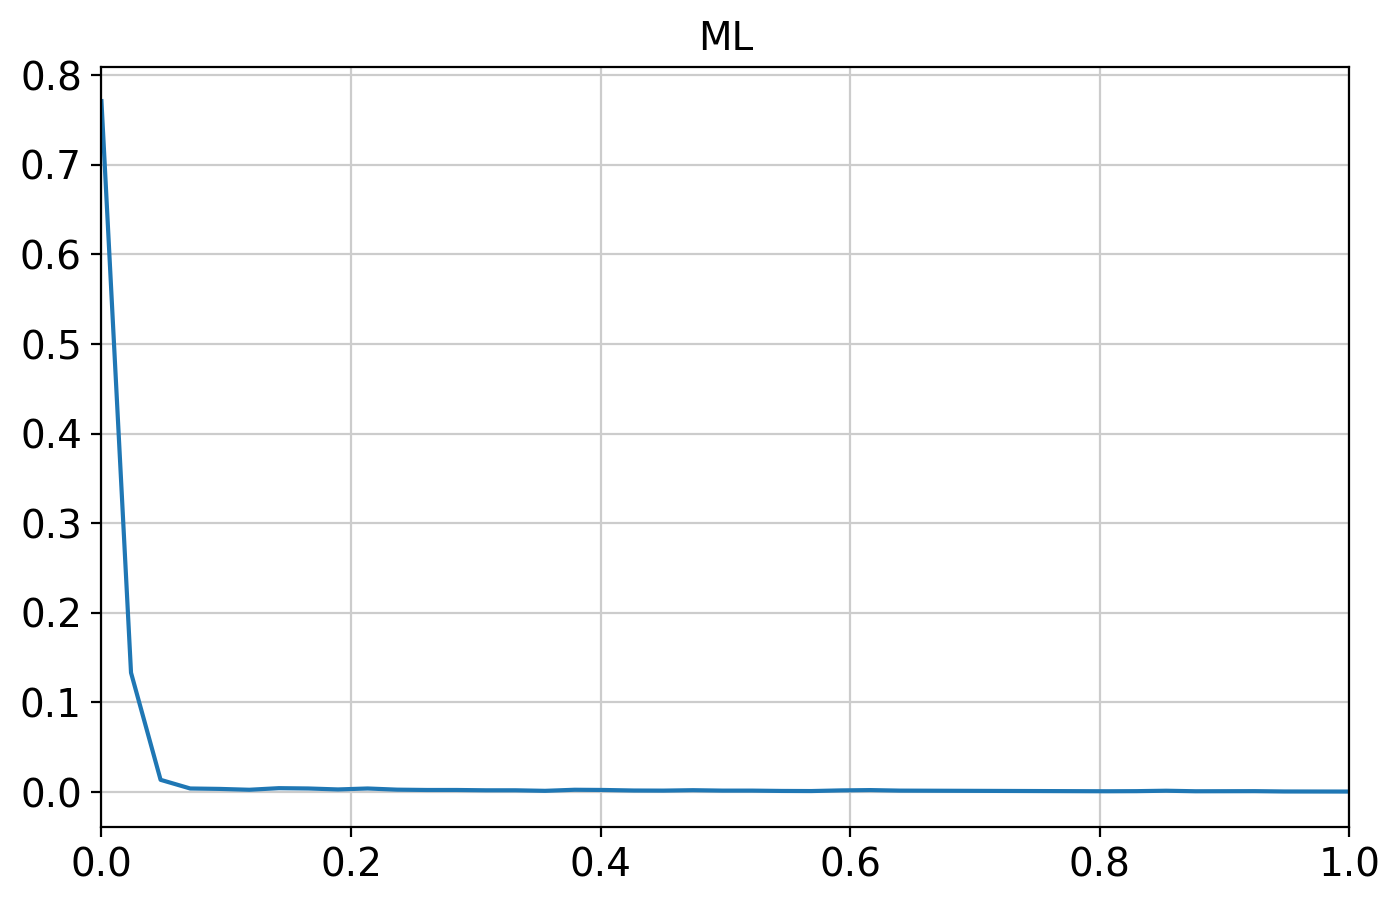

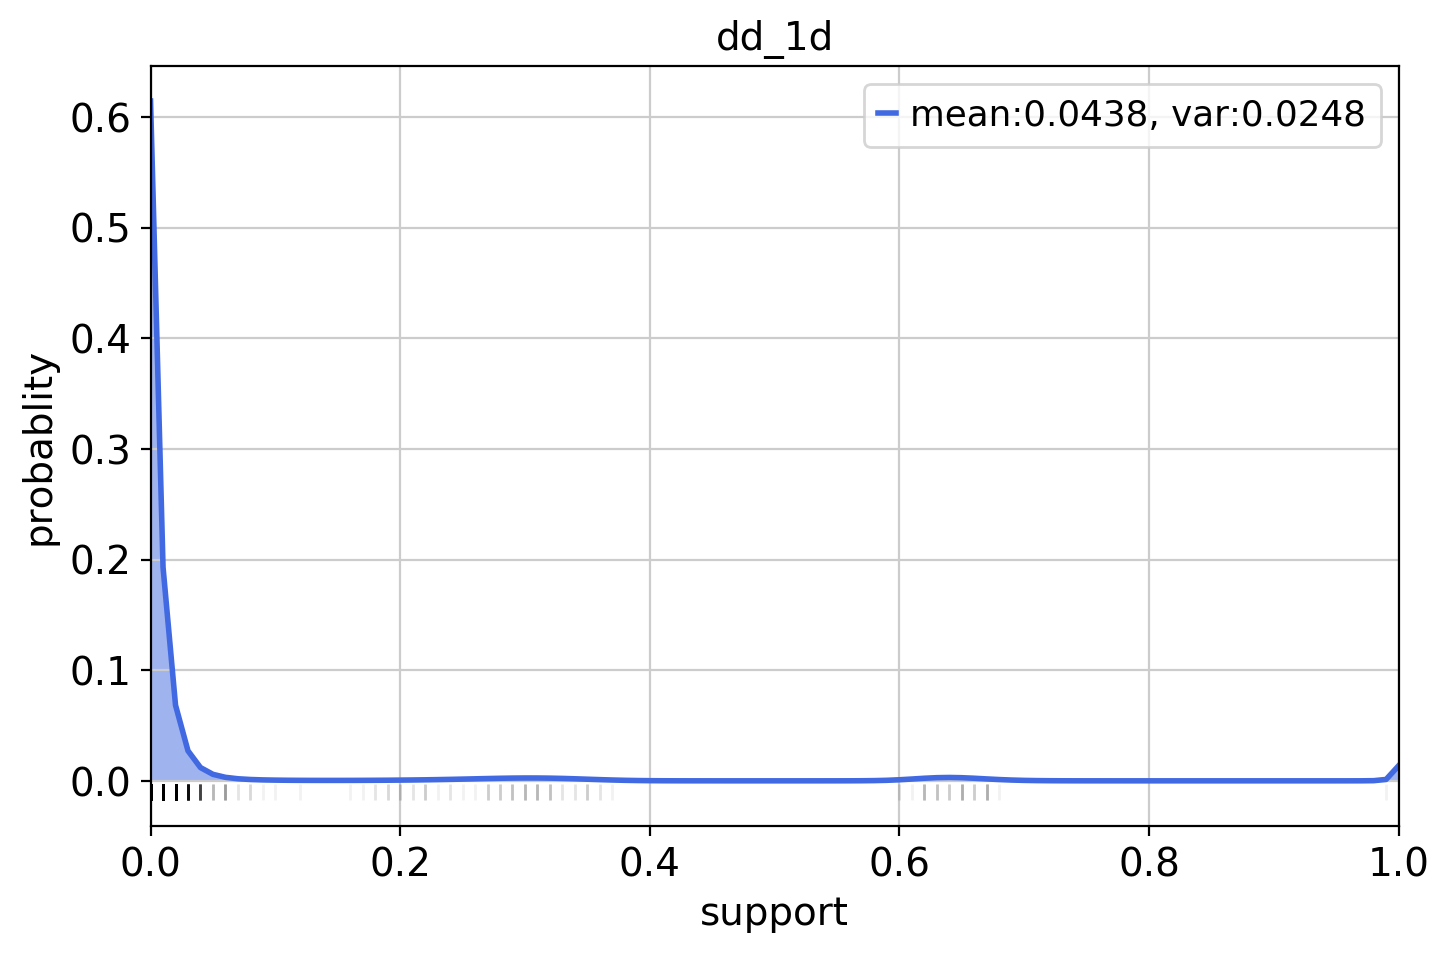

estimated Nr: 42.20000000000073
-------------------------------------------------------------------------
FGFBP2
Average counts per cell = 0.2930437895239232


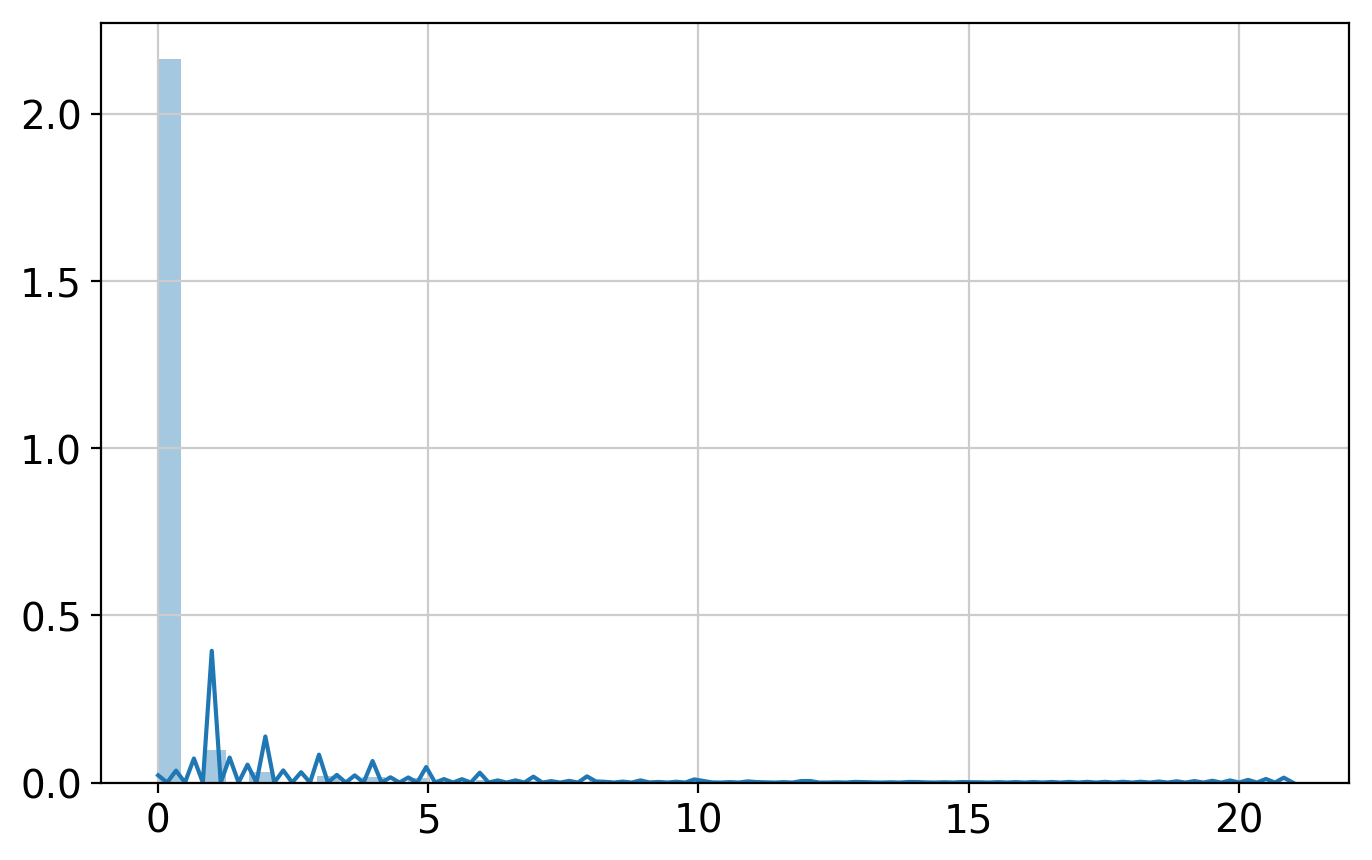

Nr:7.0
n_degree:7
[ 13.79336744  16.35614211  17.18171028  12.08470036  -9.46683025
 -22.94956002 -25.33858992]


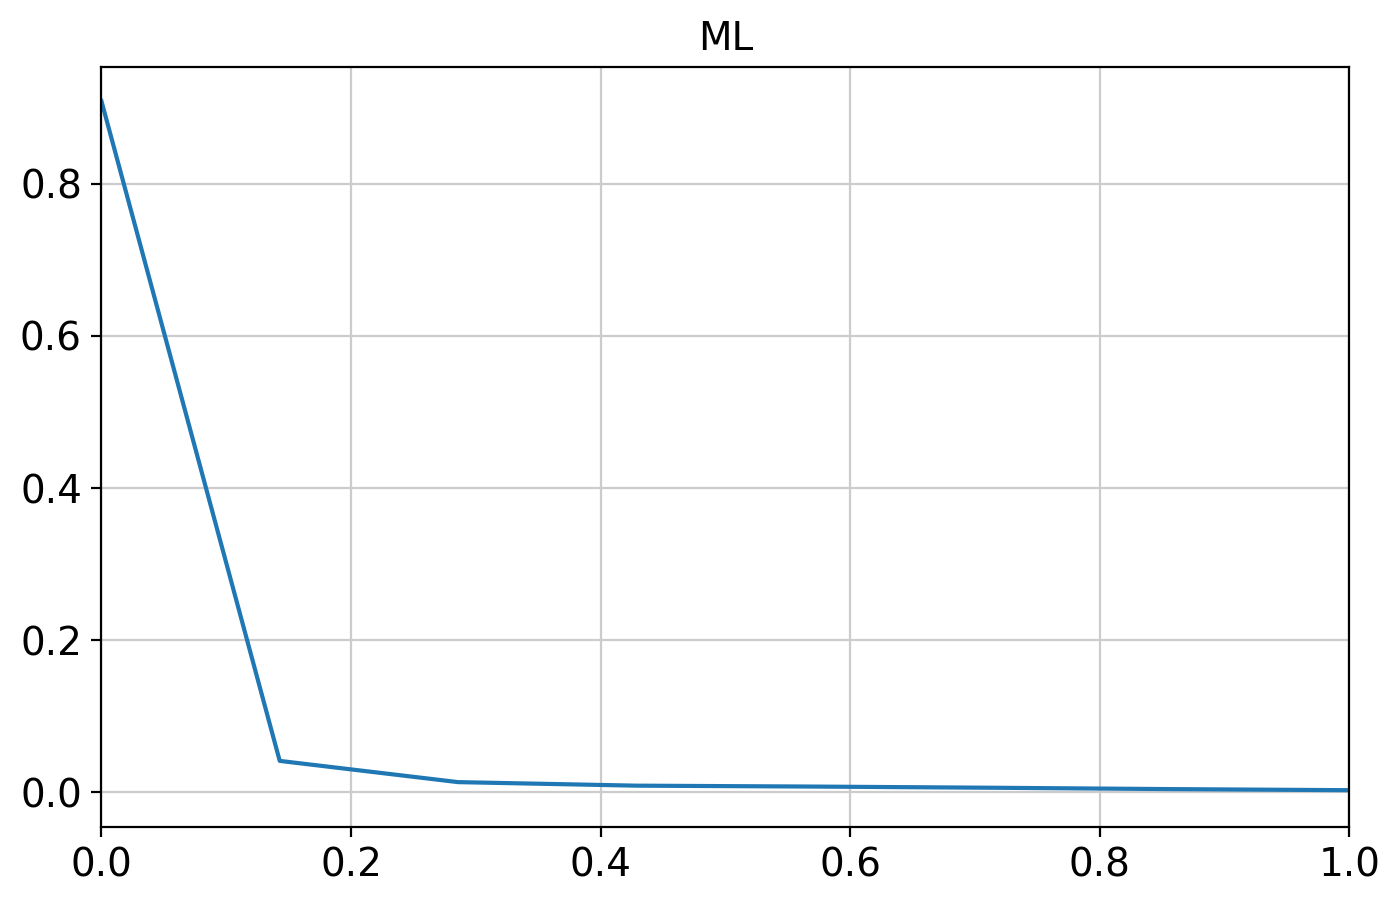

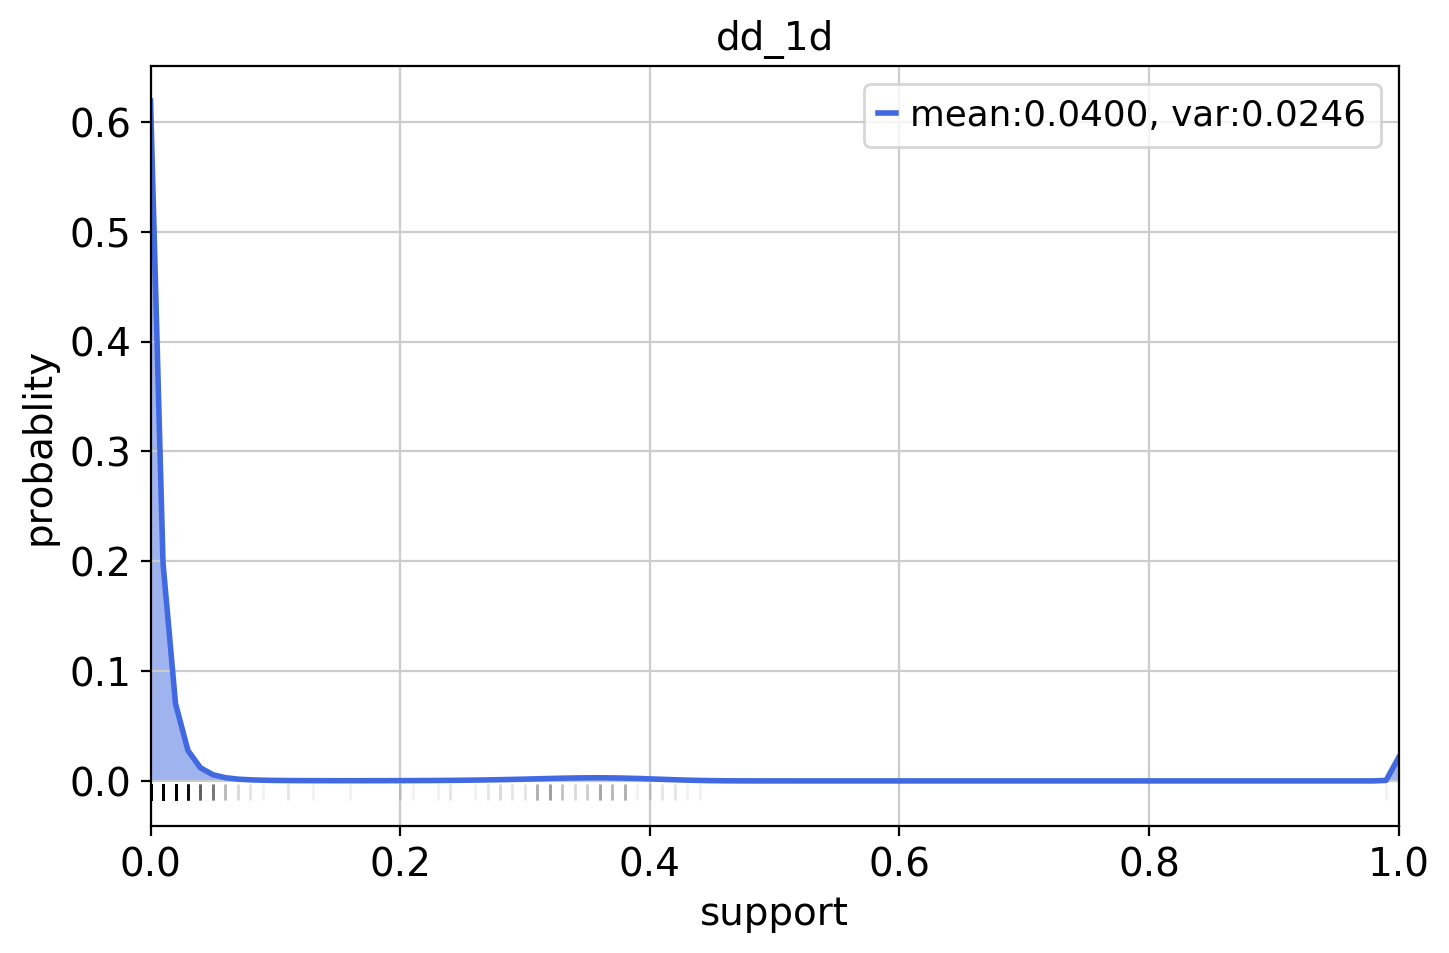

estimated Nr: 7.0
-------------------------------------------------------------------------
FCER1G
Average counts per cell = 2.8796086385872806


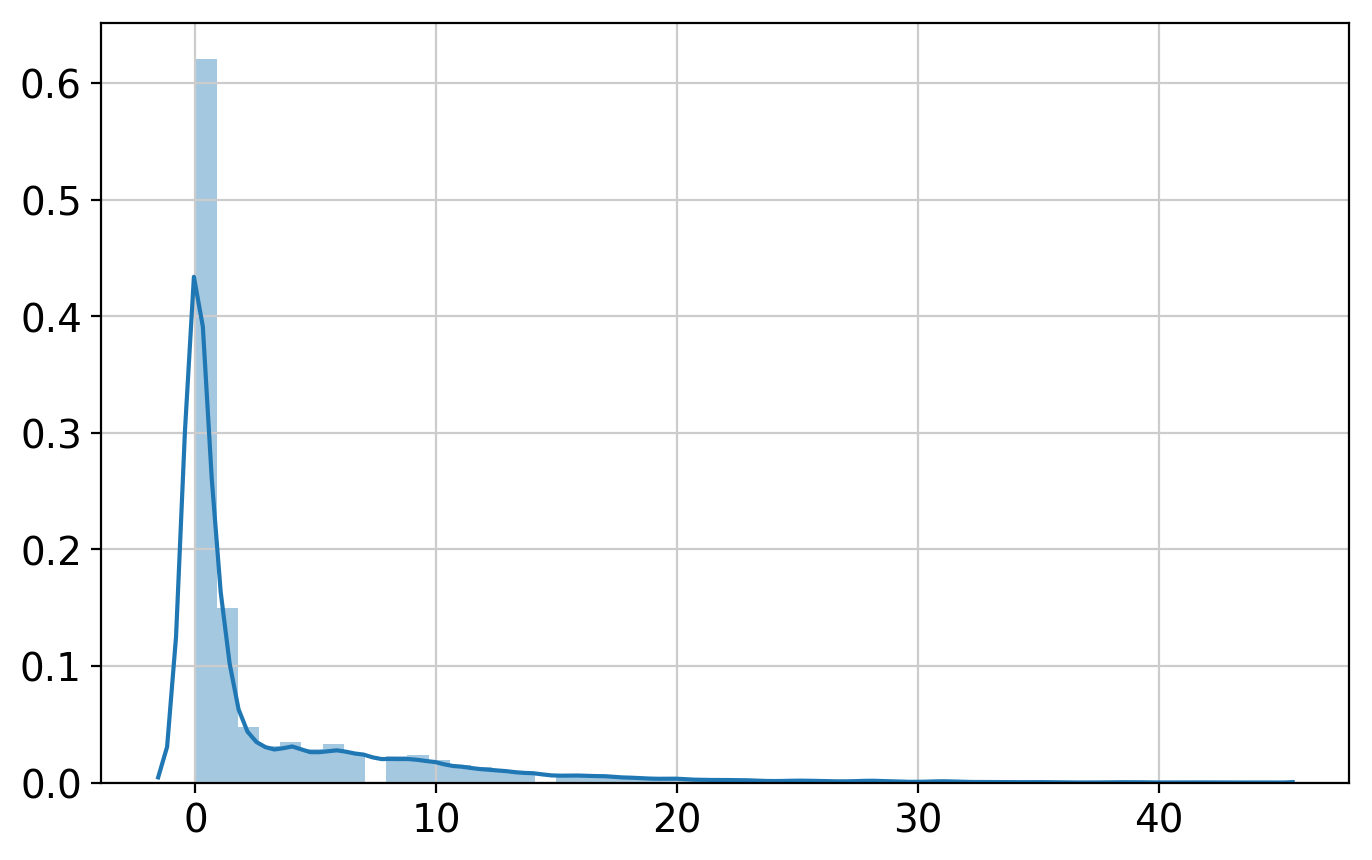

Nr:25.0
n_degree:7
[  6.0030059    7.23827248   6.33317498   0.28295081  10.93308769
  -4.85691248 -26.20442982]


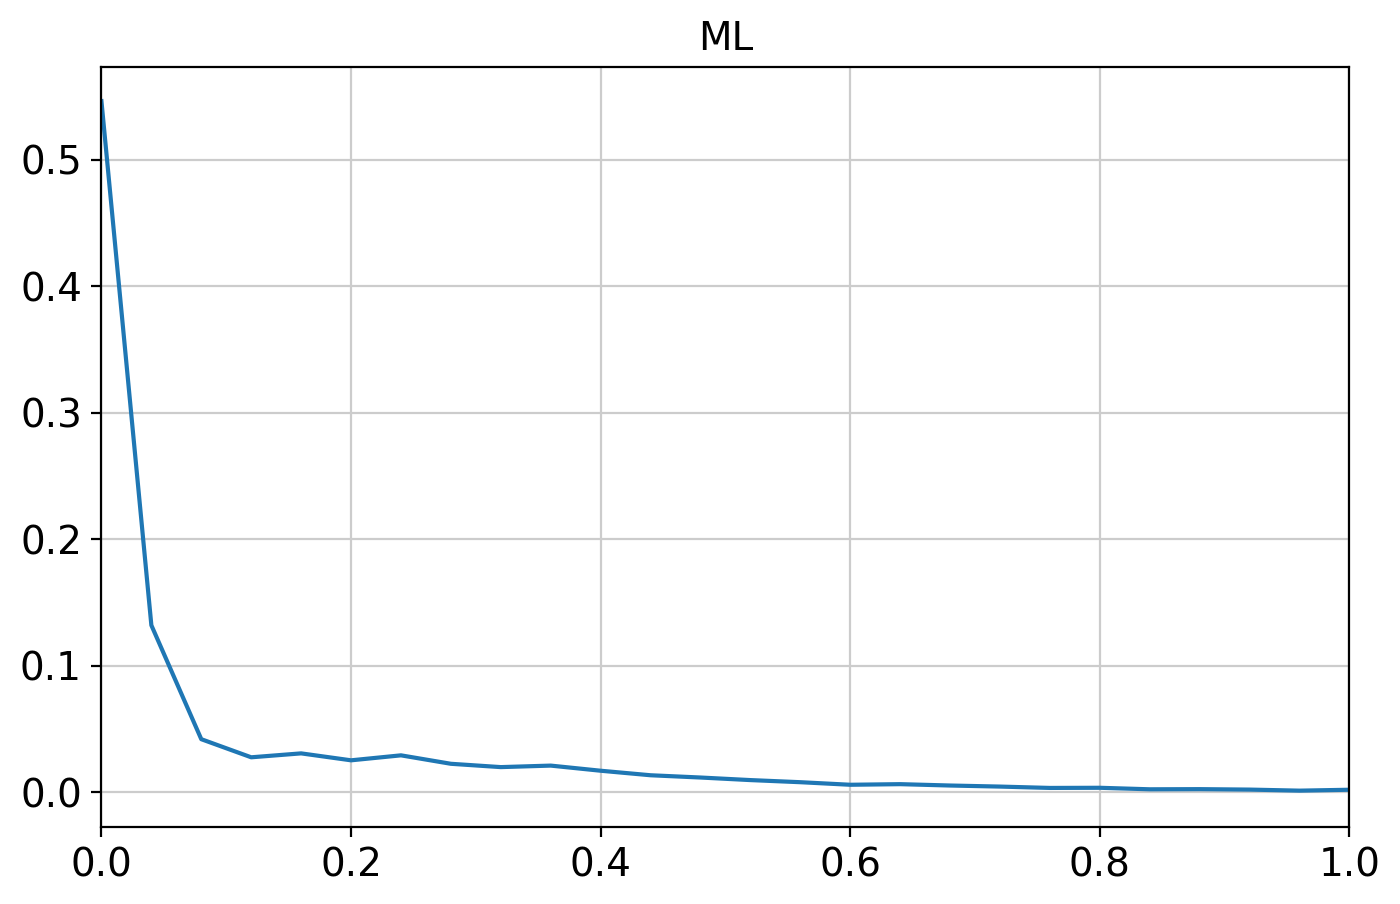

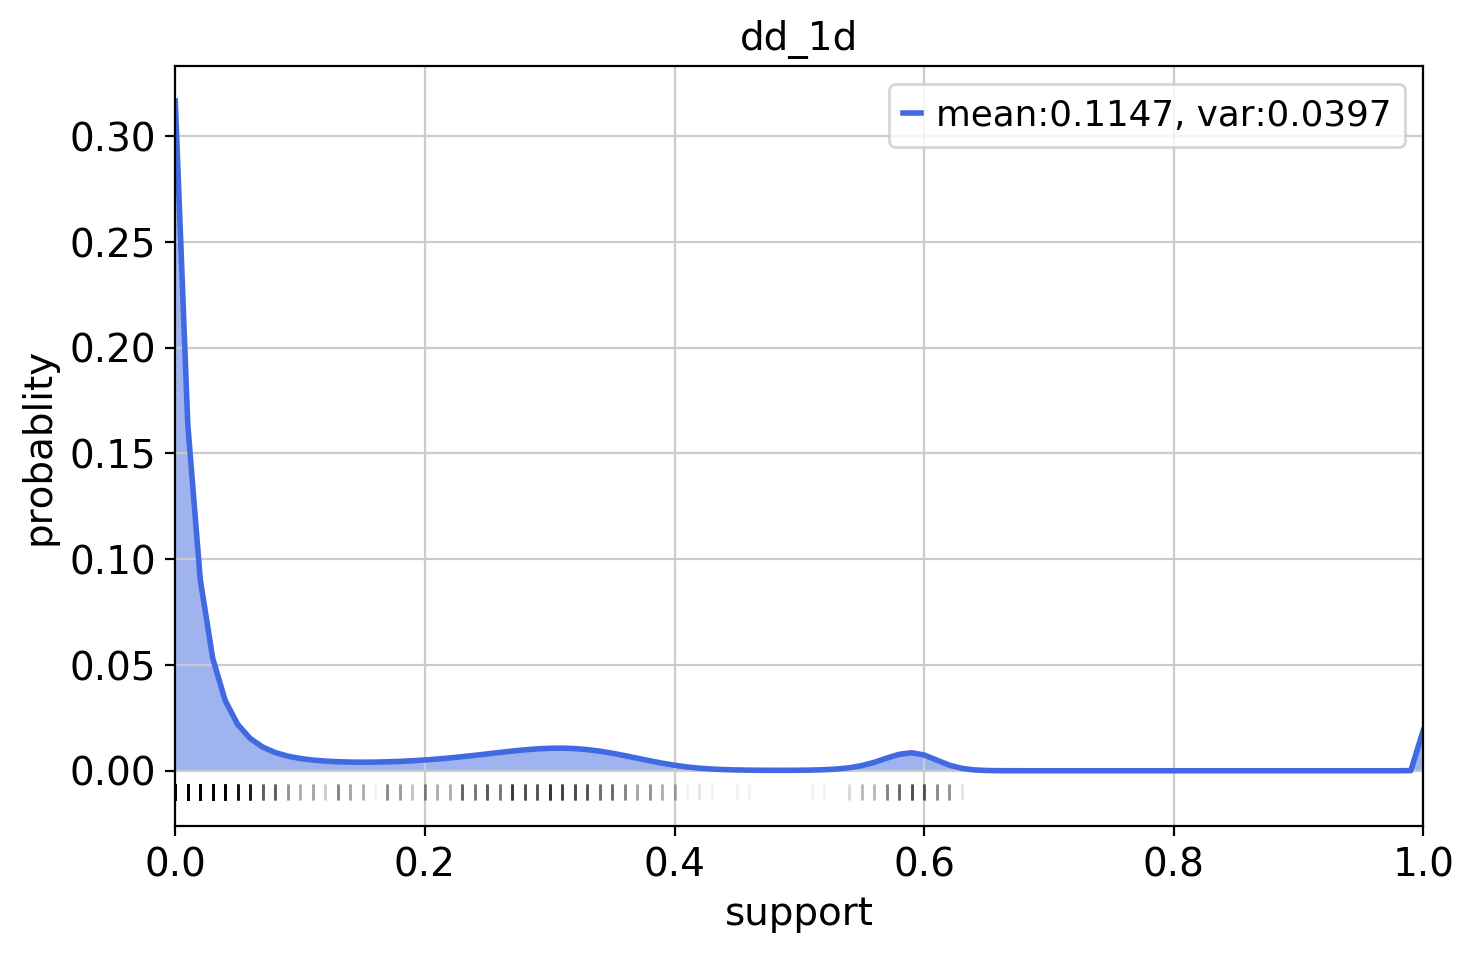

estimated Nr: 25.0
-------------------------------------------------------------------------
LDHB
Average counts per cell = 2.5530366304736907


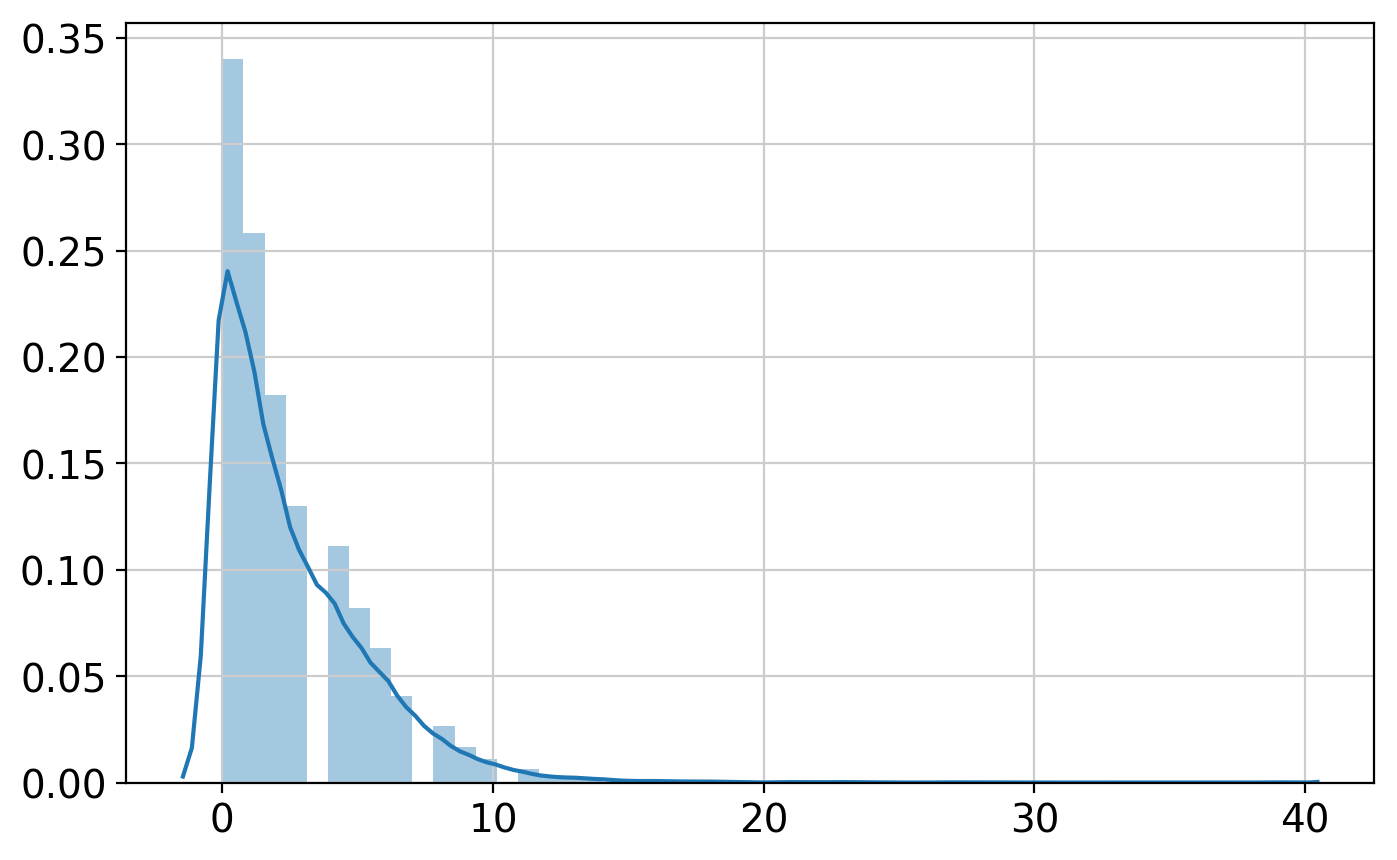

Nr:12.0
n_degree:7
[ 3.6677144   2.88893818  3.09502973  5.173058   -3.75553609 -7.43891719
 -6.90372233]


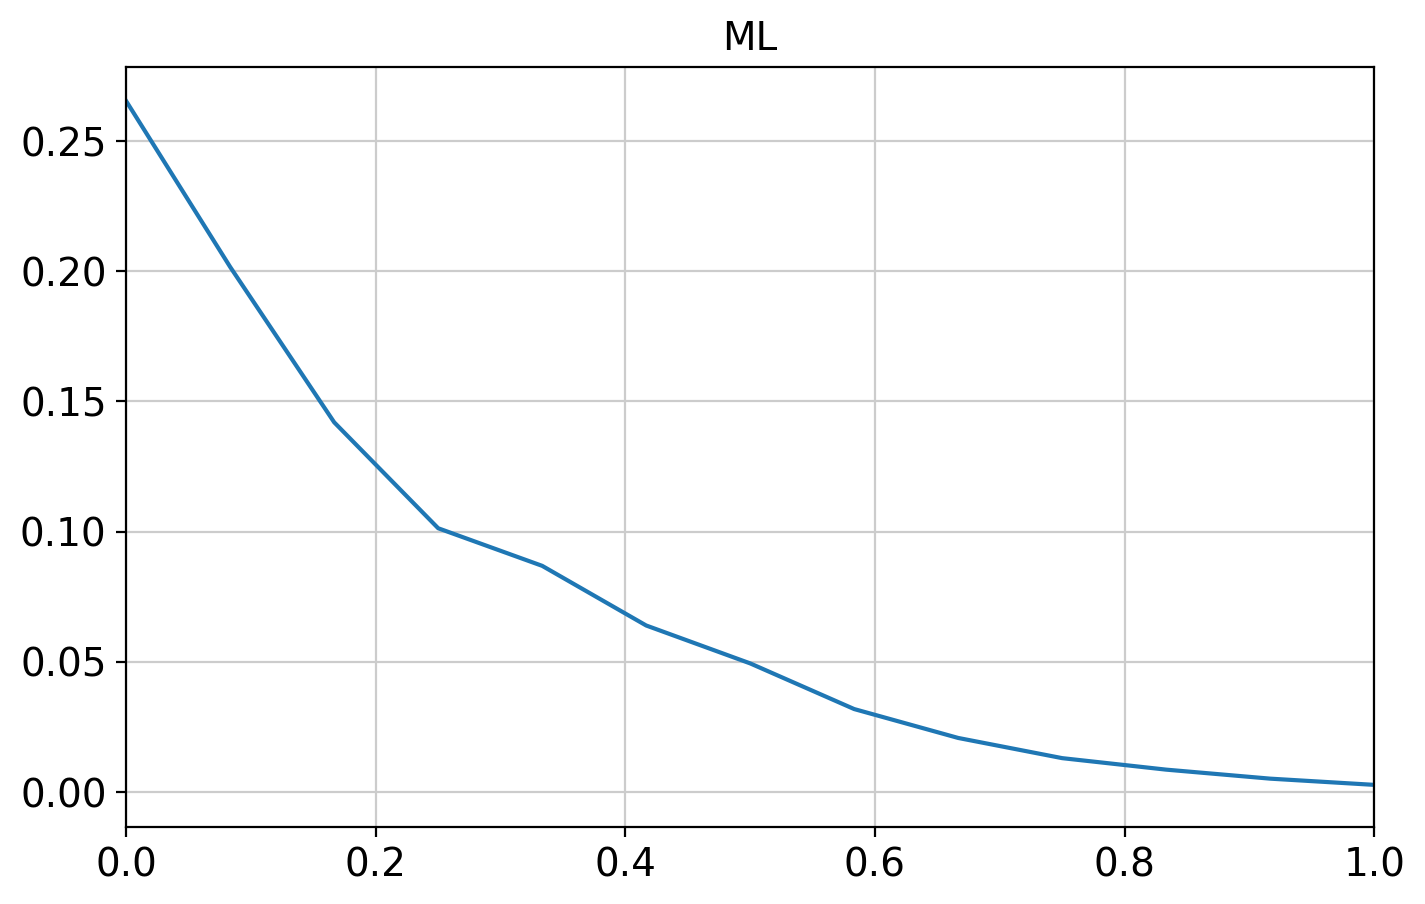

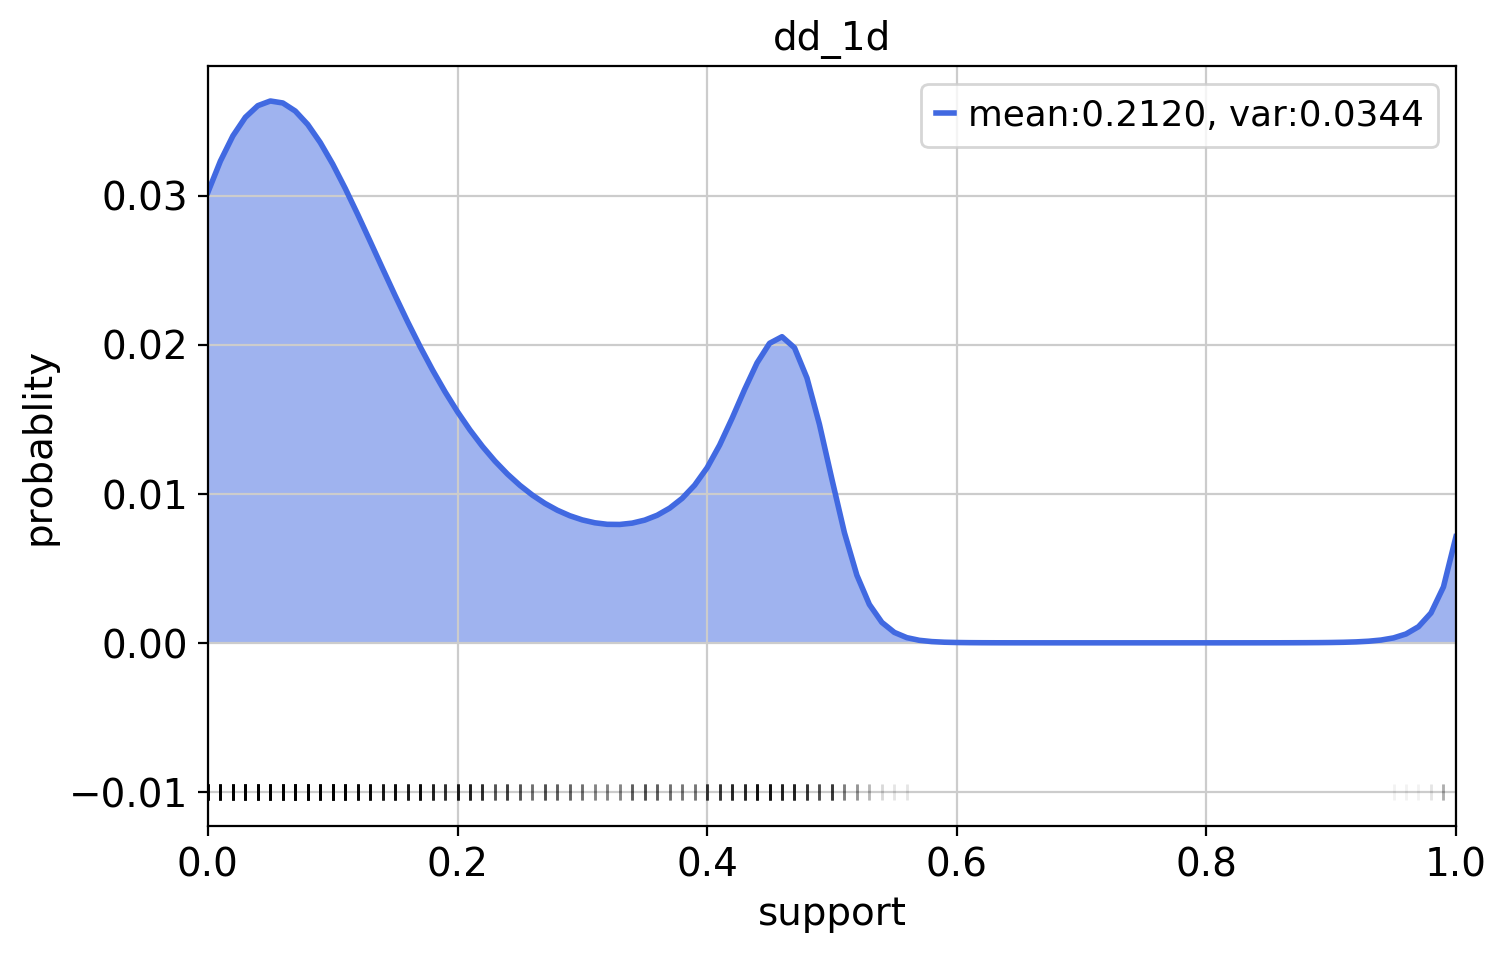

estimated Nr: 12.0
-------------------------------------------------------------------------
IL7R
Average counts per cell = 1.2459133754921847


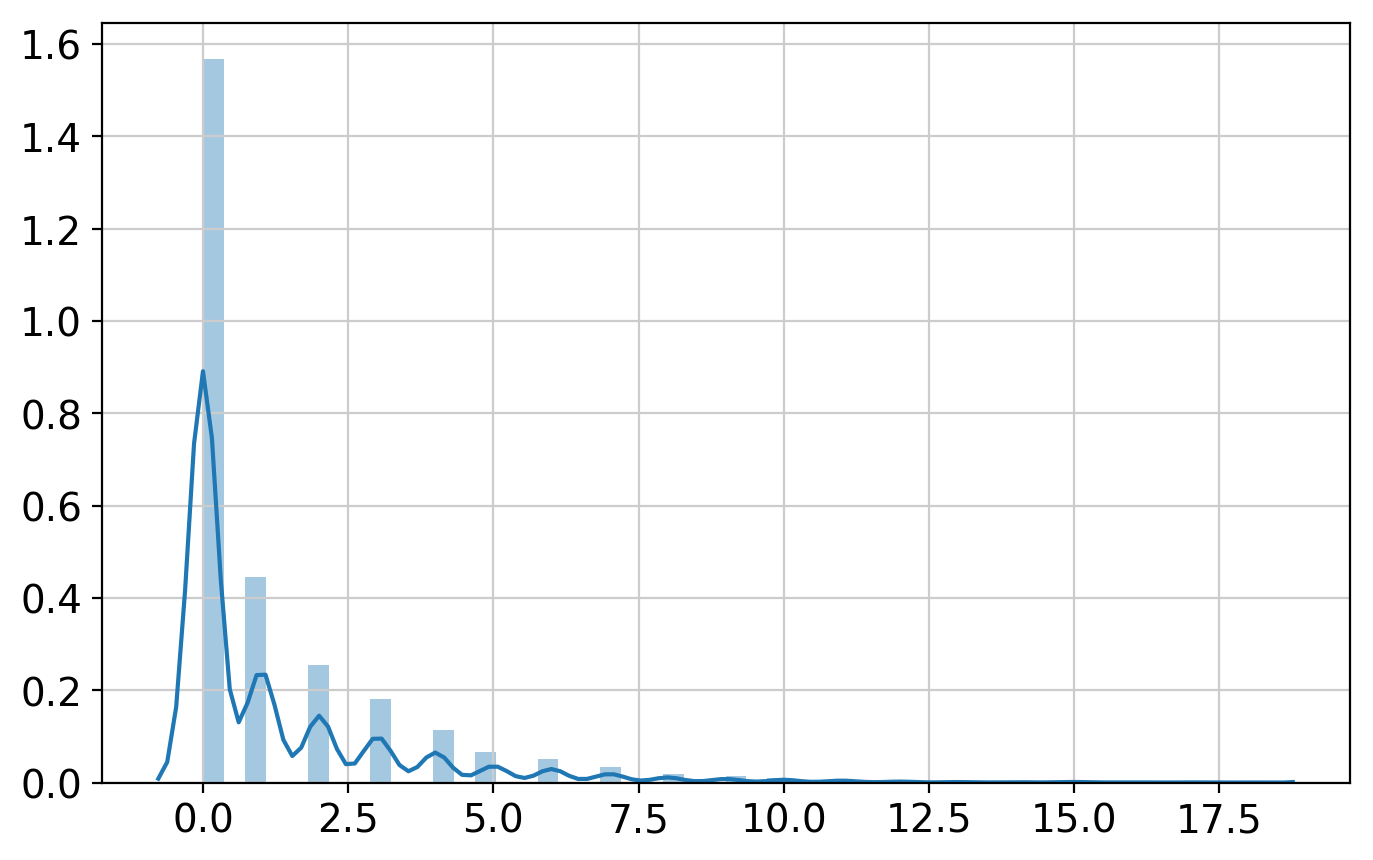

Nr:10.0
n_degree:7
[  4.03389978   4.48373801   2.41753492  -4.77566448   6.42729908
  -0.32003884 -12.34830866]


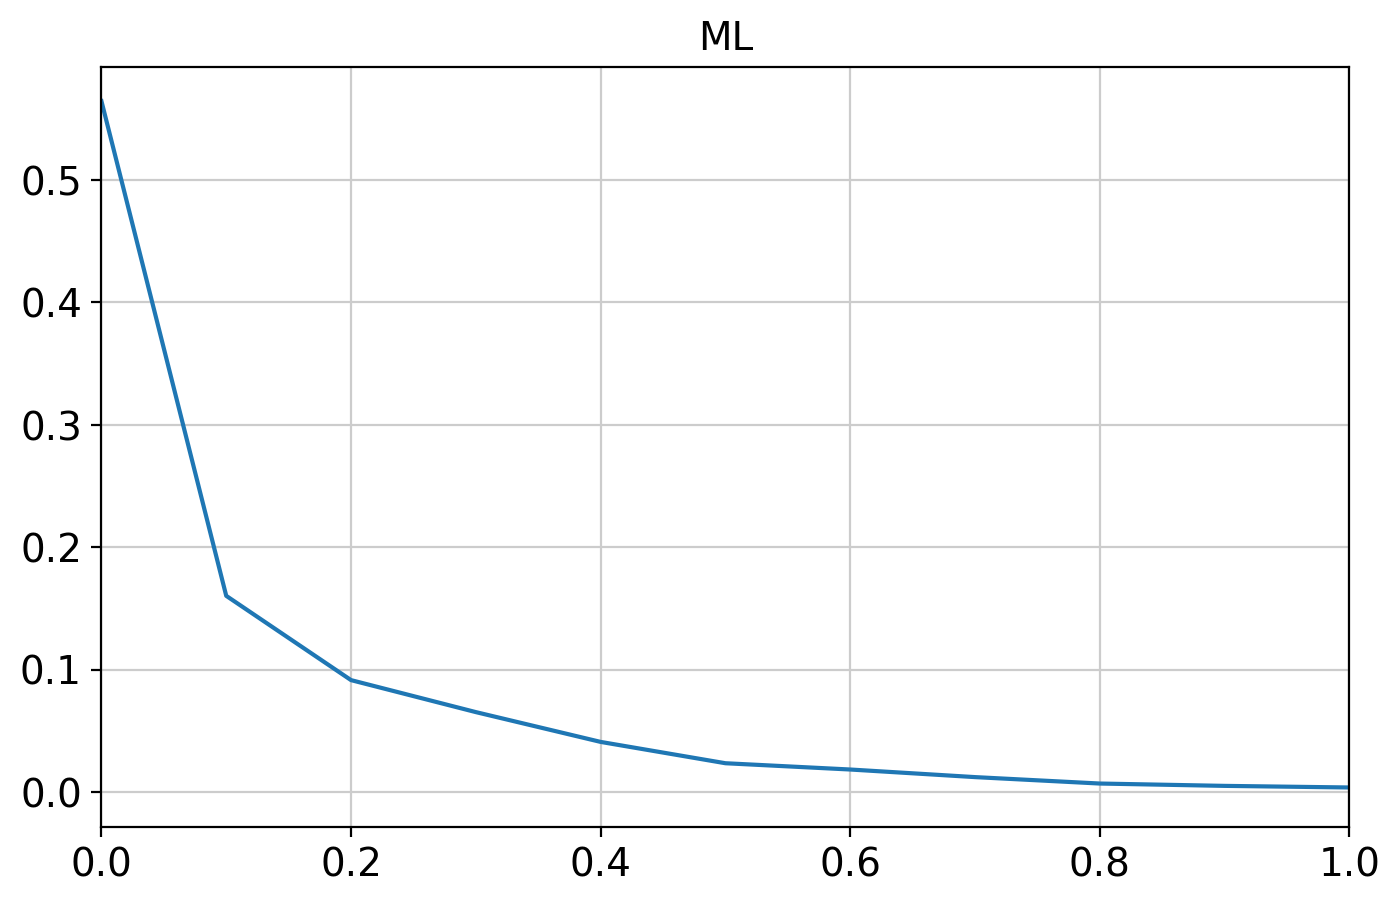

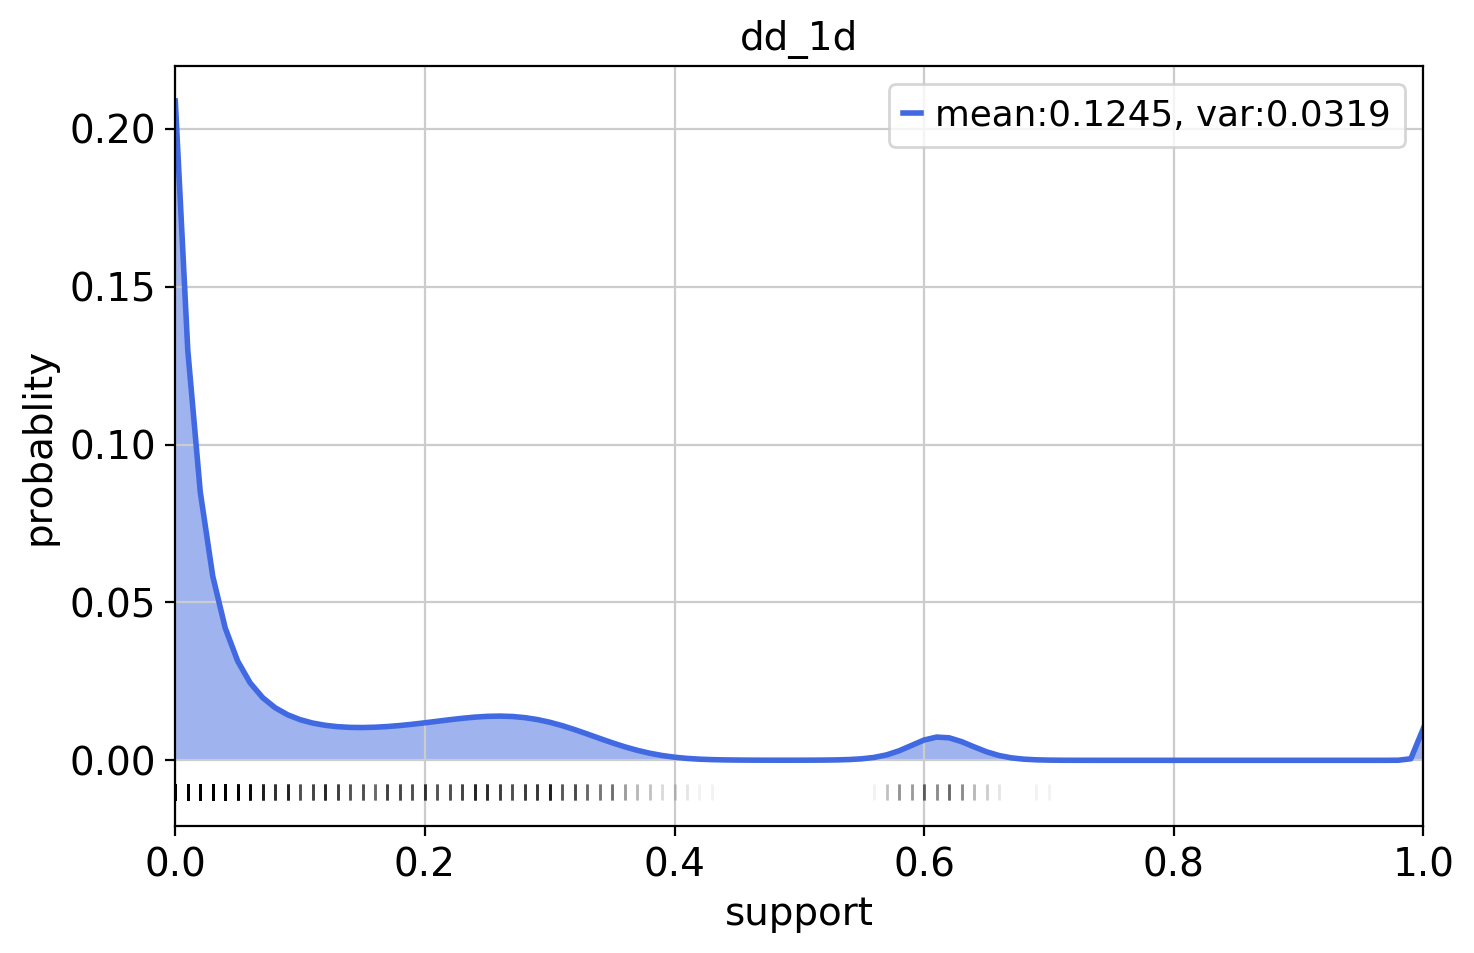

estimated Nr: 10.0
-------------------------------------------------------------------------
LST1
Average counts per cell = 2.914568667223482


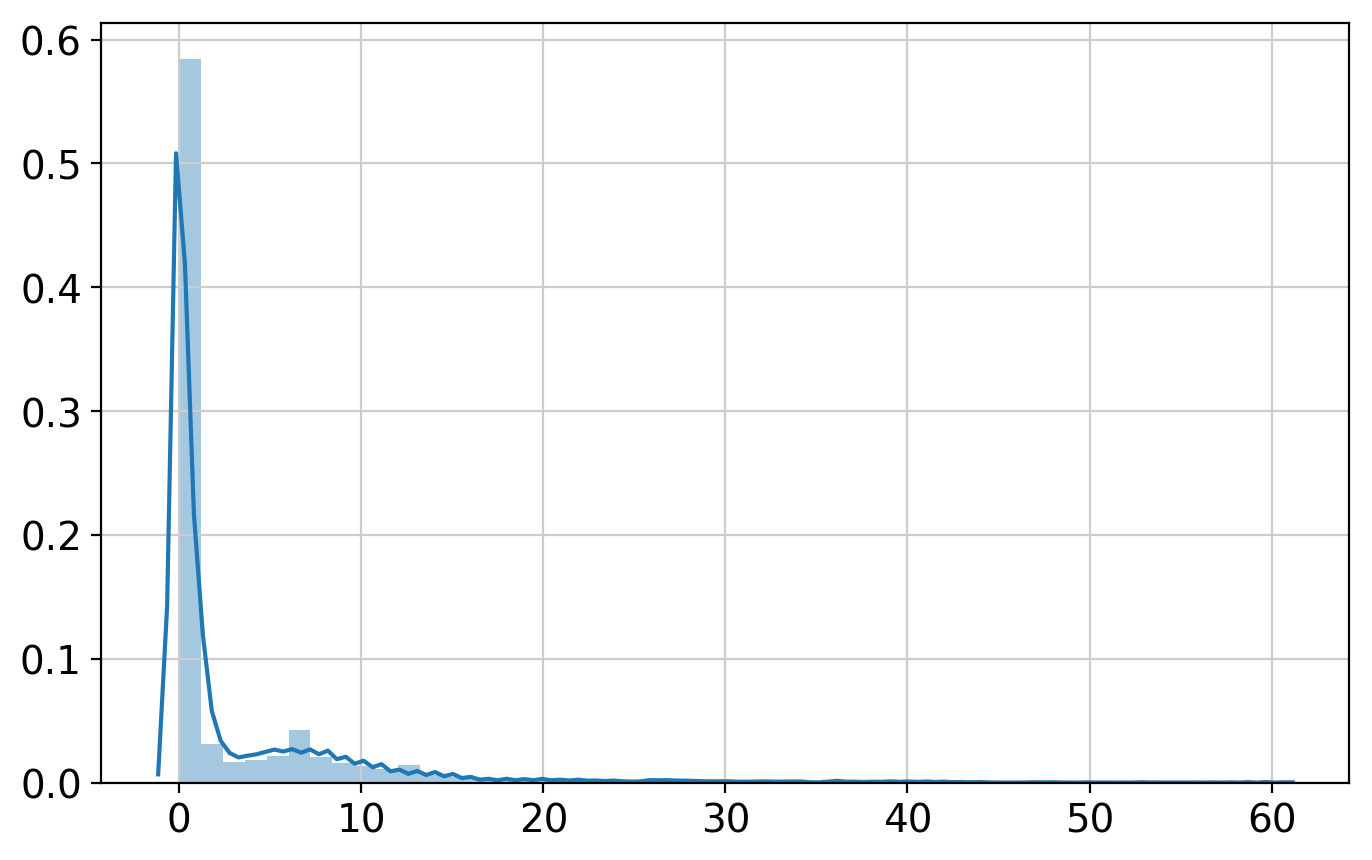

Nr:31.0
n_degree:7
[  2.83844146   4.09319052   1.56262343  -8.87238425   8.63987802
 -10.43992356 -38.24444355]


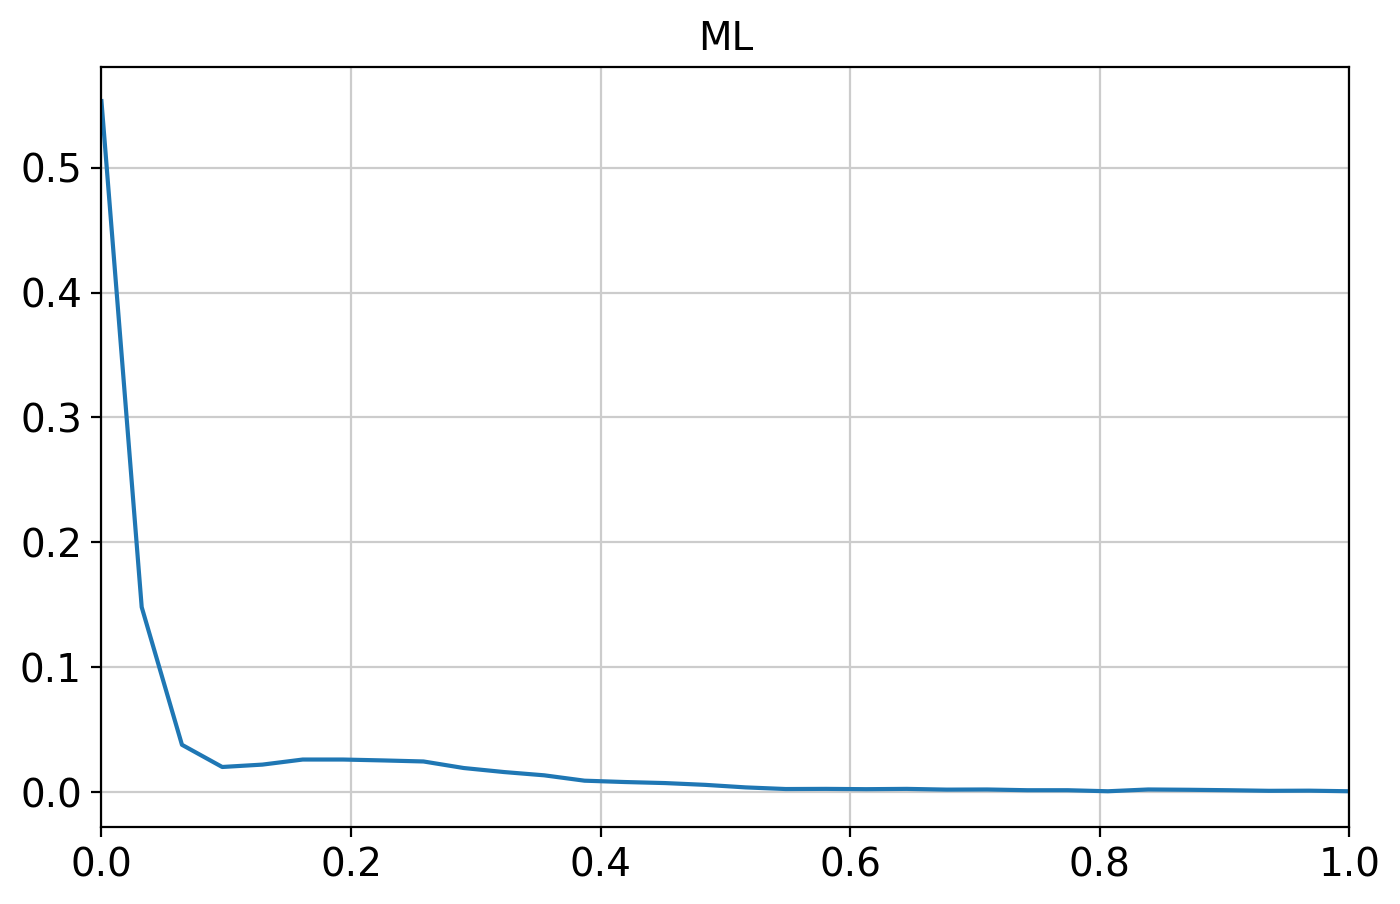

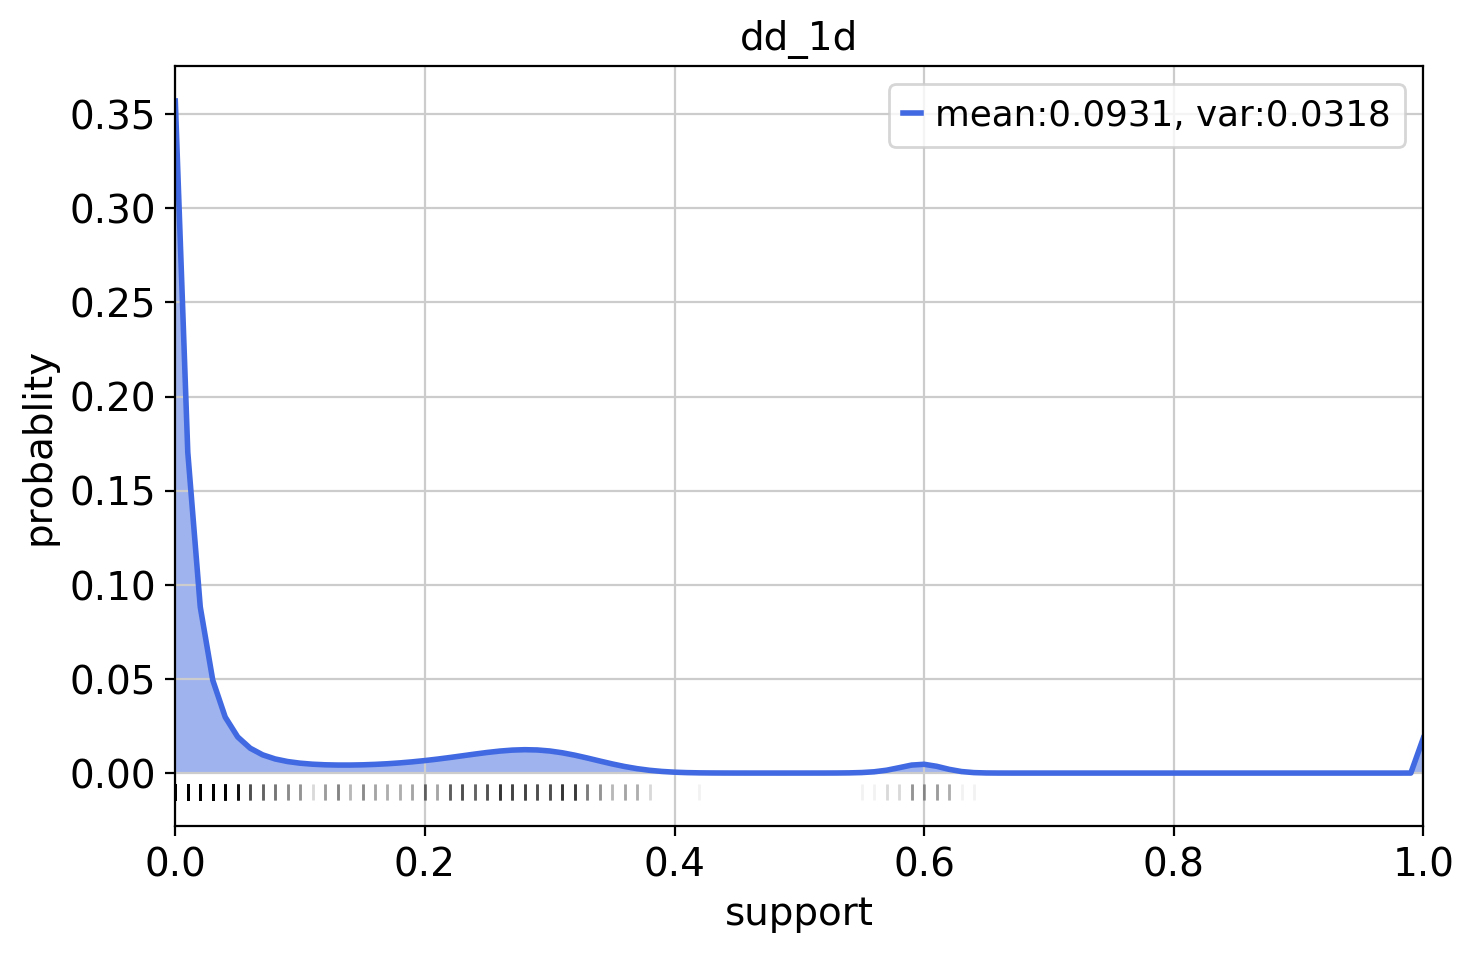

estimated Nr: 31.0
-------------------------------------------------------------------------
PF4
Average counts per cell = 0.09402219305572128


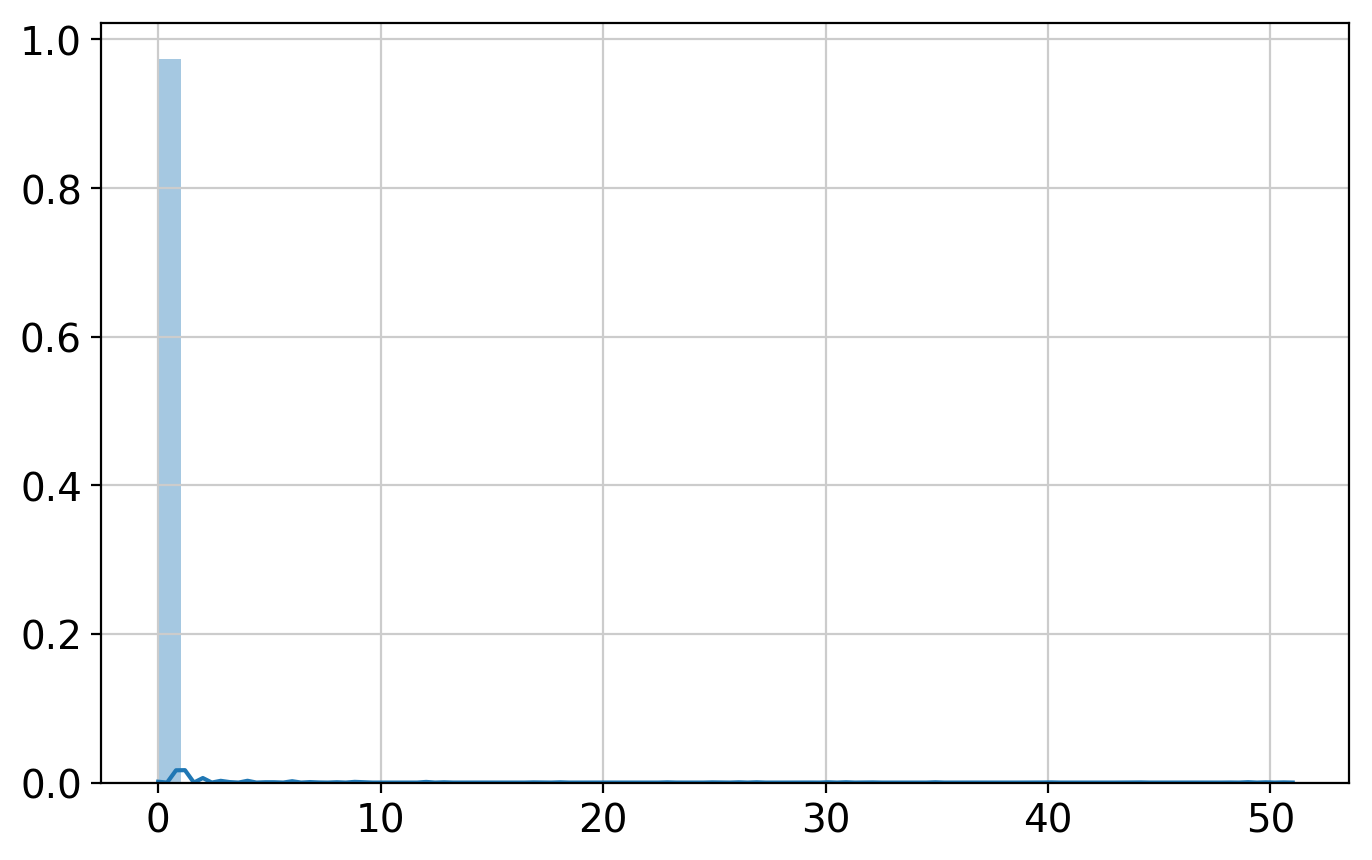

Nr:1.0
n_degree:7
[ 0.16152236 -0.1840817   0.12889337  0.07289128 -0.41196781  0.53151971
 -0.31888385]


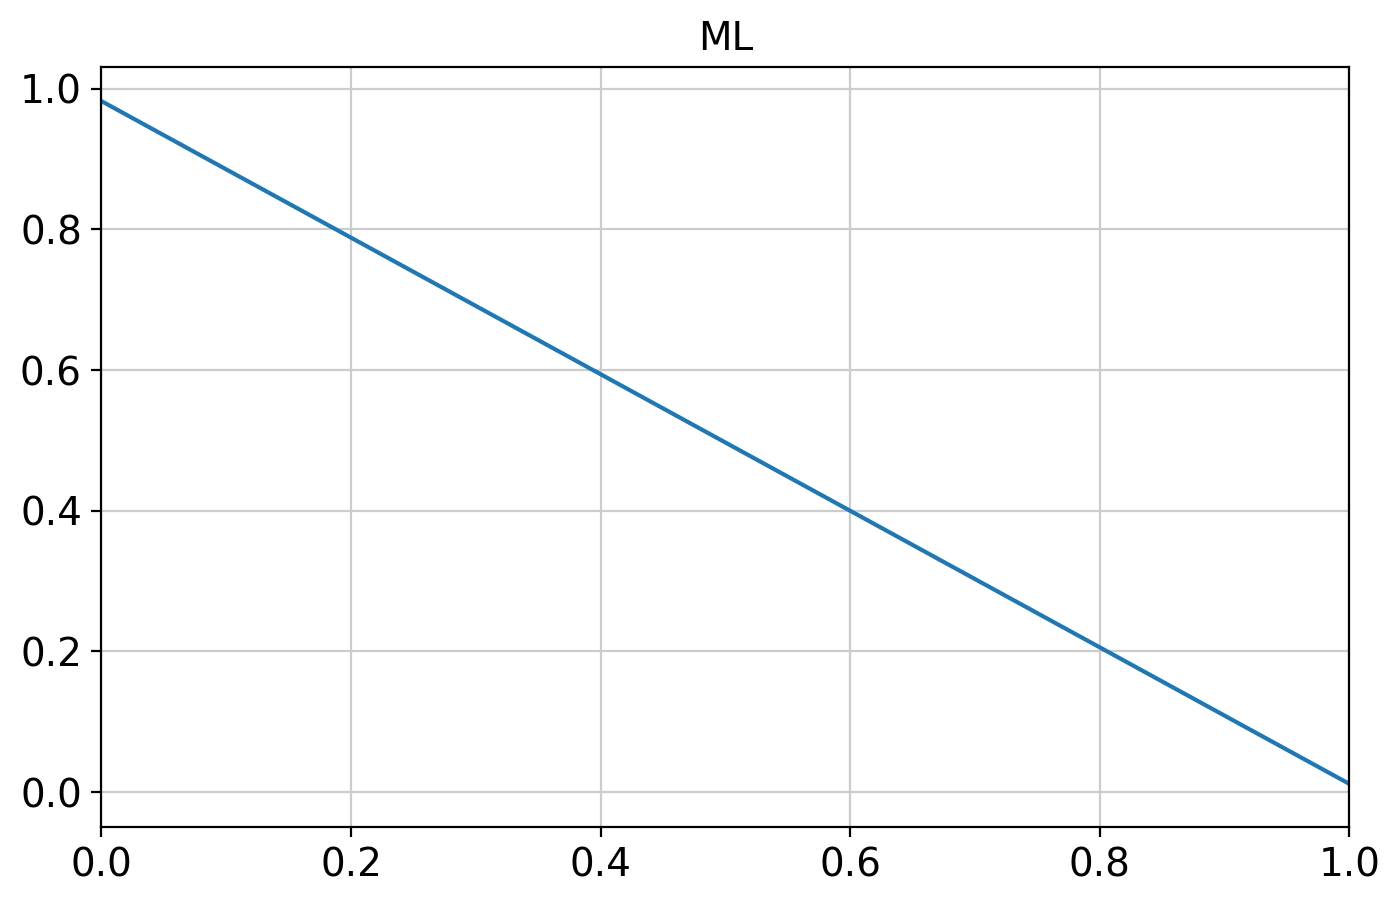

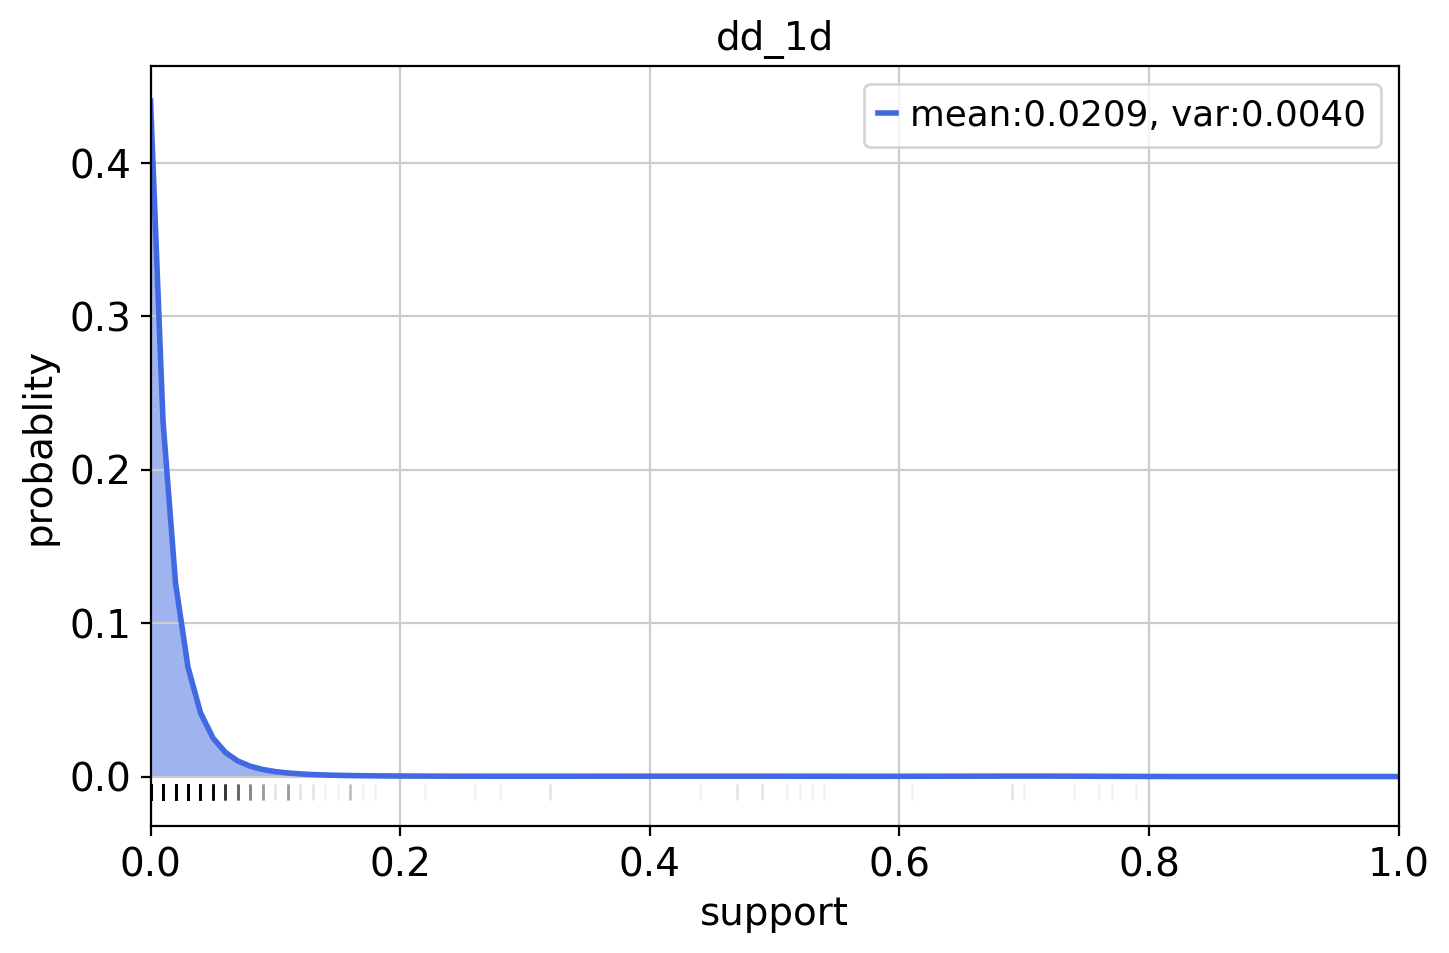

estimated Nr: 1.0
-------------------------------------------------------------------------
NKG7
Average counts per cell = 2.4571053573559243


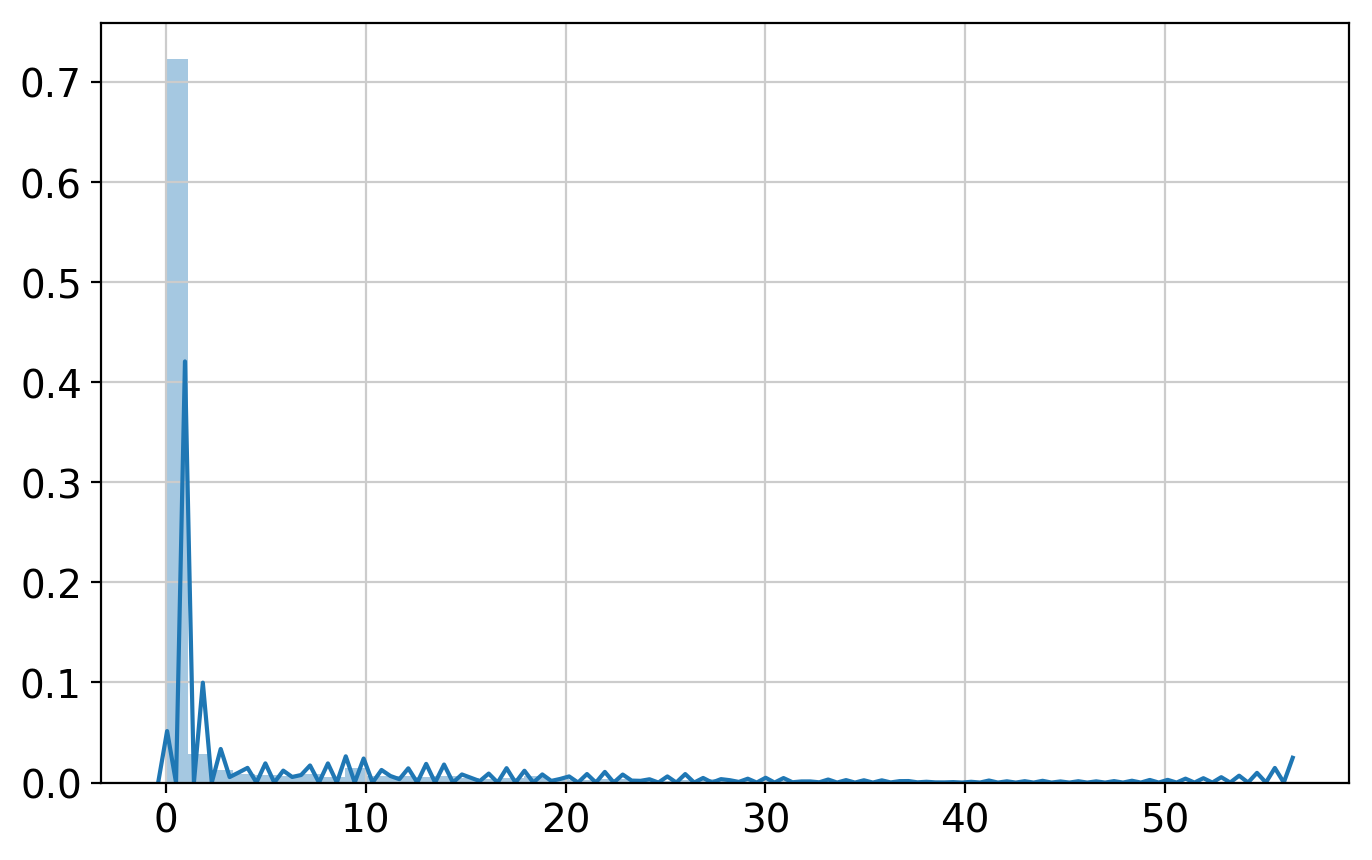

Nr:31.0
n_degree:7
[ 0.28878472  1.62033938  1.83011148 -1.80427958  2.54120062 -0.06586319
 -4.58797915]


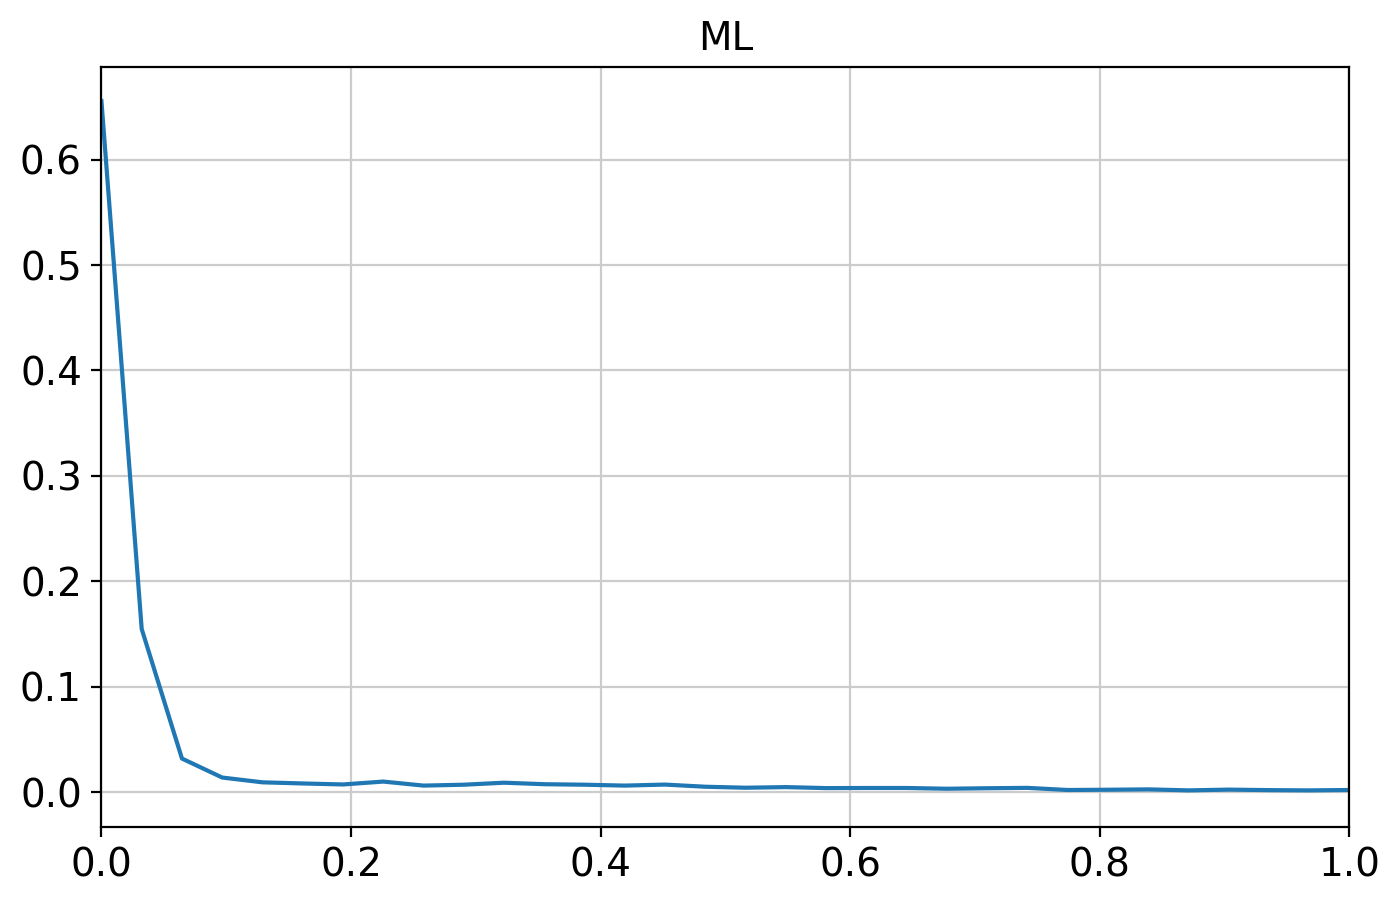

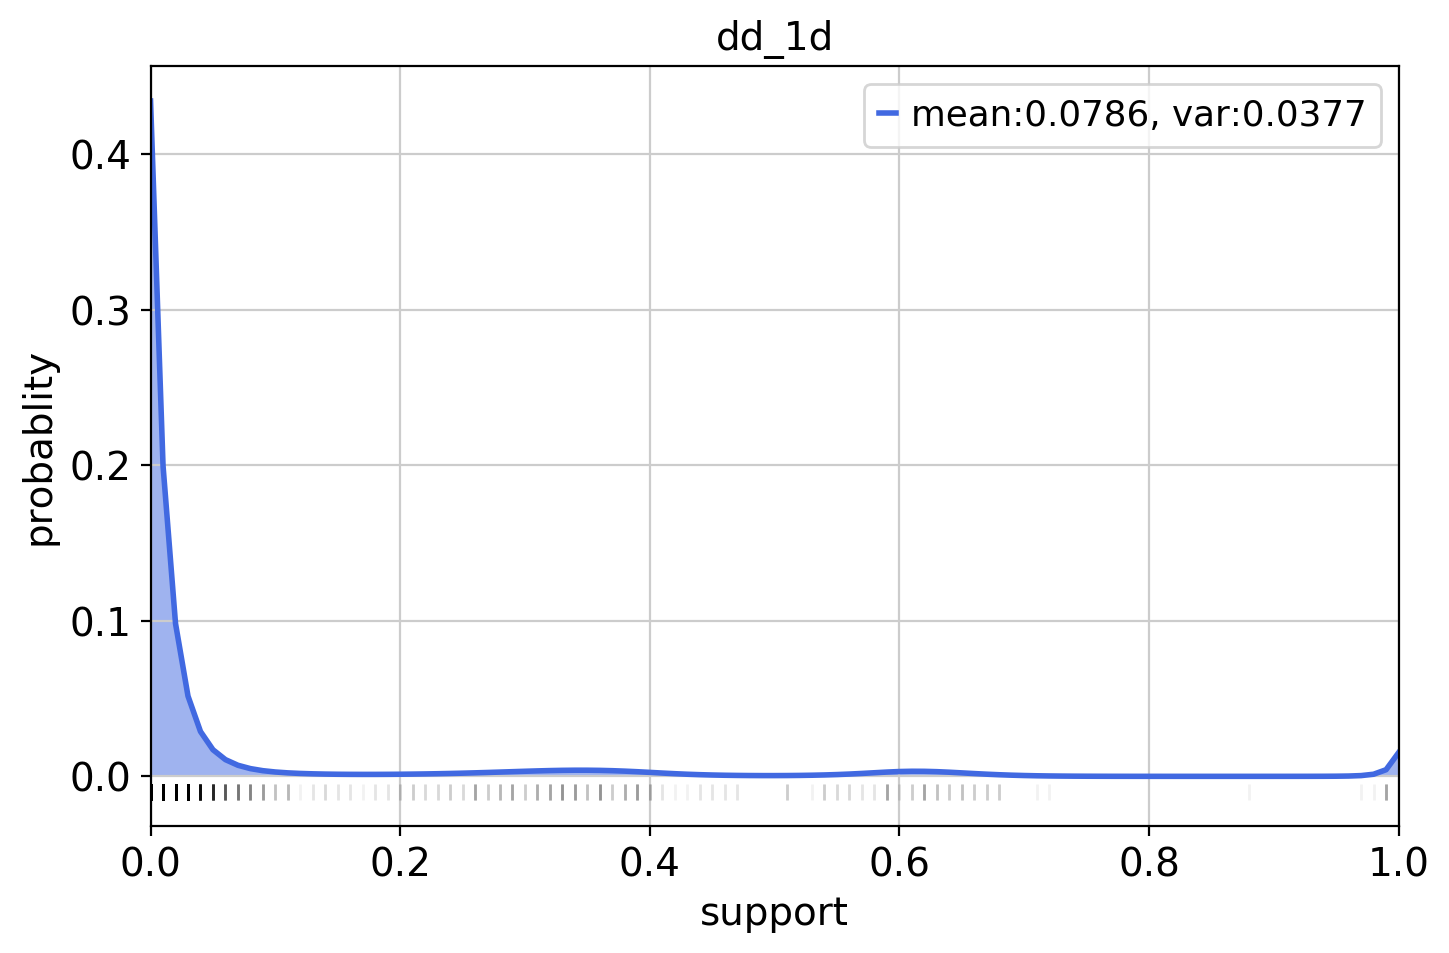

estimated Nr: 31.0
-------------------------------------------------------------------------
CST3
Average counts per cell = 7.001789762558167


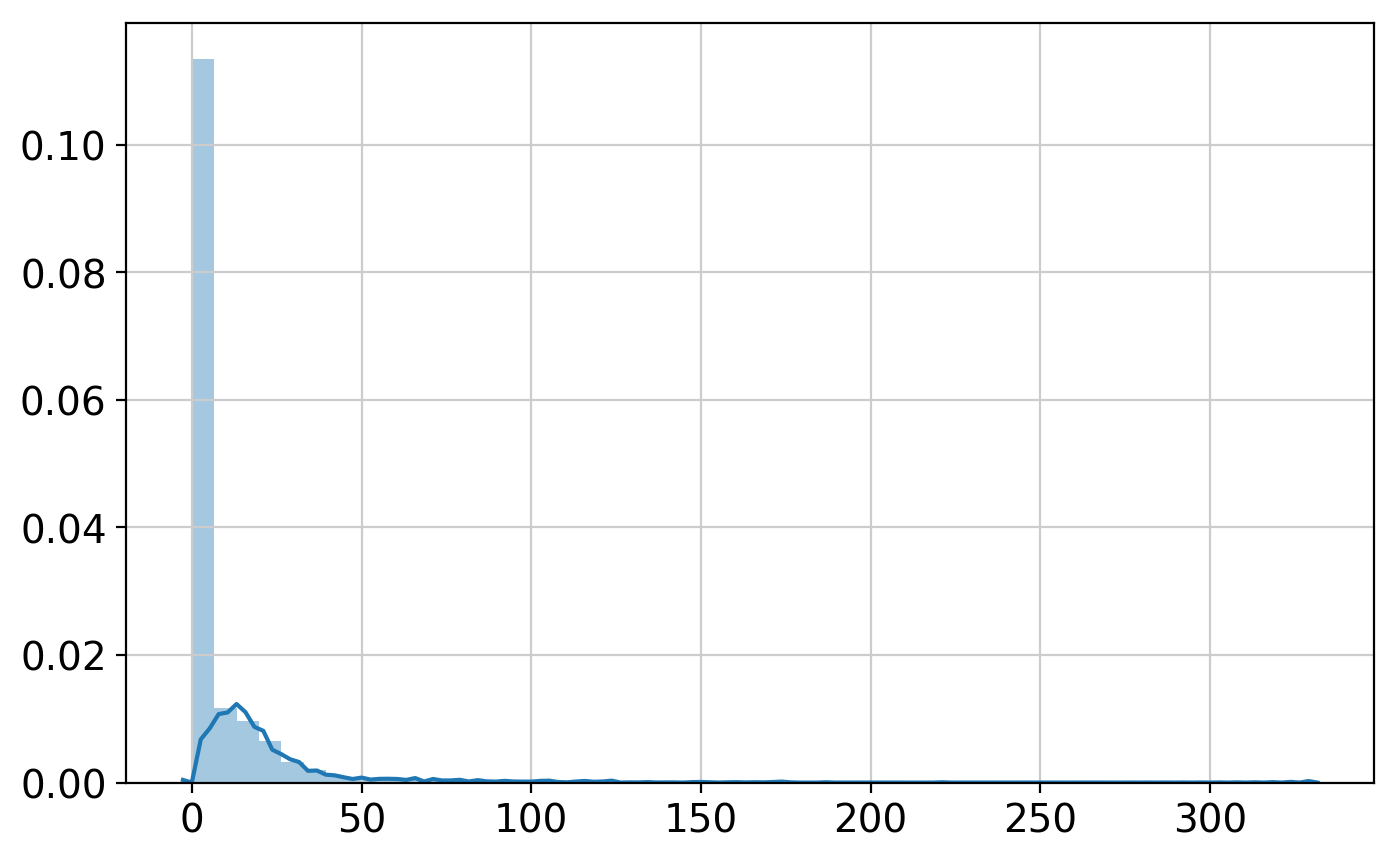

Nr:85.20000000000073
n_degree:7
[  2.39025345   3.29060434  -1.03241501 -15.51401388   1.13800928
   1.59937936  -4.81894705]


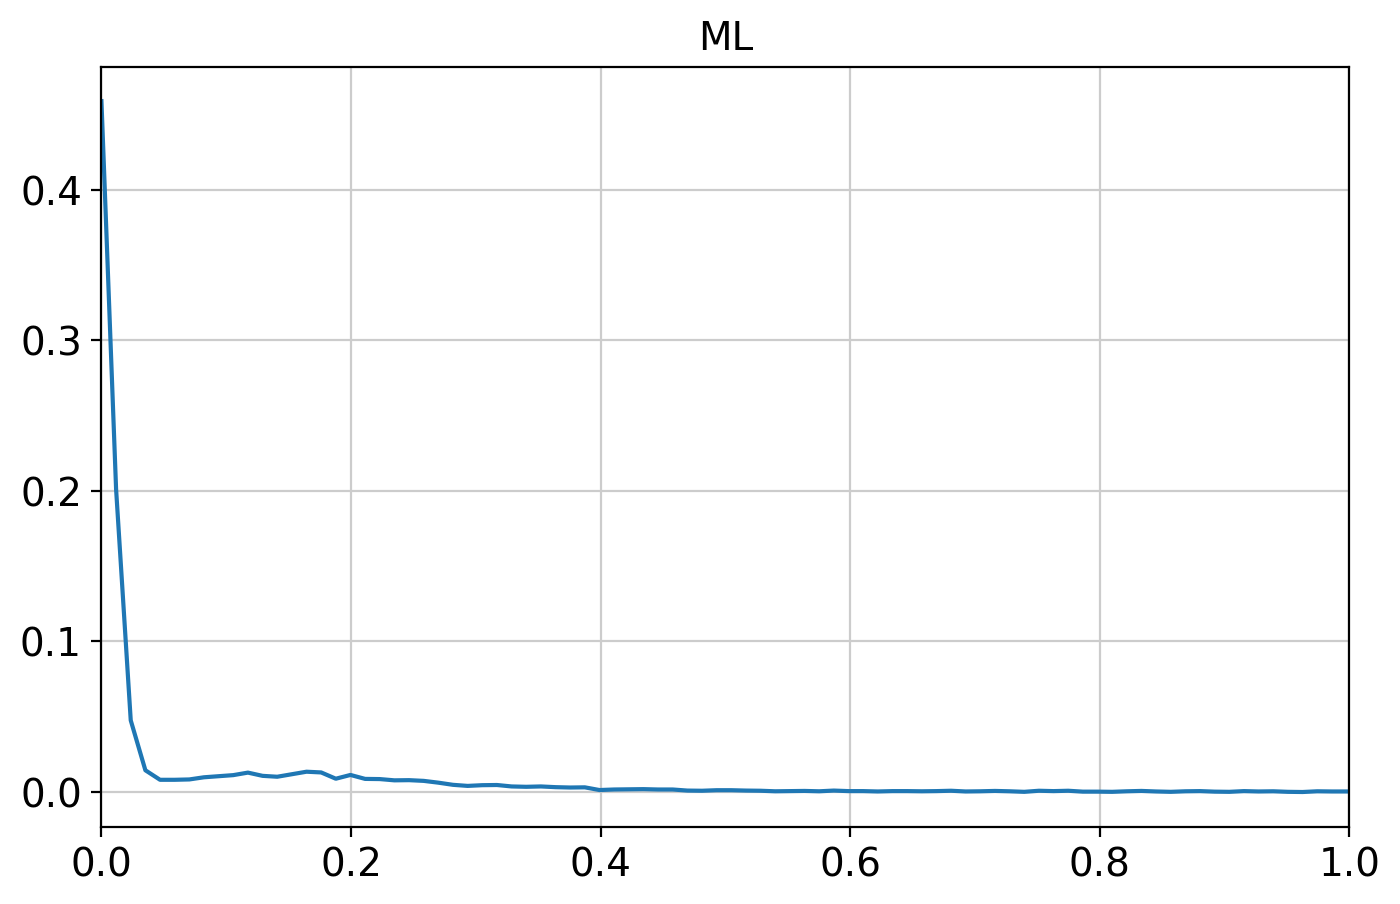

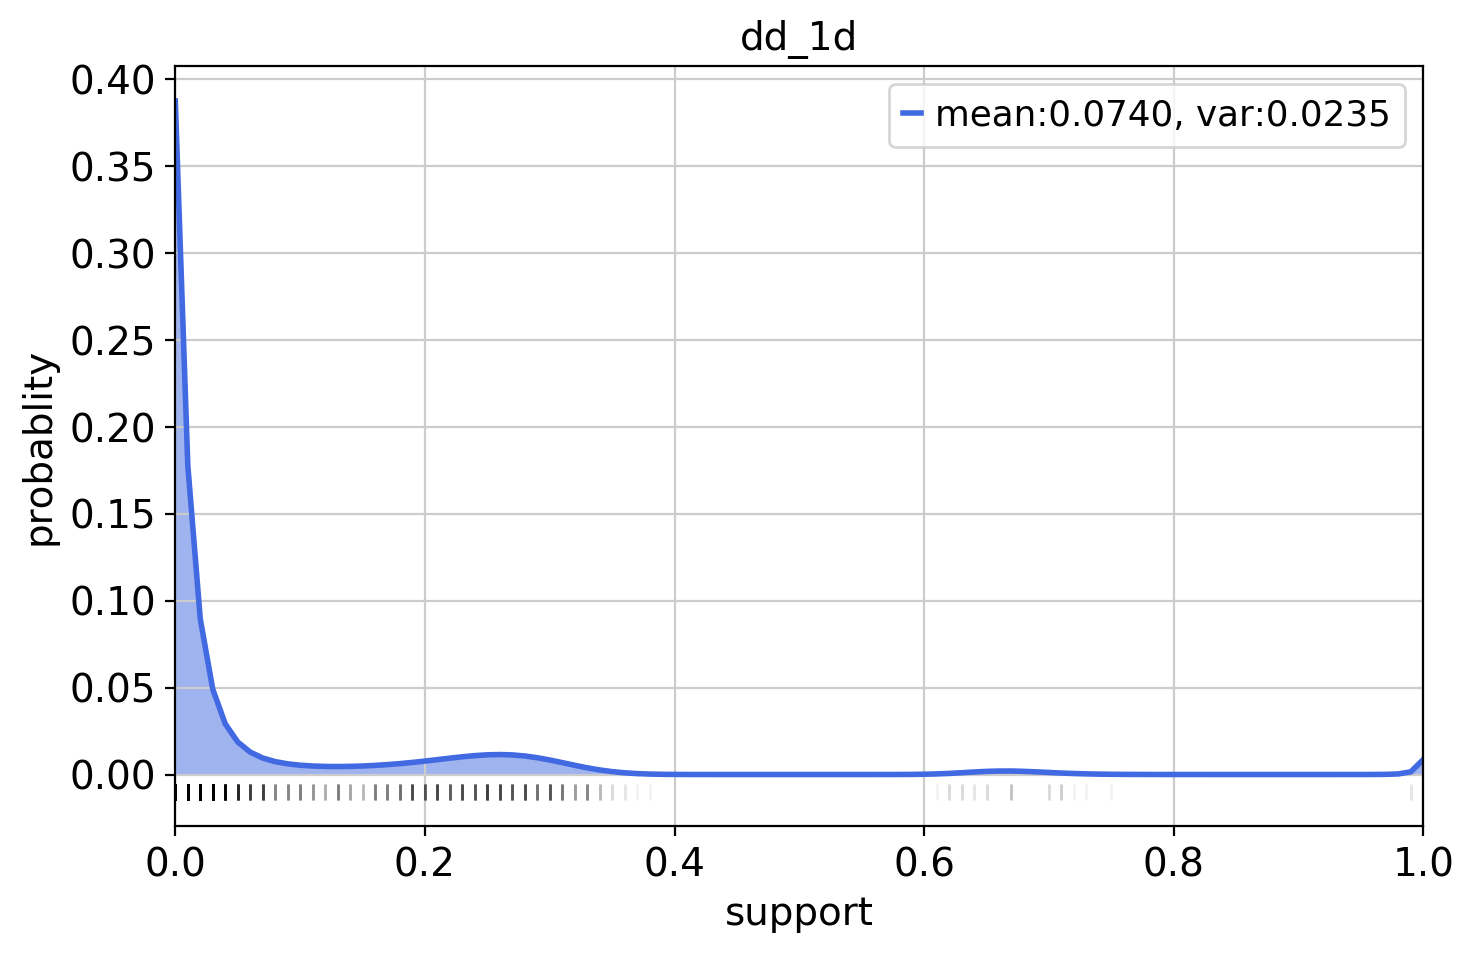

estimated Nr: 85.20000000000073
-------------------------------------------------------------------------
CCR7
Average counts per cell = 0.4827586206896552


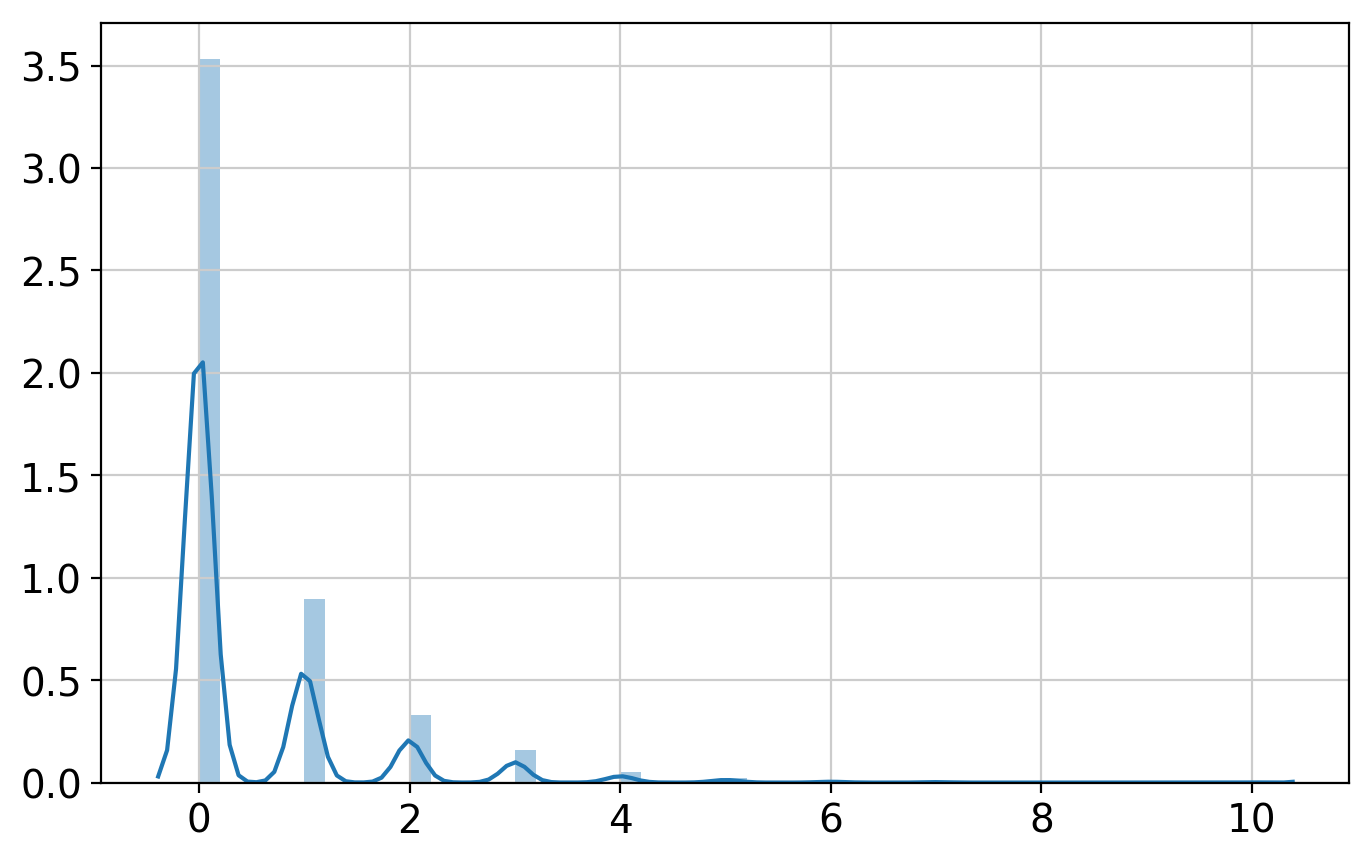

Nr:4.0
n_degree:7
[ 55.20491213  54.35521616  55.87877303  61.08825863 -53.22689424
 -94.56125095 -79.4165478 ]


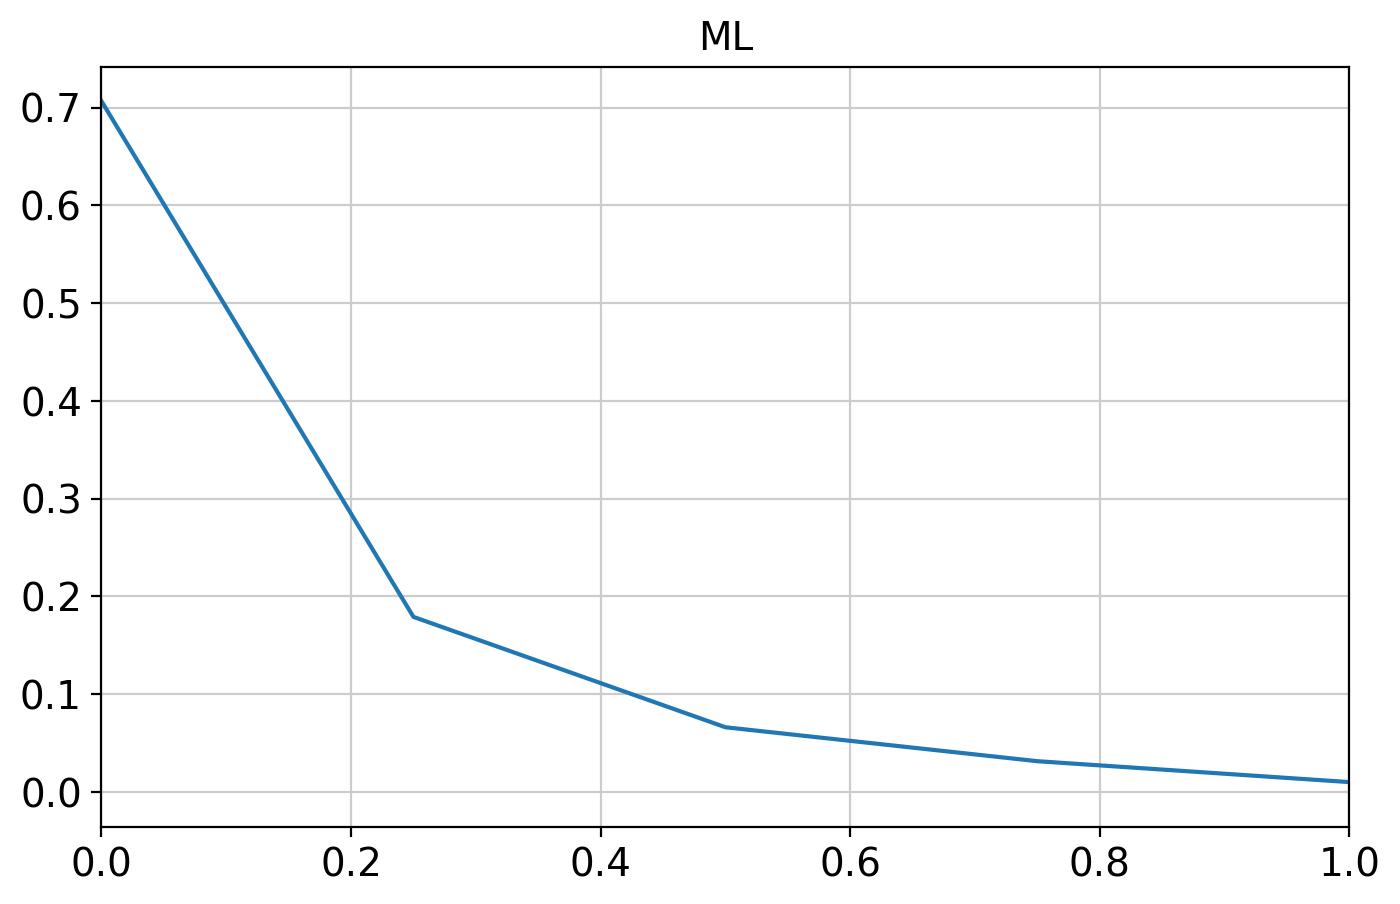

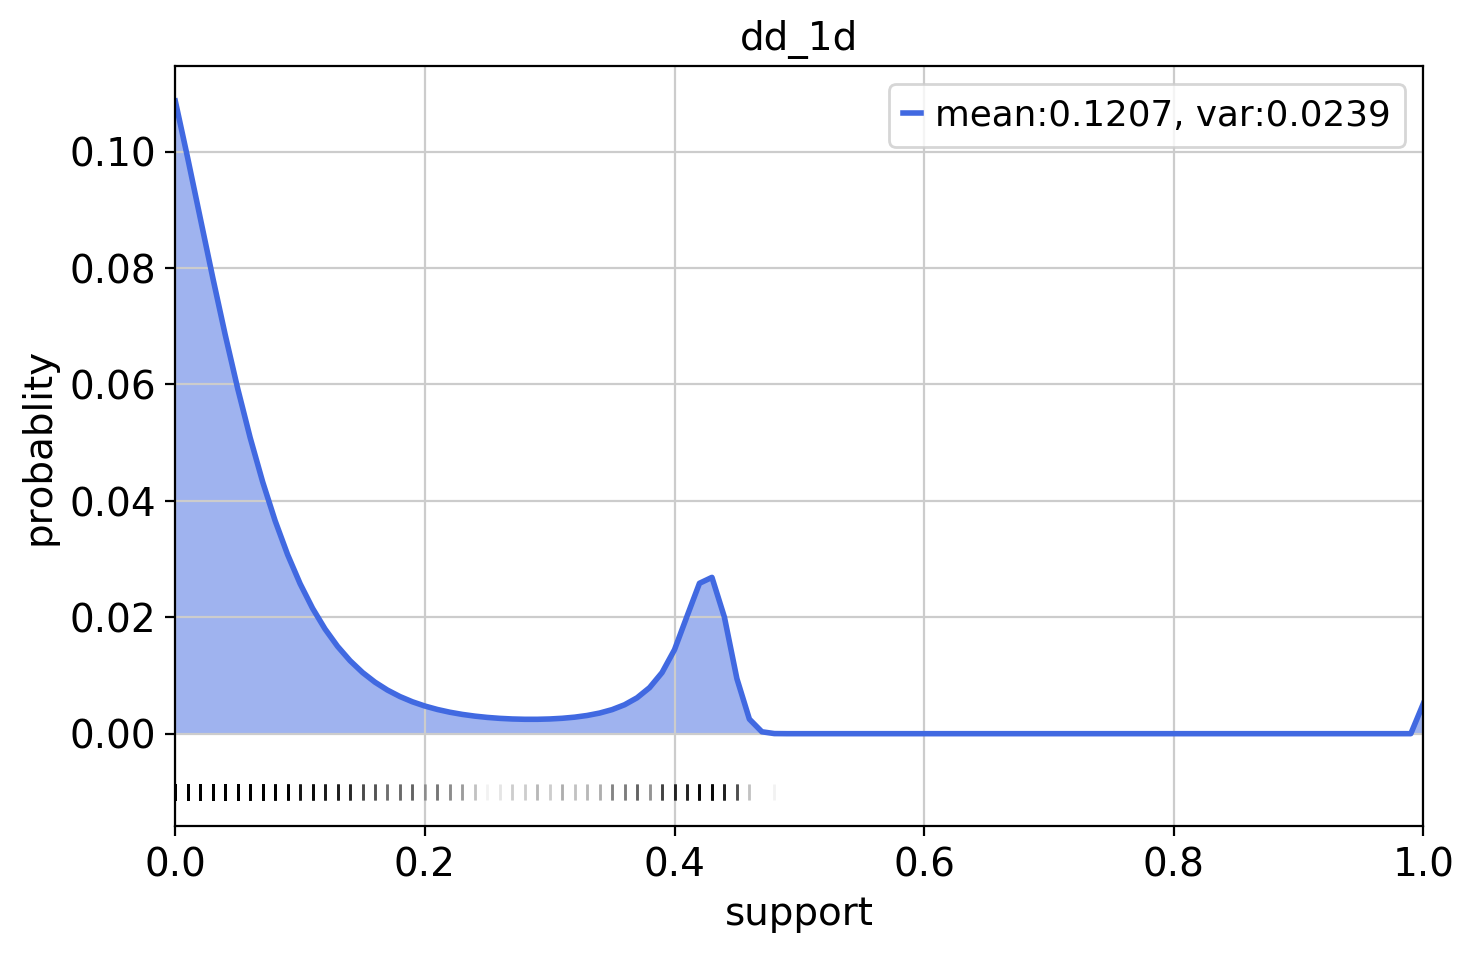

estimated Nr: 4.0
-------------------------------------------------------------------------


In [23]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')

    p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
    print("estimated gamma:",dd_info['gamma'])
    print("-------------------------------------------------------------------------")

In [217]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

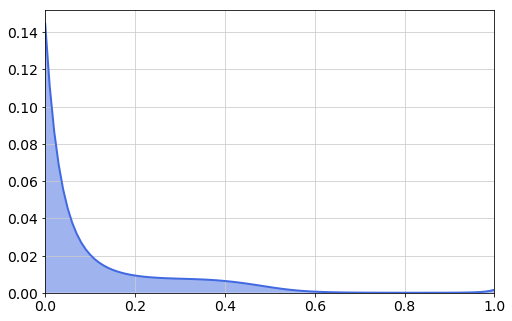

In [218]:
plot_density_1d(p_hat,dd_info['x'])